In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# View all columns on the screen
pd.set_option('max_columns', 100)

## Background
---
### The Anstey (2005) model is a simplistic representation of a theoretical construct known as the ‘capacity to drive safely’ among mature age drivers. They argued that the theoretical construct went on to predict actual driver behavior. Here we are looking at data on actual driver behavior.

# Data Set Walkthrough

###  Driver Cognitive Skills, Empathy and Personality Type
---

In [3]:
query_string = 'SELECT * FROM cognitive LIMIT 5'
# Connect to the existing fleetriskdb
con = sqlite3.connect('../DB/fleetriskdb.sqlite')
# Confirm data is being returned from this query
cognitive_df = pd.read_sql_query(query_string, con)
# Verify that result of SQL query is stored in the dataframe
cognitive_df.tail()

index         Unique Code Vehicle Rego  Cognisess ID  \
0      0  dan354235056684594       911WDX         57734   
1      1  dan354235056681665       DBL66Y         35747   
2      2  dan354235056685757       1GX1TA         60468   
3      3  dan354235056685708       DBD90H         57654   
4      4  dan354235056672268       DBD90J         57888   

  From Merc Upload Splend ID From Merc Upload Danlaw ID  \
0                  splend101         dan354235056684594   
1                  splend102         dan354235056681665   
2                  splend103         dan354235056685757   
3                  splend104         dan354235056685708   
4                  splend105         dan354235056672268   

  Claims Exist (Claims Data tab)  Divided Attention  Focus and Concentration  \
0                           None                  1                       53   
1                           None                 37                       45   
2                           None                  4                       78   
3                           None                 65                       74   
4                           None                 55                       18   

   Inhibition  Processing Speed  Response Accuracy  Short-term Memory  \
0          50                 9                 14                 70   
1          88                95                 90                 74   
2          44                69                 30                 80   
3          92                94                 42                 78   
4           3                62                 14                 44   

   Spatial Memory  Spatial Orientation  Visual Perception  Visual Search  \
0              55                   85                  2             67   
1              74                   67                 67             31   
2              33                   92                 11             33   
3              62                   67                 87             40   
4               1                    1                  1             33   

   Working Memory  Overall Emotion  Positive Emotions  Negative Emotions  \
0              59               32                 27                 25   
1              78               70                 81                 50   
2              99               61                 54                 62   
3              22               56                 72                 25   
4              16               38                 36                 50   

   Neutral Emotions  Facial Recognition  Vocal Recognition  Agreeableness  \
0               100                  40               20.0              5   
1               100                  70               70.0              5   
2               100                  90               30.0              5   
3               100                  50               60.0              6   
4                 0                  60               20.0              4   

   Conscientiousness  Emotional Stability  Extraversion  Openness  Resilience  \
0                  4                    5             6         4           2   
1                  5                    7             6         5           5   
2                  6                    7             8         9           8   
3                  5                    3             5         5           4   
4                  7                    5             4         4           3   

   Average of bd_score  Sum of total_risk_events  Sum of speed_events_total  \
0            51.489360                    3573.0                     1047.0   
1            60.274947                   12340.0                     5936.0   
2            61.748225                    5292.0                     2220.0   
3            63.901612                    5899.0                     3066.0   
4            51.711655                    5331.0                     1125.0   

   Sum of speed_events_excessive  

### Trip Level Data
---

In [4]:
query_string = 'SELECT * FROM routes LIMIT 5'
# Connect to the existing fleetriskdb
con = sqlite3.connect('../DB/fleetriskdb.sqlite')
# Confirm data is being returned from this query
trips_df = pd.read_sql_query(query_string, con)
# Verify that result of SQL query is stored in the dataframe
trips_df.tail()

index                               tid                 did        uid  \
0      0  1451606472000-dan354235059712293  dan354235059712293  splend302   
1      1  1451606491000-dan354235059831267  dan354235059831267  splend200   
2      2  1451606574000-dan354235059721492  dan354235059721492  splend295   
3      3  1451606635000-dan354235056672029  dan354235056672029  splend114   
4      4  1451606931000-dan354235059830970  dan354235059830970  splend217   

                tstart     kms   secs  score start_suburb    country  \
0  2016-01-01 00:01:12  31.730   6048     18  Surry Hills  Australia   
1  2016-01-01 00:01:31  95.294  15388      0      Croydon  Australia   
2  2016-01-01 00:02:54   1.483    227     14     Brighton  Australia   
3  2016-01-01 00:03:55   4.398    637     84    Roselands  Australia   
4  2016-01-01 00:08:51  31.047   2603     38      Jannali  Australia   

             state     end_suburb Unnamed: 11                  route  \
0  New South Wales       Randwick        None   Surry Hills-Randwick   
1  New South Wales       Rose Bay        None       Croydon-Rose Bay   
2       Queensland       Brighton        None      Brighton-Brighton   
3  New South Wales      Greenacre        None    Roselands-Greenacre   
4  New South Wales  Darkes Forest        None  Jannali-Darkes Forest   

       routeid  
0  998871177.0  
1  100017256.0  
2  278752947.0  
3  123568141.0  
4  721892392.0

### Event Level Data
---

In [5]:
query_string = 'SELECT * FROM events LIMIT 10'
# Connect to the existing fleetriskdb
con = sqlite3.connect('../DB/fleetriskdb.sqlite')
# Confirm data is being returned from this query
events_df = pd.read_sql_query(query_string, con)
# Verify that result of SQL query is stored in the dataframe
events_df.head(10)

index                               tid       what                   ts  \
0      0  1452672605000-dan354235059843379        End  2016-01-13 08:17:35   
1      1  1452672605000-dan354235059843379      Start  2016-01-13 08:10:05   
2      2  1452672701000-dan354235059839799      Start  2016-01-13 08:11:41   
3      3  1452672701000-dan354235059839799        End  2016-01-13 08:33:53   
4      4  1452672701000-dan354235059839799  Cornering  2016-01-13 08:14:10   
5      5  1452672701000-dan354235059839799   Speeding  2016-01-13 08:14:33   
6      6  1452672701000-dan354235059839799   Speeding  2016-01-13 08:15:17   
7      7  1452672701000-dan354235059839799  Cornering  2016-01-13 08:18:22   
8      8  1452672701000-dan354235059839799  Cornering  2016-01-13 08:18:43   
9      9  1452672701000-dan354235059839799   Speeding  2016-01-13 08:18:49   

                                                locn  score  speed  
0  0101000020E610000018B325AB221F6240F549EEB089E2...    NaN    NaN  
1  0101000020E6100000DB865110BC1E6240DE3829CC7BE2...    NaN    NaN  
2  0101000020E610000077BE9F1AAF186240DDEEE53E39E4...    NaN    NaN  
3  0101000020E6100000506F46CD571C62408E23D6E253E6...    NaN    NaN  
4  0101000020E61000000264E8D8C11862401ABFF04A92E3...   23.0   30.0  
5  0101000020E6100000AE4676A5E51862406C088ECBB8E3...   66.0   90.0  
6  0101000020E6100000DE59BBED4219624039622D3E05E4...   23.0   79.0  
7  0101000020E6100000DC645419461962409E280989B4E5...   38.0   37.0  
8  0101000020E6100000618E1EBF37196240683F524486E5...   12.0   49.0  
9  0101000020E61000007FF5B86F35196240AEF199EC9FE5...   32.0   75.0

# Is there a relationship between cognitive skills, empathic accuracy or personality types and driver behavior?
---

## Take 1: Can we use these traits to predict better driver score?

In [6]:
# Read in the file
filename = '../Data4/Update to Cognitive_ Claims and driving summary v1.xlsx'
cognitive_data = pd.read_excel(filename, sheetname='Summary of Risk and Cog', header=2)
# Drop columns at the end that are all NaNs
cognitive_data.dropna(axis=1, how='all', inplace=True)
# Drop column 6 which has stale scores
cognitive_data.drop(cognitive_data.columns[6], axis=1, inplace=True)
# cognitive_data.drop(['Average of bd_score.1'], axis=1, inplace=True)
# Filter down to all users actually driving. Missing 1 userid among all drivers
Driving = cognitive_data[cognitive_data['Vehicle Rego'].str.lower() != 'no driving'].copy()
Driving.tail()

Unique Code Vehicle Rego  Cognisess ID From Merc Upload Splend ID  \
390  dan354235058154190       CH33TJ         61052                  splend831   
391  dan354235057722583       CH35TJ         61075                  splend832   
392  dan354235058198544       381WID         60299                  splend833   
393  dan354235058165121       CH80SE         60444                  splend837   
394                 NaN       DFD59Q         60113                        NaN   

    From Merc Upload Danlaw ID Claims Exist (Claims Data tab)  \
390         dan354235058154190                            NaN   
391         dan354235057722583                            NaN   
392         dan354235058198544                            NaN   
393         dan354235058165121                            NaN   
394                        NaN                            NaN   

     Divided Attention  Focus and Concentration  Inhibition  Processing Speed  \
390                 43                       45          13                14   
391                  5                       99          12                 5   
392                 81                       31          58                70   
393                 31                       18           6                10   
394                  1                       25          11                34   

     Response Accuracy  Short-term Memory  Spatial Memory  \
390                 32                 32              54   
391                 25                 37              53   
392                 35                 62              92   
393                 52                 91              77   
394                  6                  6              23   

     Spatial Orientation  Visual Perception  Visual Search  Working Memory  \
390                   34                 23             36              39   
391                   22                  9             32              30   
392                   80                 31             32              26   
393                   25                 23             16               9   
394                    1                  1             25              16   

     Overall Emotion  Positive Emotions  Negative Emotions  Neutral Emotions  \
390               22                  9                 25               100   
391               46                 45                 37               100   
392               18                 14                 41               100   
393                9                 26                  2               100   
394               42                 18                 62               100   

     Facial Recognition  Vocal Recognition  Agreeableness  Conscientiousness  \
390                  40                0.0              4                  1   
391                  60               30.0              3                  5   
392                  51               15.0              5                  5   
393                  14               15.0              5                  6   
394                  40               60.0              8                  8   

     Emotional Stability  Extraversion  Openness  Resilience  \
390                    3             2         2           2   
391                    4             5         5           4   
392                    6             4         4           5   
393                    7             3         5           7   
394                    7             9         8           5   

     Average of bd_score  Sum of total_risk_events  Sum of speed_events_total  \
390            70.540686                     856.0                      218.0   
391            67.477314                    2601.0                      892.0   
392            68.224414                    2623.0                      863.0   
393            82.482214                     658.0                      257.0   
394                  NaN                       NaN         

In [7]:
Driving.describe()

Cognisess ID  Divided Attention  Focus and Concentration  Inhibition  \
count    395.000000         395.000000               395.000000  395.000000   
mean   58640.589873          24.574684                42.146835   39.792405   
std     4525.428836          23.820210                26.795592   26.330532   
min    35747.000000           0.000000                 4.000000    1.000000   
25%    58521.000000           5.000000                18.000000   16.000000   
50%    59309.000000          15.000000                38.000000   38.000000   
75%    60524.500000          40.000000                61.000000   61.000000   
max    61554.000000          99.000000                99.000000   99.000000   

       Processing Speed  Response Accuracy  Short-term Memory  Spatial Memory  \
count        395.000000         395.000000         395.000000      395.000000   
mean          46.936709          38.675949          47.939241       45.189873   
std           29.787548          25.017990          27.703311       27.408489   
min            1.000000           0.000000           0.000000        1.000000   
25%           18.000000          18.000000          25.000000       22.000000   
50%           46.000000          35.000000          46.000000       43.000000   
75%           72.500000          58.000000          73.000000       67.500000   
max           99.000000          99.000000          99.000000       99.000000   

       Spatial Orientation  Visual Perception  Visual Search  Working Memory  \
count           395.000000         395.000000     395.000000      395.000000   
mean             44.711392          30.063291      39.650633       42.567089   
std              27.379691          27.270008      27.149043       27.899337   
min               1.000000           1.000000       5.000000        5.000000   
25%              21.000000           7.000000      15.000000       21.000000   
50%              41.000000          24.000000      32.000000       33.000000   
75%              67.000000          44.500000      62.000000       61.000000   
max              99.000000          99.000000      98.000000       99.000000   

       Overall Emotion  Positive Emotions  Negative Emotions  \
count       395.000000         395.000000         395.000000   
mean         47.091139          44.182278          45.650633   
std          18.234006          21.550724          19.707750   
min           0.000000           0.000000           0.000000   
25%          37.000000          27.000000          37.000000   
50%          47.000000          45.000000          50.000000   
75%          61.000000          63.000000          62.000000   
max          90.000000          94.000000         100.000000   

       Neutral Emotions  Facial Recognition  Vocal Recognition  Agreeableness  \
count        395.000000          395.000000         395.000000     395.000000   
mean          83.356962           56.562025          37.377215       4.875949   
std           36.387392           19.574226          21.346358       1.922959   
min            0.000000            0.000000           0.000000       1.000000   
25%          100.000000           50.000000          20.000000       4.000000   
50%          100.000000           60.000000          40.000000       5.000000   
75%          100.000000           70.000000          50.000000       6.000000   
max          100.000000          100.000000          90.000000      10.000000   

       Conscientiousness  Emotional Stability  Extraversion    Openness  \
count         395.000000           395.000000    395.000000  395.000000   
mean            5.260759             5.194937      4.951899    4.567089   
std             1.686120             1.897092      1.795430    1.728363   
min             1.000000             1.000000      1.000000    1.000000   
25%             4.000000             4.000000      4.000000    3.000000   
50%             5.000000             5.000000      5.000000    5.000000   
75%         

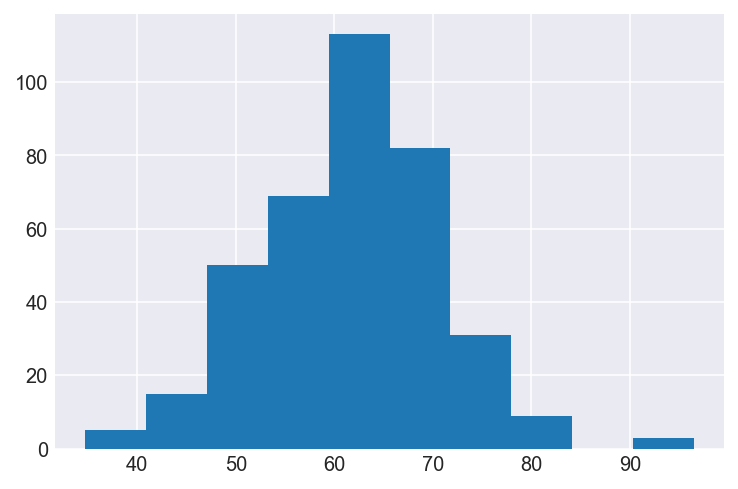

In [8]:
# Check out the distribution of the better driver score
Driving['Average of bd_score'].hist()
plt.show()

/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=0.0375425914471)
Fitted anglit distribution with error=0.0221681626342)
Fitted arcsine distribution with error=0.0311383313276)
Fitted argus distribution with error=0.0207701002442)
Fitted beta distribution with error=0.00986656111988)
Fitted betaprime distribution with error=0.0120588362867)
Fitted bradford distribution with error=0.02605105642)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:562: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:566: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: 

Fitted burr distribution with error=0.0206863099129)
Fitted burr12 distribution with error=0.00727348084617)
Fitted cauchy distribution with error=0.00783203378019)
Fitted chi distribution with error=0.0125009280025)
Fitted chi2 distribution with error=0.15774446157)
Fitted cosine distribution with error=0.0197937114031)
Fitted dgamma distribution with error=0.00717846275272)
Fitted dweibull distribution with error=0.00774665360757)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025000000000000001.
  RuntimeWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00027777777777777778.
  RuntimeWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00046296296296296298.
  RuntimeW

Fitted erlang distribution with error=0.0406775531281)
Fitted expon distribution with error=0.0315950563575)
Fitted exponnorm distribution with error=0.0119781310168)
Fitted exponpow distribution with error=0.0463771193404)
Fitted exponweib distribution with error=0.018888191819)
Fitted f distribution with error=0.0690167143076)
Fitted fatiguelife distribution with error=0.0334257037654)
Fitted fisk distribution with error=0.0641651193055)
Fitted foldcauchy distribution with error=0.156455013185)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Fitted foldnorm distribution with error=0.119899308015)
Fitted frechet_l distribution with error=0.0730298288378)
Fitted frechet_r distribution with error=0.0596172978853)
Fitted gamma distribution with error=0.014824850138)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2595: RuntimeWarning: invalid value encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted gausshyper distribution with error=0.0145001225189)
Fitted genexpon distribution with error=0.0315821942081)
Fitted genextreme distribution with error=0.0649051598159)
Fitted gengamma distribution with error=0.0149583038008)
Fitted genhalflogistic distribution with error=0.0227345780534)
Fitted genlogistic distribution with error=0.00666861576795)
Fitted gennorm distribution with error=0.00792361303638)
Fitted genpareto distribution with error=0.121374359801)
Fitted gilbrat distribution with error=0.0303259040163)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:1761: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted gompertz distribution with error=0.0102066792421)
Fitted gumbel_l distribution with error=0.00855976961282)
Fitted gumbel_r distribution with error=0.0204669249448)
Fitted halfcauchy distribution with error=0.0306081775161)
Fitted halfgennorm distribution with error=0.0367787795463)
Fitted halflogistic distribution with error=0.0295720581565)
Fitted halfnorm distribution with error=0.0292451343957)
Fitted hypsecant distribution with error=0.00707271952112)
Fitted invgamma distribution with error=0.0134693063425)
Fitted invgauss distribution with error=0.0222634400939)
Fitted invweibull distribution with error=0.0204696788845)
Fitted johnsonsb distribution with error=0.00870703674336)
Fitted johnsonsu distribution with error=0.00650919648771)
Fitted kappa3 distribution with error=0.069708882338)
Fitted kappa4 distribution with error=0.0264545767217)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:43: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


Fitted ksone distribution with error=nan)
Fitted kstwobign distribution with error=1.14088554021e+45)
Fitted laplace distribution with error=0.00704394176428)
Fitted levy distribution with error=0.0325093995673)
Fitted levy_l distribution with error=0.0278871401325)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=0.00822640506341)
Fitted logistic distribution with error=0.00750299389272)
Fitted loglaplace distribution with error=0.0632701092359)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3165: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Fitted lognorm distribution with error=0.0446990024287)
Fitted lomax distribution with error=0.0324704077641)
Fitted maxwell distribution with error=0.00886237378928)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3361: RuntimeWarning: overflow encountered in power
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3361: RuntimeWarning: overflow encountered in multiply
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py

Fitted mielke distribution with error=0.019739613686)
Fitted nakagami distribution with error=0.0442512207989)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3692: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


Fitted ncf distribution with error=0.0322489624689)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3917: RuntimeWarning: overflow encountered in exp
  Px = np.exp(trm1)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3923: RuntimeWarning: invalid value encountered in multiply
  Px *= trm1+trm2
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3920: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3922: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))


Fitted nct distribution with error=0.0122082802542)
Fitted ncx2 distribution with error=0.0477953605554)
Fitted norm distribution with error=0.0119776870164)
Fitted pareto distribution with error=0.0309392701475)
Fitted pearson3 distribution with error=0.00932671281967)
Fitted powerlaw distribution with error=0.0241353693415)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4289: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4289: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4289: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


Fitted powerlognorm distribution with error=0.0350960031024)
Fitted powernorm distribution with error=0.00828114870938)
Fitted rayleigh distribution with error=0.0243795486863)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4355: RuntimeWarning: divide by zero encountered in power
  return np.power((1.0 - x**2), c / 2.0 - 1) / sc.beta(0.5, c / 2.0)


Fitted rdist distribution with error=0.0289298617914)
Fitted recipinvgauss distribution with error=0.0128405957128)
Fitted reciprocal distribution with error=0.0366359660787)
Fitted rice distribution with error=0.0951086159237)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=0.0237253682465)
Fitted skewnorm distribution with error=0.00916574392584)
Fitted t distribution with error=0.00674189457091)
Fitted trapz distribution with error=0.024570525561)
Fitted triang distribution with error=0.0168103902192)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4693: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4742: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4846: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4846: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Fitted truncexpon distribution with error=0.0278305428083)
Fitted truncnorm distribution with error=0.0366359660787)
Fitted tukeylambda distribution with error=0.0172709361107)
Fitted uniform distribution with error=0.0258974227621)
Fitted vonmises distribution with error=0.023119574051)
Fitted vonmises_line distribution with error=0.0287282654251)
Fitted wald distribution with error=0.0300819731912)
Fitted weibull_max distribution with error=0.0730298288378)
Fitted weibull_min distribution with error=0.0596172978853)
Fitted wrapcauchy distribution with error=nan)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/optimize/optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


sumsquare_error
johnsonsu           0.006509
genlogistic         0.006669
t                   0.006742
laplace             0.007044
hypsecant           0.007073

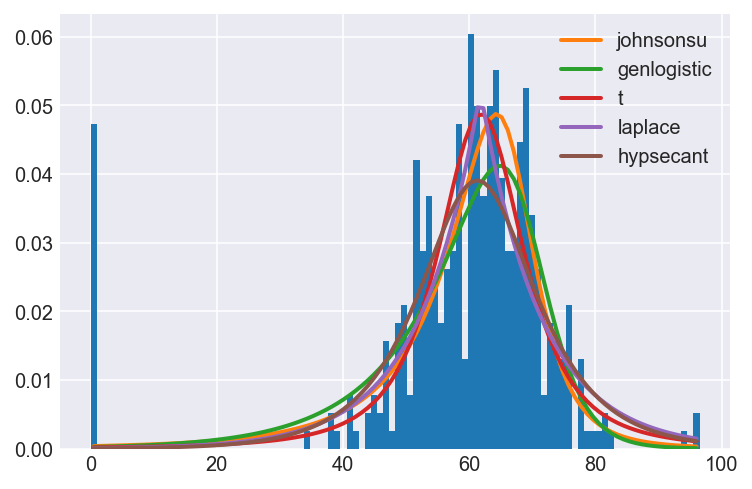

In [9]:
import fitter
f = fitter.Fitter(Driving['Average of bd_score'].fillna(0))
f.fit()
f.summary()

Looks like a t-distribution. This means that we *may* be able to express **better driver score** as a linear combination of other variables.

---

# Cognitive Skills

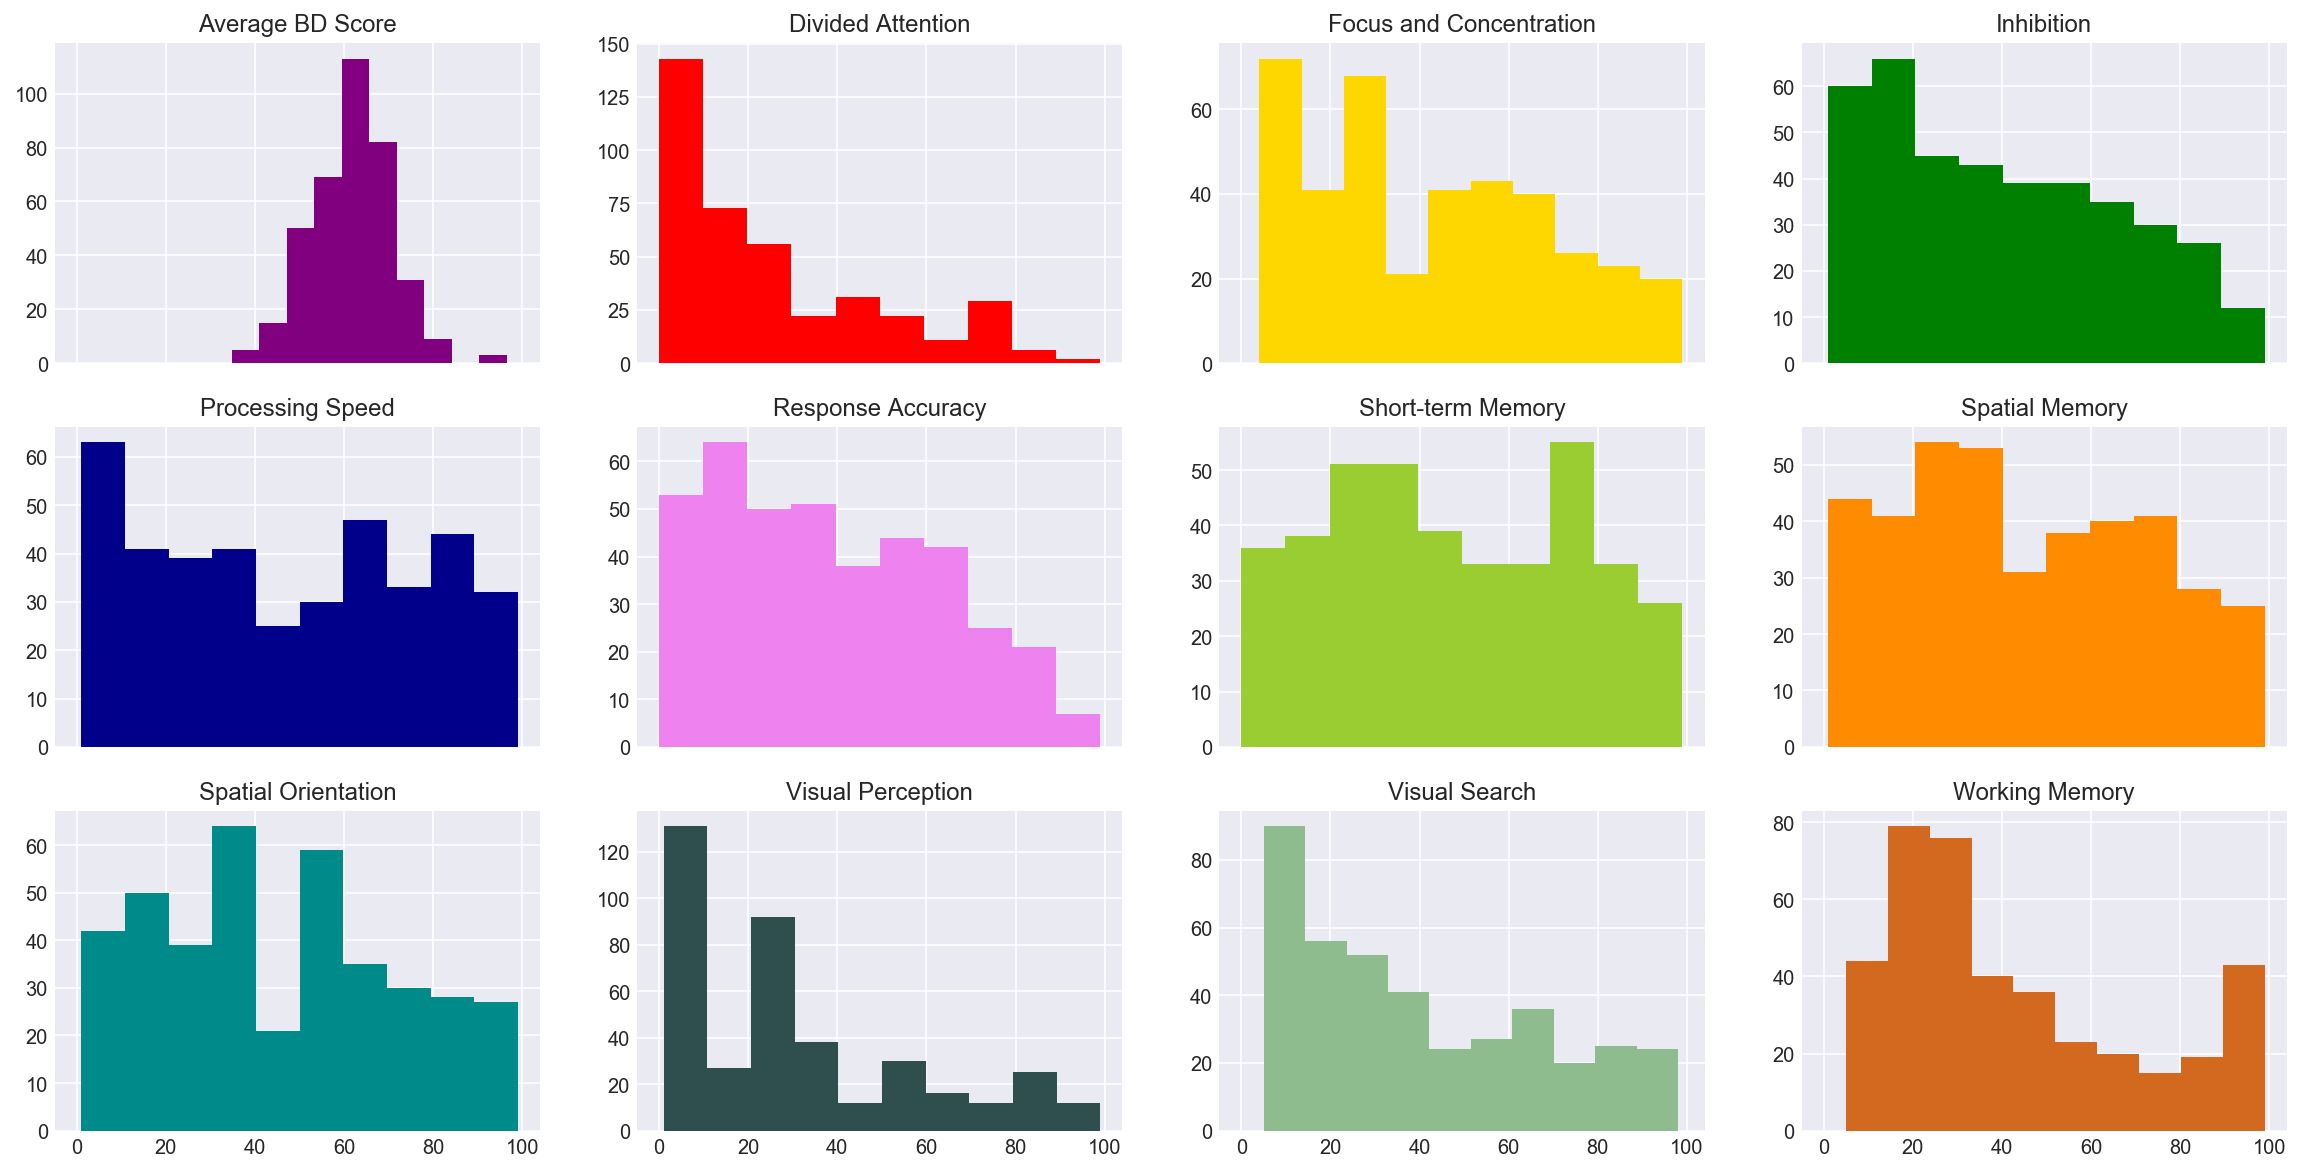

In [10]:
(fig, ax) = plt.subplots(nrows=3, ncols=4, figsize=(20,10), sharex=True)
Driving['Average of bd_score'].hist(ax = ax[0][0], color='purple'); ax[0,0].set_title('Average BD Score')
Driving['Divided Attention'].hist(ax = ax[0][1], color='red'); ax[0,1].set_title('Divided Attention')
Driving['Focus and Concentration'].hist(ax = ax[0][2], color='gold'); ax[0,2].set_title('Focus and Concentration')
Driving['Inhibition'].hist(ax = ax[0][3], color='green'); ax[0,3].set_title('Inhibition')
Driving['Processing Speed'].hist(ax = ax[1][0], color='darkblue'); ax[1,0].set_title('Processing Speed')
Driving['Response Accuracy'].hist(ax = ax[1][1], color='violet'); ax[1,1].set_title('Response Accuracy')
Driving['Short-term Memory'].hist(ax = ax[1][2], color='yellowgreen'); ax[1,2].set_title('Short-term Memory')
Driving['Spatial Memory'].hist(ax = ax[1][3], color='darkorange'); ax[1,3].set_title('Spatial Memory')
Driving['Spatial Orientation'].hist(ax = ax[2][0], color='darkcyan'); ax[2,0].set_title('Spatial Orientation')
Driving['Visual Perception'].hist(ax = ax[2][1], color='darkslategray'); ax[2,1].set_title('Visual Perception')
Driving['Visual Search'].hist(ax = ax[2][2], color='darkseagreen'); ax[2,2].set_title('Visual Search')
Driving['Working Memory'].hist(ax = ax[2][3], color='chocolate'); ax[2,3].set_title('Working Memory')
plt.show()

# Empathic Accuracy


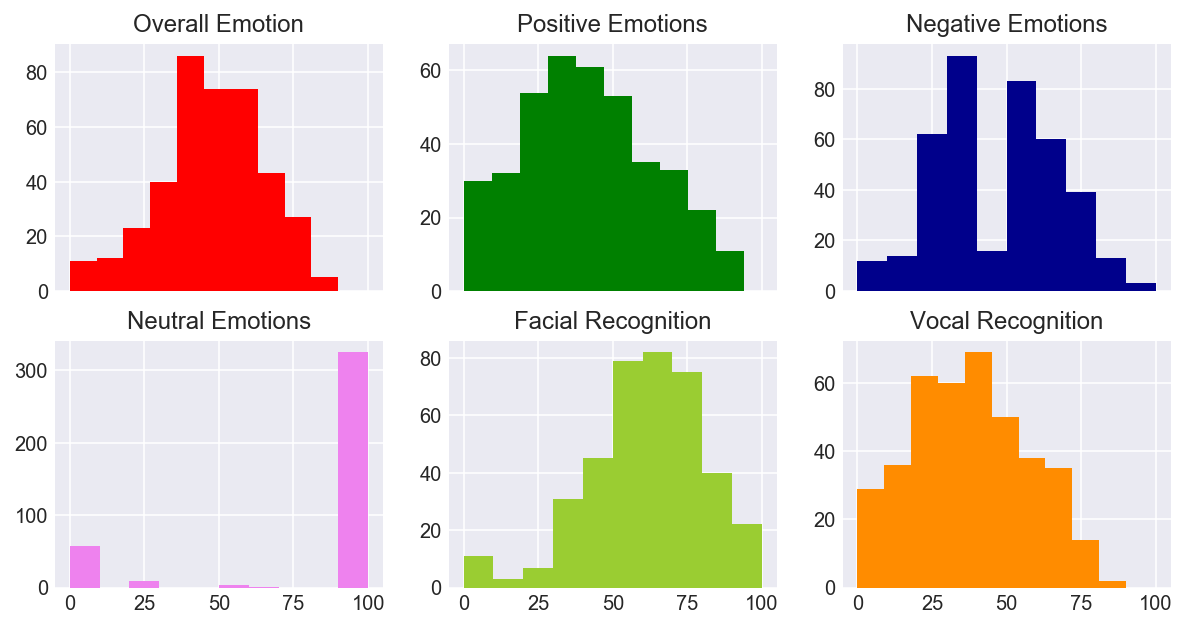

In [11]:
(fig, ax) = plt.subplots(nrows=2, ncols=3, figsize=(10,5), sharex=True)
Driving['Overall Emotion'].hist(ax = ax[0][0], color='red'); ax[0,0].set_title('Overall Emotion')
Driving['Positive Emotions'].hist(ax = ax[0][1], color='green'); ax[0,1].set_title('Positive Emotions')
Driving['Negative Emotions'].hist(ax = ax[0][2], color='darkblue'); ax[0,2].set_title('Negative Emotions')
Driving['Neutral Emotions'].hist(ax = ax[1][0], color='violet'); ax[1,0].set_title('Neutral Emotions')
Driving['Facial Recognition'].hist(ax = ax[1][1], color='yellowgreen'); ax[1,1].set_title('Facial Recognition')
Driving['Vocal Recognition'].hist(ax = ax[1][2], color='darkorange'); ax[1,2].set_title('Vocal Recognition')
plt.show()

# Personality traits

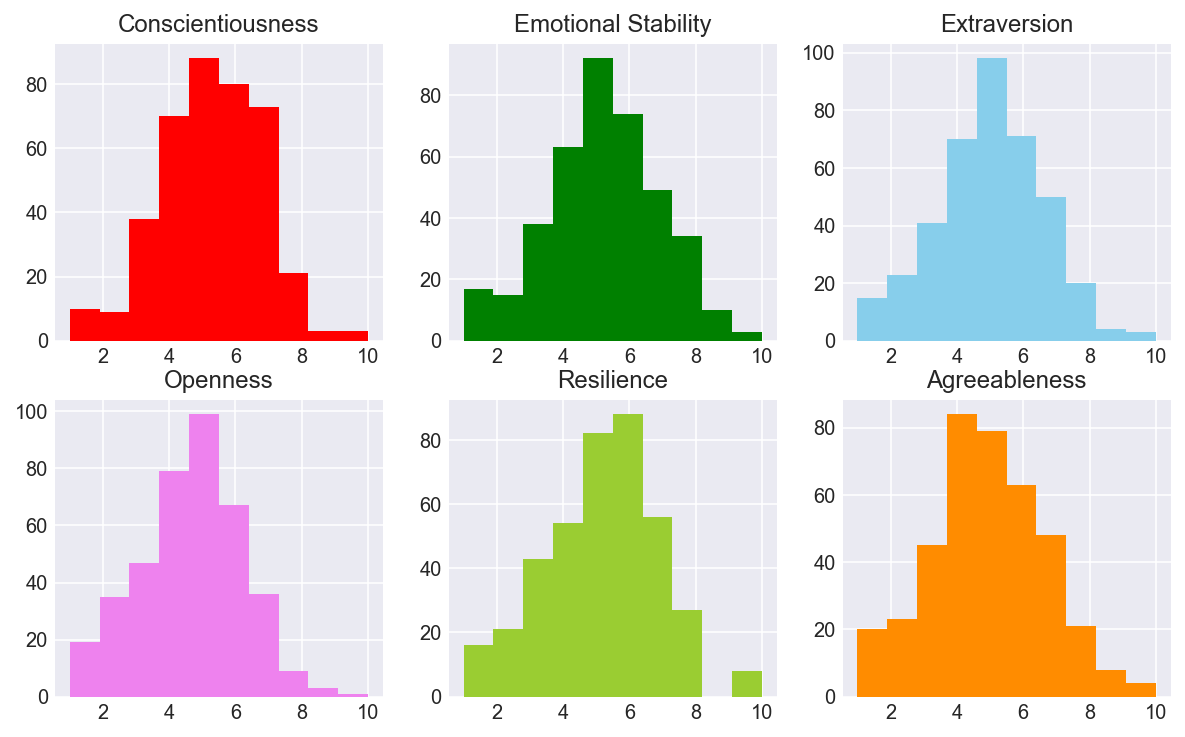

In [12]:
(fig, ax) = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
Driving['Conscientiousness'].hist(ax = ax[0][0], color='red'); ax[0,0].set_title('Conscientiousness')
Driving['Emotional Stability'].hist(ax = ax[0][1], color='green'); ax[0,1].set_title('Emotional Stability')
Driving['Extraversion'].hist(ax = ax[0][2], color='skyblue'); ax[0,2].set_title('Extraversion')
Driving['Openness'].hist(ax = ax[1][0], color='violet'); ax[1,0].set_title('Openness')
Driving['Resilience'].hist(ax = ax[1][1], color='yellowgreen'); ax[1,1].set_title('Resilience')
Driving['Agreeableness'].hist(ax = ax[1][2], color='darkorange'); ax[1,2].set_title('Agreeableness')
plt.show()

# Better driver score is weakly correlated to Cognitive Skills, Empathic Accuracy or Personality Types

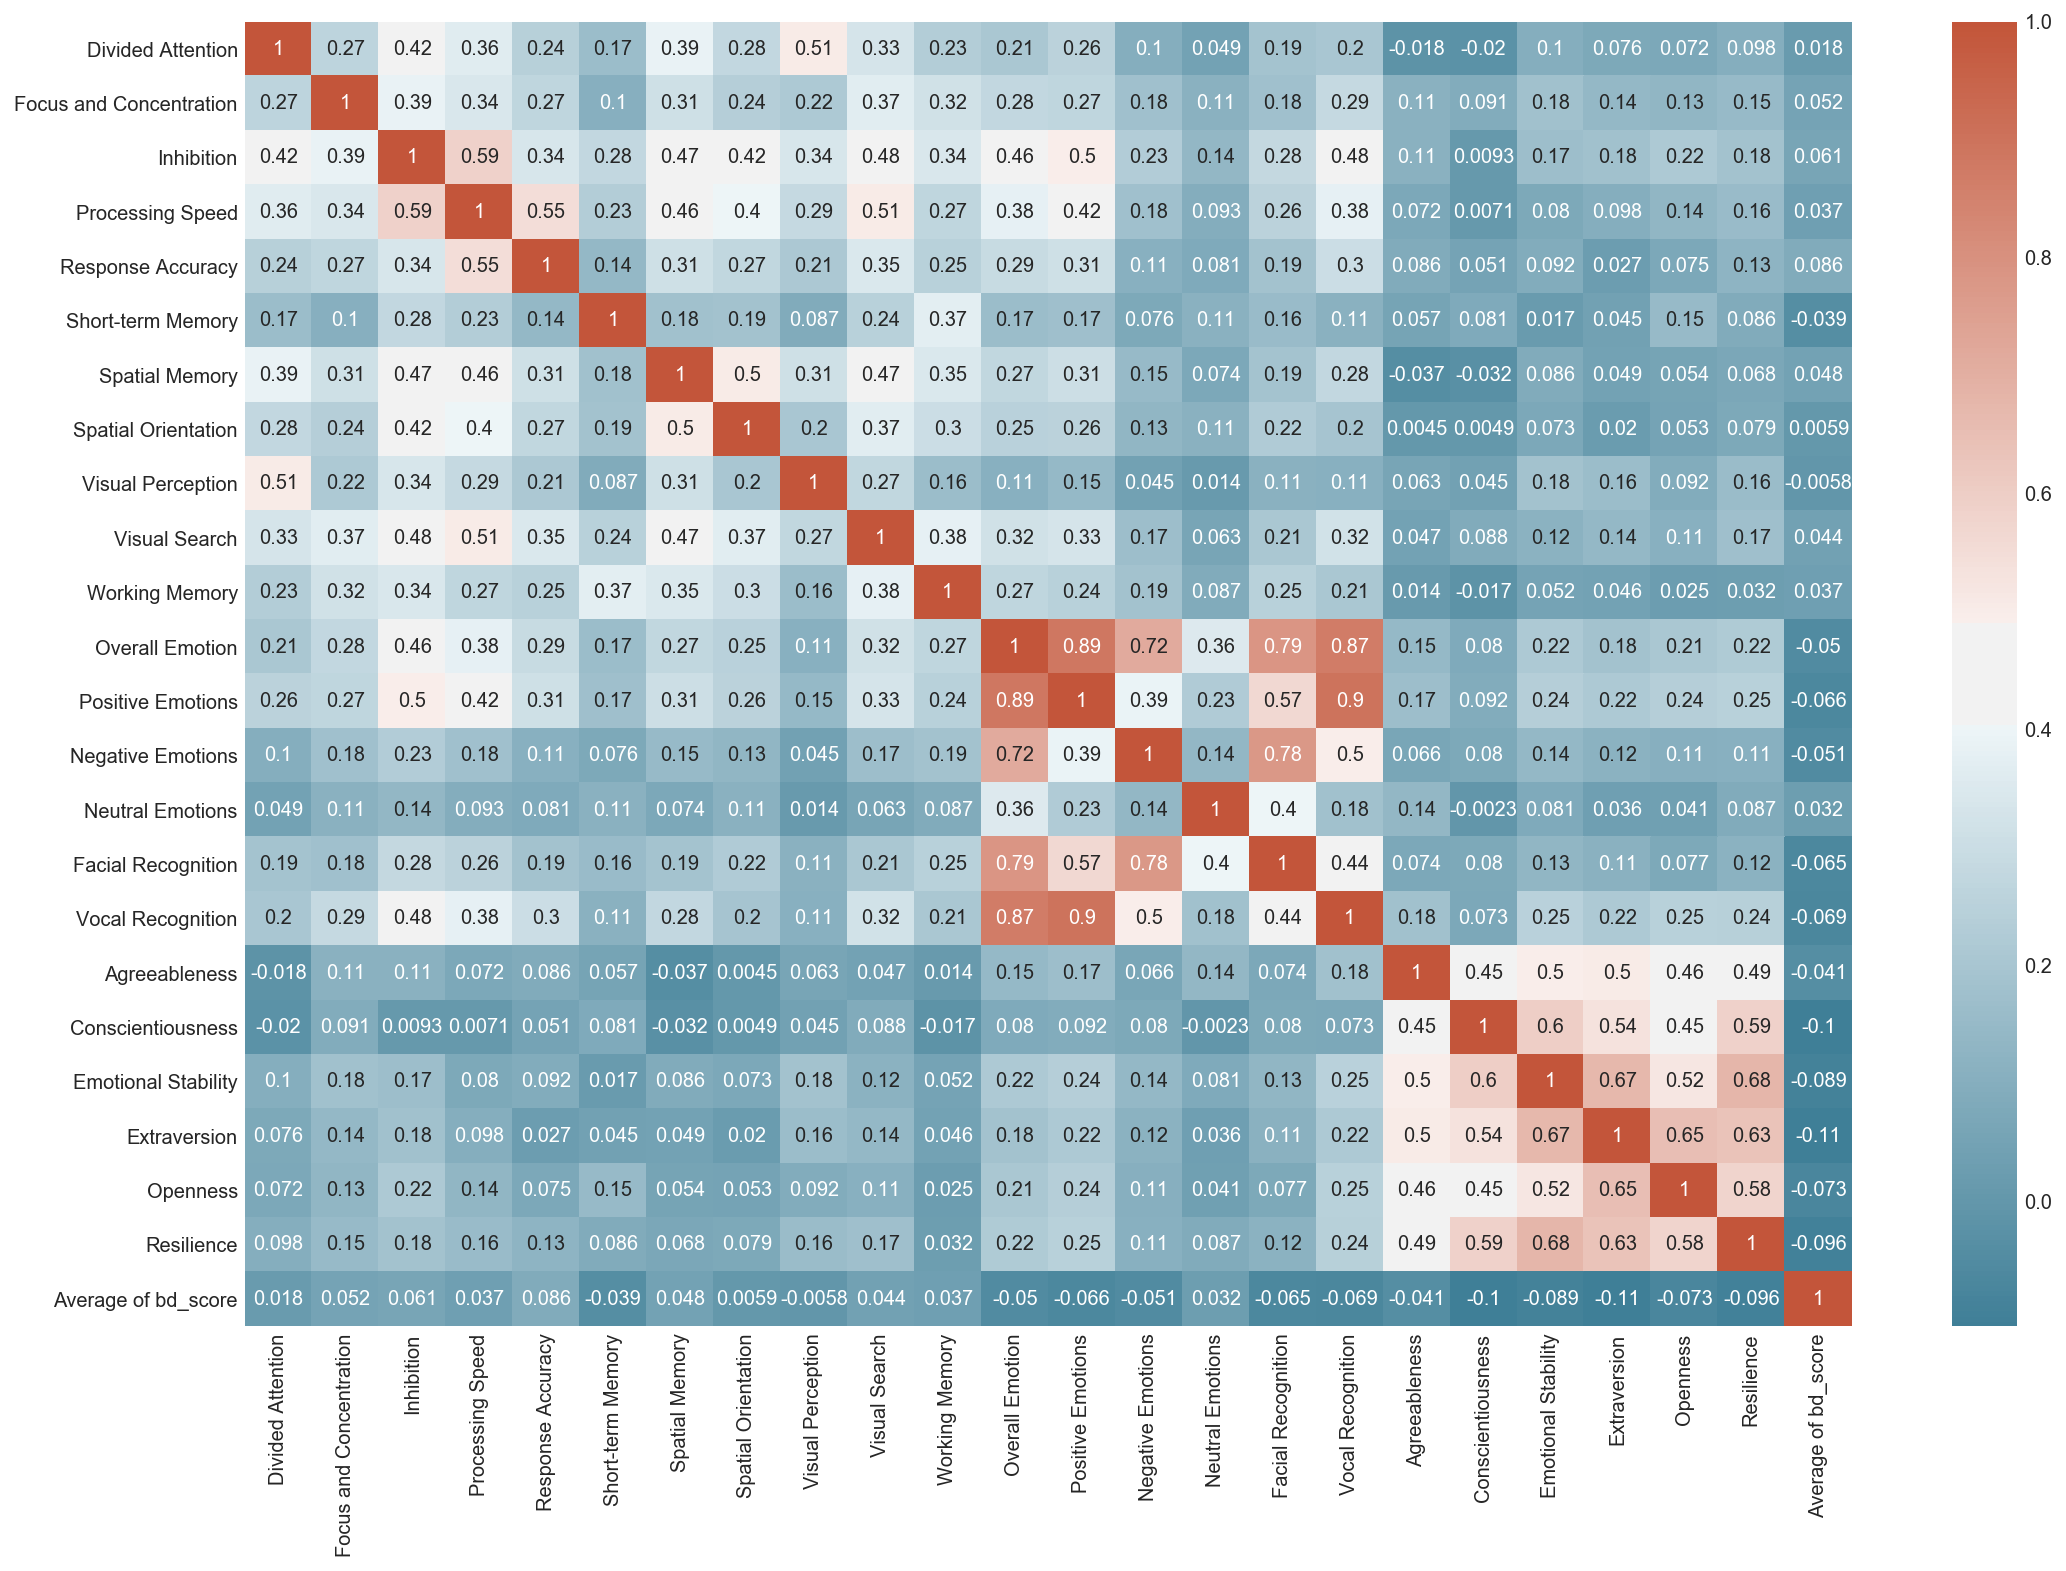

In [13]:
corrmat = Driving.iloc[:,6:30]
(fig, ax) = plt.subplots(figsize=(18,12))
cmap = sns.diverging_palette(225, 20, sep=20, as_cmap=True)
sns.heatmap(corrmat.corr('spearman'), cmap=cmap, annot=True, ax=ax)
None

 - Correlations to average better driver score appear weak to moderate. 
 - The highest correlations appear between response accuracy, inhibition and processing speed.
 - Emotional variables appear highly correlated. Implications for their tests?

Once again we see weak to low correlations between Personality Characteristics and Average Better Driver Score.

## Test a Linear model on Characteristics, Emphatic and Cognitive skills
---

In [14]:
# Target
y = Driving[['Average of bd_score']]
# Features
X = Driving.iloc[:,6:29]
# Add an intercept term
X = sm.add_constant(X)
res = sm.OLS(y, X, missing='drop').fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Average of bd_score   R-squared:                       0.054
Model:                             OLS   Adj. R-squared:                 -0.008
Method:                  Least Squares   F-statistic:                    0.8727
Date:                 Thu, 19 Oct 2017   Prob (F-statistic):              0.636
Time:                         17:57:27   Log-Likelihood:                -1356.4
No. Observations:                  377   AIC:                             2761.
Df Residuals:                      353   BIC:                             2855.
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

Note the large constant term and low R-squared implies that very little of the Better Driver Score can be explained with a combination of these variables.

The only variables that appear to be statistically significant include:
    - Vocal Recognition
    - Facial Recognition
    - Response Accuracy
    - Inhibition

** Filter down to these four features, adjusted R-square improves, but the only significant regressors are Inhibition and Vocal Recognition. **

In [15]:
X2 = Driving[['Response Accuracy', 'Inhibition','Facial Recognition','Vocal Recognition']]
X2 = sm.add_constant(X2)
res2 = sm.OLS(y, X2, missing='drop').fit()
print(res2.summary())

                             OLS Regression Results                            
Dep. Variable:     Average of bd_score   R-squared:                       0.023
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     2.222
Date:                 Thu, 19 Oct 2017   Prob (F-statistic):             0.0661
Time:                         17:57:27   Log-Likelihood:                -1362.4
No. Observations:                  377   AIC:                             2735.
Df Residuals:                      372   BIC:                             2754.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.2

### Response accuracy is one of the more significant variables. Let's come back to that later on...

# Total Risk Events

## Better Driver Score is a feature, engineered from total risk events so they will be strongly correlated and modeling these against risk events will be futile.
---

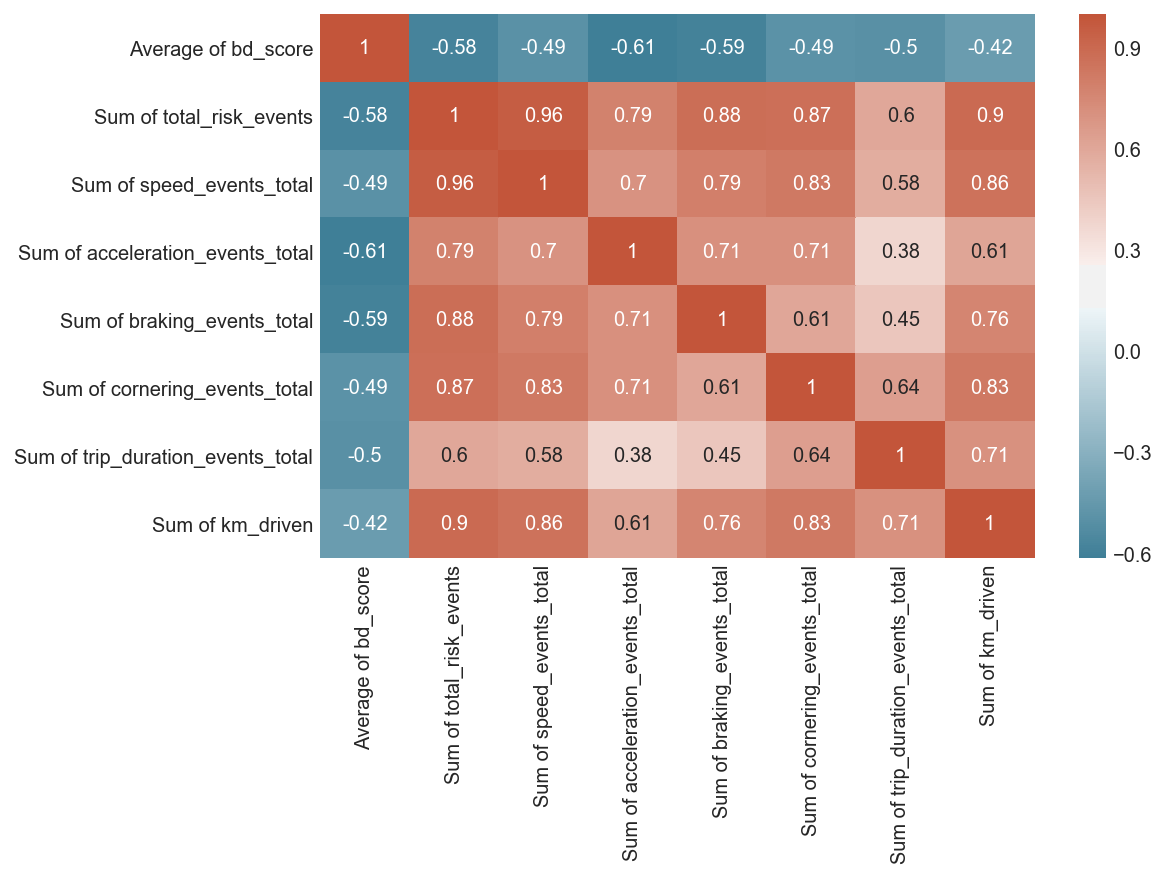

In [16]:
Events = Driving.copy()
events_matrix = Events[['Average of bd_score','Sum of total_risk_events','Sum of speed_events_total',
                'Sum of acceleration_events_total','Sum of braking_events_total','Sum of cornering_events_total',
                'Sum of trip_duration_events_total','Sum of km_driven']]

# Correlation Matrix
(fig, ax) = plt.subplots(figsize=(8,5))
sns.heatmap(events_matrix.corr('spearman'), cmap=cmap, annot=True, ax=ax)
plt.show()

# What if we use Total Risk Events as the target and our cognitive skills, empathic accuracy and personality types as features?
---

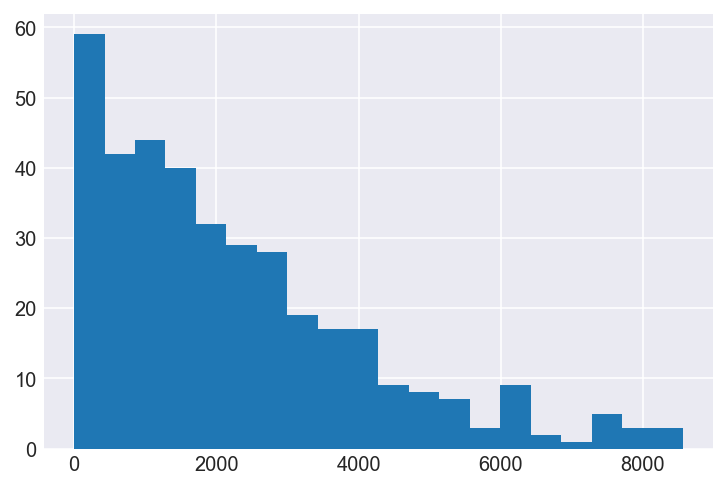

In [17]:
# Check out the distribution of Total Risk Events
Driving['Sum of speed_events_total'].hist(bins=20)
plt.show()
# Looks like a power law distribution

Fitted alpha distribution with error=2.45694797211e-06)
Fitted anglit distribution with error=1.6268337059e-06)
Fitted arcsine distribution with error=1.46045018413e-06)
Fitted argus distribution with error=2.00650877374e-06)
Fitted beta distribution with error=5.20498811505e-07)
Fitted betaprime distribution with error=8.55287793884e-07)
Fitted bradford distribution with error=1.00804295653e-06)
Fitted burr distribution with error=2.99410958598e-06)
Fitted burr12 distribution with error=2.62713883656e-06)
Fitted cauchy distribution with error=1.21162221087e-06)
Fitted chi distribution with error=4.44394156208e-07)
Fitted chi2 distribution with error=3.12761715638e-06)
Fitted cosine distribution with error=1.44405110749e-06)
Fitted dgamma distribution with error=1.14858591847e-06)
Fitted dweibull distribution with error=1.12545965482e-06)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1000000000000001.
  RuntimeWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0666666666666664.
  RuntimeWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0499999999999998.
  RuntimeWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1000000000000005.
  RuntimeWarning)
/Users/h

/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.5907569626825153).
  RuntimeWarning)


Fitted erlang distribution with error=8.35046663132e-07)
Fitted expon distribution with error=5.44916590586e-07)
Fitted exponnorm distribution with error=5.45699154501e-07)
Fitted exponpow distribution with error=5.95136823401e-07)
Fitted exponweib distribution with error=2.63721226257e-06)
Fitted f distribution with error=1.84891480782e-06)
Fitted fatiguelife distribution with error=1.06998037783e-06)
Fitted fisk distribution with error=1.93153812095e-06)
Fitted foldcauchy distribution with error=2.73268934957e-06)
Fitted foldnorm distribution with error=6.86797575544e-07)
Fitted frechet_l distribution with error=3.74463286494e-06)
Fitted frechet_r distribution with error=1.88728982324e-06)
Fitted gamma distribution with error=5.60053004338e-07)
Fitted gausshyper distribution with error=5.11743530815e-07)
Fitted genexpon distribution with error=5.53904206349e-07)
Fitted genextreme distribution with error=1.91604796678e-06)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:1902: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:1907: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


Fitted gengamma distribution with error=3.81724353402e-06)
Fitted genhalflogistic distribution with error=6.28839198617e-07)
Fitted genlogistic distribution with error=9.76754540027e-07)
Fitted gennorm distribution with error=1.16987073919e-06)
Fitted genpareto distribution with error=2.02972296821e-06)
Fitted gilbrat distribution with error=7.4709109734e-07)
Fitted gompertz distribution with error=5.53405581311e-07)
Fitted gumbel_l distribution with error=1.56159774106e-06)
Fitted gumbel_r distribution with error=9.7714832374e-07)
Fitted halfcauchy distribution with error=6.32155429442e-07)
Fitted halfgennorm distribution with error=1.63298449429e-06)
Fitted halflogistic distribution with error=6.29551148318e-07)
Fitted halfnorm distribution with error=6.86793620436e-07)
Fitted hypsecant distribution with error=1.14548712432e-06)
Fitted invgamma distribution with error=8.55288867843e-07)
Fitted invgauss distribution with error=1.26809798838e-06)
Fitted invweibull distribution with err

/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4321: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4321: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))


Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=1.05551987931e-06)
Fitted rdist distribution with error=1.21830871423e-06)
Fitted recipinvgauss distribution with error=6.6275156803e-07)
Fitted reciprocal distribution with error=3.15328734921e-06)
Fitted rice distribution with error=1.05551991162e-06)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=1.79265308981e-06)
Fitted skewnorm distribution with error=6.86858894163e-07)
Fitted t distribution with error=1.14529514996e-06)
Fitted trapz distribution with error=2.99463492617e-06)
Fitted triang distribution with error=8.80862215291e-07)
Fitted truncexpon distribution with error=1.05041924066e-06)
Fitted truncnorm distribution with error=3.15328734921e-06)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4904: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


Fitted tukeylambda distribution with error=1.14548313786e-06)
Fitted uniform distribution with error=1.78853933628e-06)
Fitted vonmises distribution with error=6.19548447232e+58)
Fitted vonmises_line distribution with error=1.14535291814e-06)
Fitted wald distribution with error=7.60419832692e-07)
Fitted weibull_max distribution with error=3.74463286494e-06)
Fitted weibull_min distribution with error=1.88728982324e-06)
Fitted wrapcauchy distribution with error=nan)


sumsquare_error
nakagami       4.328239e-07
chi            4.443942e-07
gausshyper     5.117435e-07
pearson3       5.145184e-07
beta           5.204988e-07

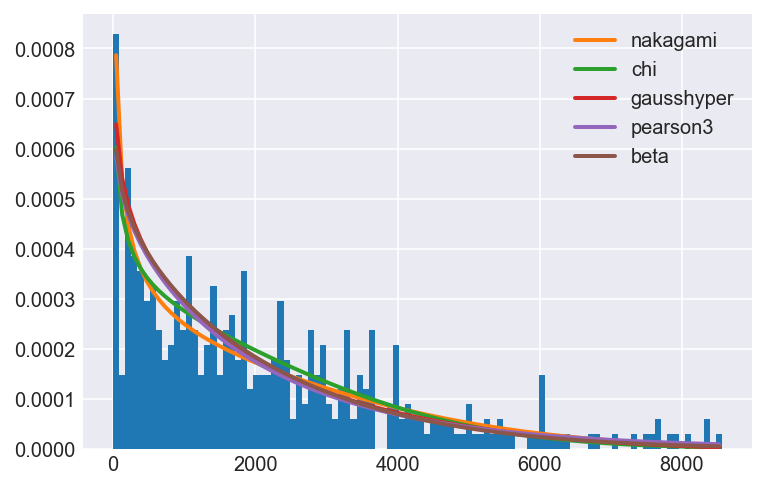

In [18]:
import fitter
f = fitter.Fitter(Driving['Sum of speed_events_total'].fillna(0))
f.fit()
f.summary()

In [19]:
Driving2 = Driving[['Sum of total_risk_events','Divided Attention','Focus and Concentration',
                   'Inhibition','Processing Speed','Response Accuracy','Short-term Memory',
                    'Spatial Orientation','Visual Perception','Visual Search','Working Memory']].dropna(axis=0)
# Drop rows where total risk events = 0
Driving2 = Driving2[Driving2['Sum of total_risk_events'] != 0]
Driving2['LogTotRiskEvents'] = np.log(Driving2['Sum of total_risk_events'])
Driving2.describe()

Sum of total_risk_events  Divided Attention  Focus and Concentration  \
count                374.000000         374.000000               374.000000   
mean                6166.708556          24.467914                42.254011   
std                 5256.184308          23.692009                26.955572   
min                   27.000000           0.000000                 4.000000   
25%                 1934.250000           5.000000                18.000000   
50%                 4979.000000          15.000000                38.000000   
75%                 9039.000000          39.750000                61.000000   
max                32162.000000          99.000000                99.000000   

       Inhibition  Processing Speed  Response Accuracy  Short-term Memory  \
count  374.000000        374.000000         374.000000         374.000000   
mean    39.842246         46.836898          38.860963          48.334225   
std     26.492231         29.960432          25.119061          27.746228   
min      1.000000          1.000000           0.000000           0.000000   
25%     16.000000         18.000000          18.000000          25.000000   
50%     38.000000         46.500000          35.500000          46.500000   
75%     61.000000         73.000000          58.000000          73.000000   
max     99.000000         99.000000          99.000000          99.000000   

       Spatial Orientation  Visual Perception  Visual Search  Working Memory  \
count           374.000000         374.000000     374.000000      374.000000   
mean             44.526738          30.304813      39.676471       42.756684   
std              27.466540          27.467907      27.233272       27.916808   
min               1.000000           1.000000       5.000000        5.000000   
25%              21.000000           7.000000      15.000000       21.000000   
50%              40.500000          24.000000      32.500000       34.000000   
75%              67.000000          45.750000      62.000000       61.000000   
max              99.000000          99.000000      98.000000       99.000000   

       LogTotRiskEvents  
count        374.000000  
mean           8.259073  
std            1.136062  
min            3.295837  
25%            7.567475  
50%            8.512981  
75%            9.109302  
max           10.378541

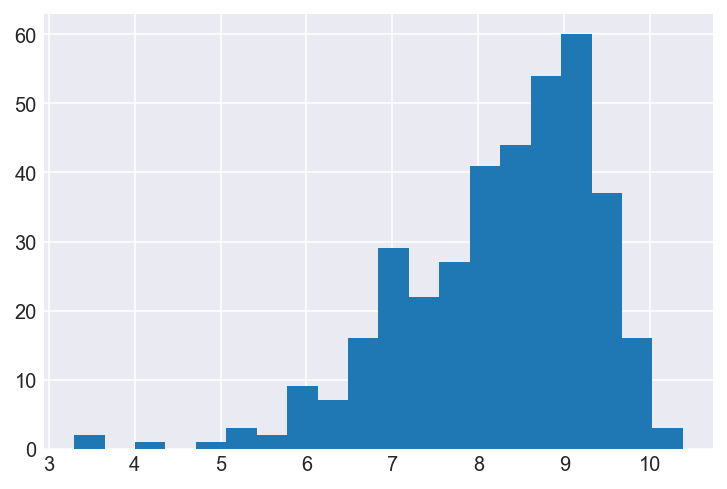

In [20]:
# Check out the distribution of Log Total Risk Events
Driving2['LogTotRiskEvents'].hist(bins=20)
plt.show()
# Looks like a left skewed distribution...

## Low correlations remain between cognition, emotions, personality and total risk events...

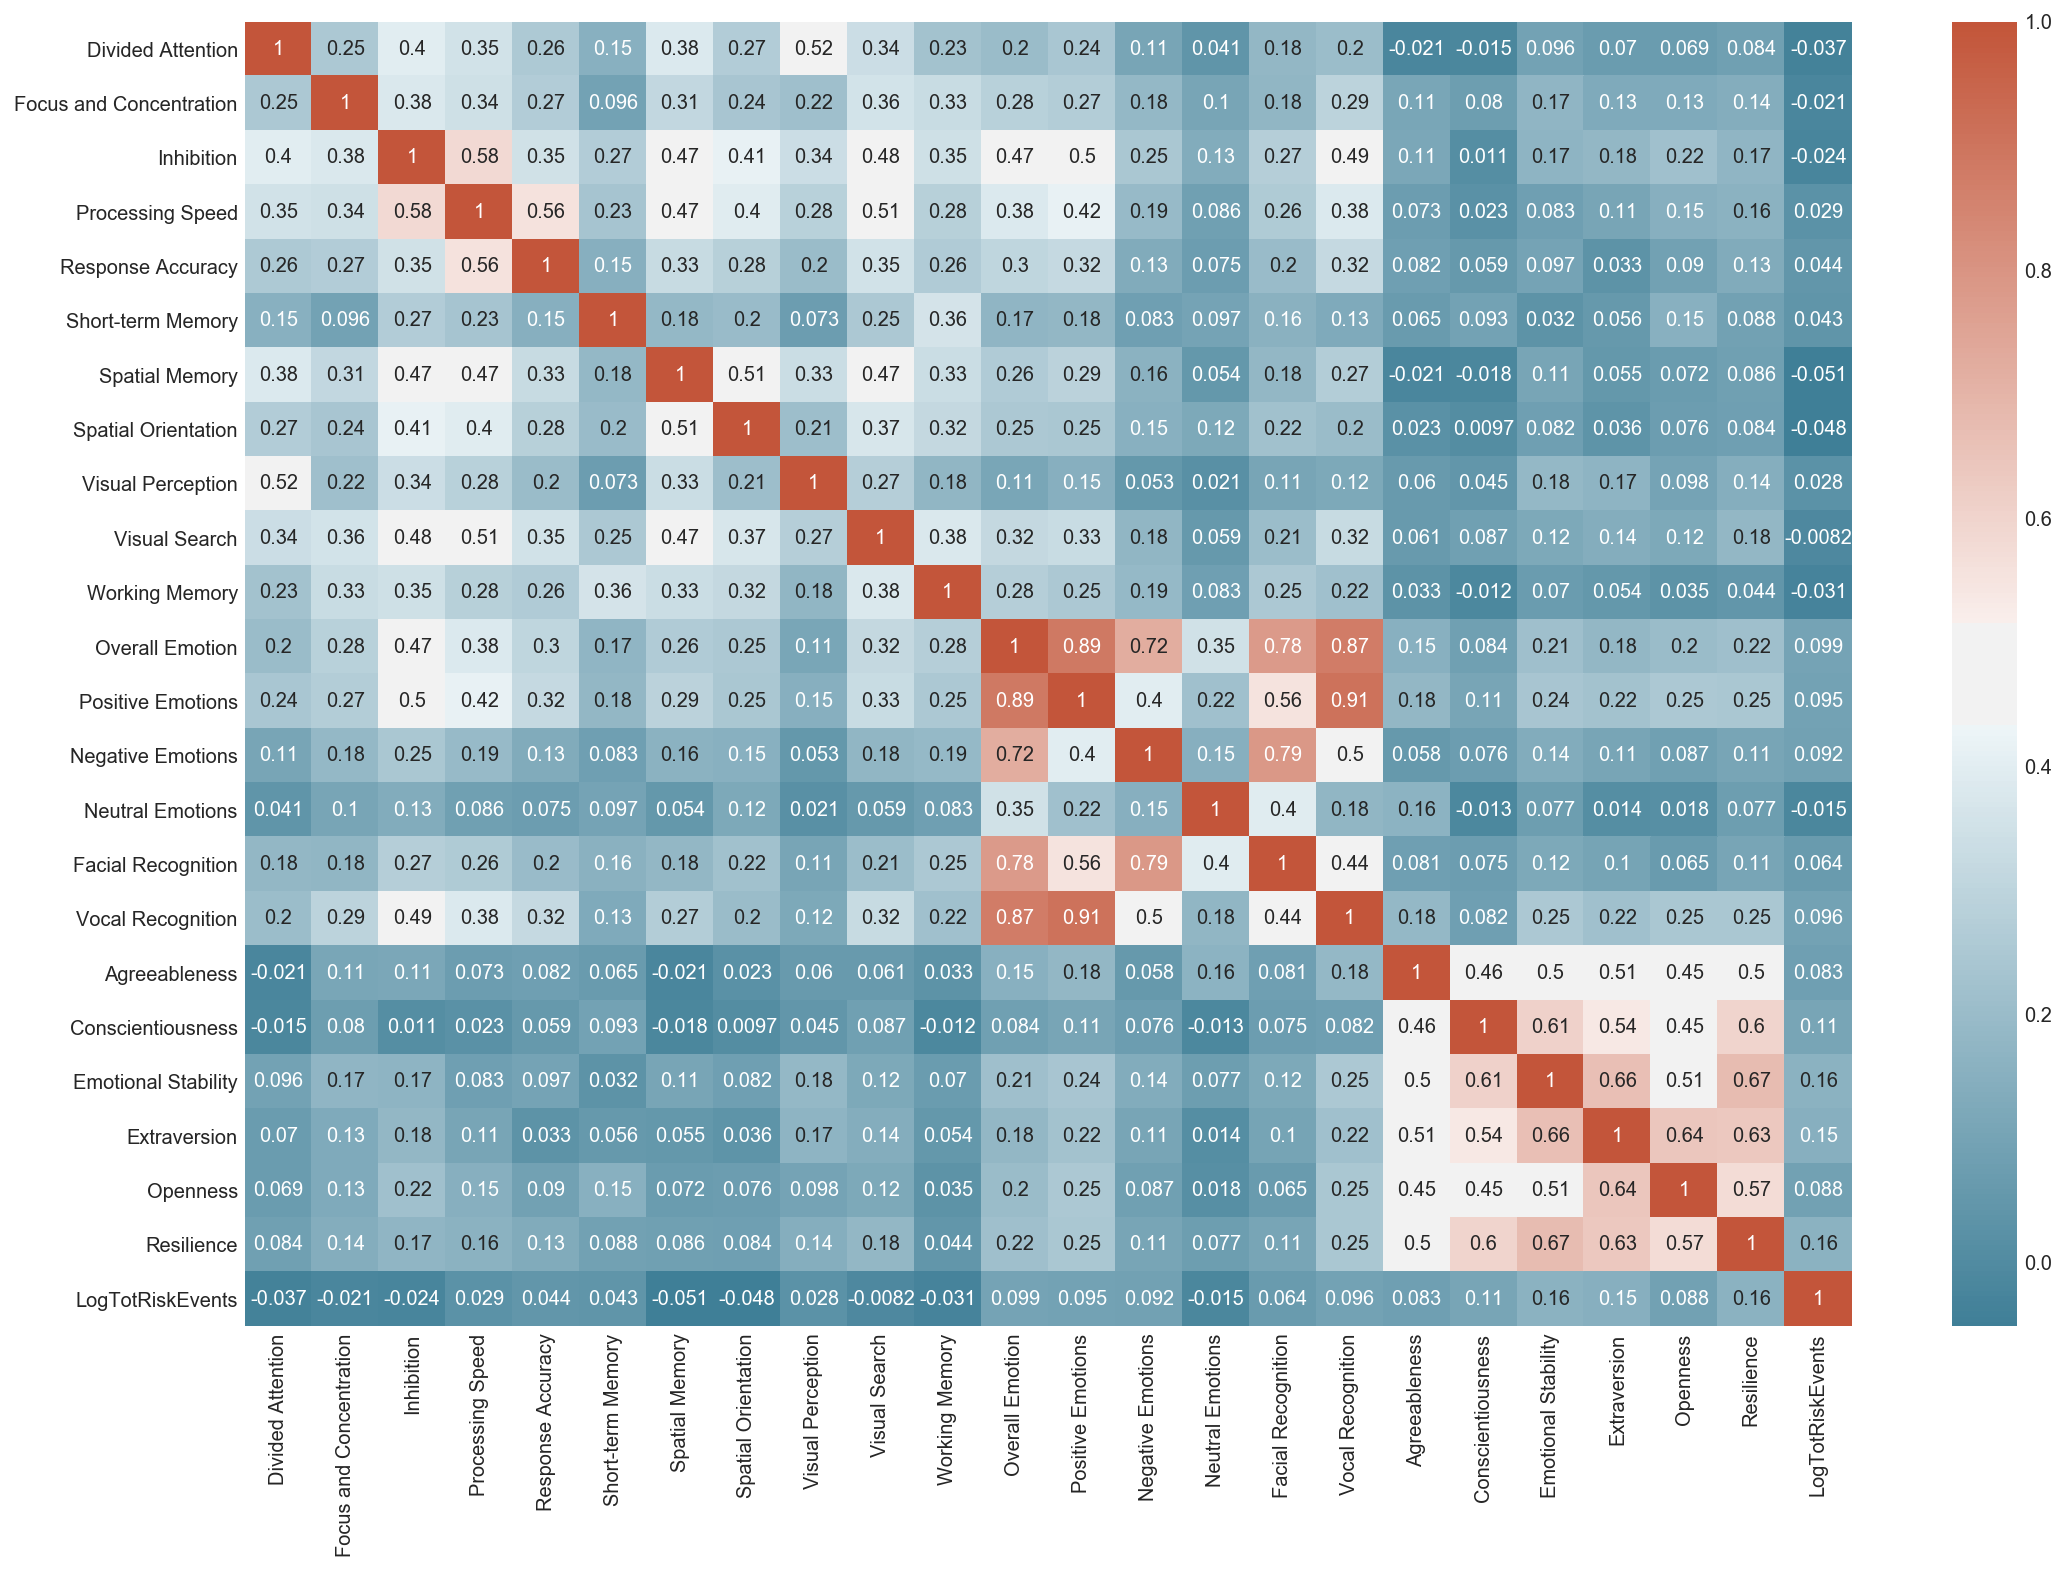

In [21]:
Driving_Reg = Driving.copy()
Driving_Reg = Driving_Reg.iloc[:,6:31]
Driving_Reg = Driving_Reg.dropna(axis=0)
Driving_Reg = Driving_Reg[Driving_Reg['Sum of total_risk_events'] != 0]
Driving_Reg['LogTotRiskEvents'] = np.log(Driving_Reg['Sum of total_risk_events'])
Driving_Reg.drop(['Sum of total_risk_events', 'Average of bd_score'], axis=1, inplace=True)
# Plot Correlation Matrix
# Correlation Matrix
(fig, ax) = plt.subplots(figsize=(18,12))
sns.heatmap(Driving_Reg.corr('spearman'), cmap=cmap, annot=True, ax=ax)
plt.show()

## Testing a Linear model on Characteristics, Emphatic and Cognitive skills
---

## A familiar story here...

In [22]:
Driving_Reg = Driving.copy()
Driving_Reg = Driving_Reg.iloc[:,6:31]
Driving_Reg = Driving_Reg.dropna(axis=0)
Driving_Reg = Driving_Reg[Driving_Reg['Sum of total_risk_events'] != 0]
Driving_Reg['LogTotRiskEvents'] = np.log(Driving_Reg['Sum of total_risk_events'])
Driving_Reg.drop(['Sum of total_risk_events'], axis=1, inplace=True)
y = Driving_Reg[['LogTotRiskEvents']]
X4 = Driving_Reg.drop(['LogTotRiskEvents','Average of bd_score'], axis=1)
X4 = sm.add_constant(X4)
res4 = sm.OLS(y, X4, missing='drop').fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:       LogTotRiskEvents   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.195
Date:                Thu, 19 Oct 2017   Prob (F-statistic):              0.246
Time:                        17:57:50   Log-Likelihood:                -563.76
No. Observations:                 374   AIC:                             1176.
Df Residuals:                     350   BIC:                             1270.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## A fruitless endeavour so far: It seems unlikely that a linear model will be able to predict driver behavior as measured either by better driver score or total risk events.

---



# Reframe the problem: classify drivers as "bad" if they had accidents and "good" if they did not.

### Accident Data
---

In [23]:
claims_file = '../Data4/Update to Cognitive_ Claims and driving summary v1.xlsx'
claims = pd.read_excel(claims_file, sheetname='Claims Data', header=0)
claims.head()

Vehicle Registration           Device ID  Client  Claim Number Report Date  \
0               034WHH  dan354235058192356  Splend        383586  2016-06-06   
1               034WHH  dan354235058192356  Splend        381876  2016-05-16   
2               105WDS  dan354235059852990  Splend        381841  2016-05-16   
3               110WDS  dan354235059842595  Splend        380419  2016-04-28   
4              1EXY365  dan354235059967517  Splend        380312  2016-04-27   

  Status SentTo Insurer Incident Date Incident State  \
0   OPEN            NaT    2016-06-04            NSW   
1   OPEN            NaT    2016-05-16            QLD   
2   OPEN            NaT    2016-05-13            QLD   
3  CLOSE     2016-05-04    2016-04-27            QLD   
4   OPEN     2016-05-02    2016-04-27             WA   

                  Incident Code     Fault  \
0                   W3L - Flood         L   
1  C2R - TP Hits Client In Rear  Recovery   
2  C2R - TP Hits Client In Rear  Recovery   
3            B2R - TP Reversing  Recovery   
4   S2L - Hit Stationary Object         L   

                                       Damage Code  \
0  U1 - Undercarriage(Incl Suspension/Engine Sump)   
1                           R0 - Rear Only - Light   
2                           R0 - Rear Only - Light   
3                           F2 - Front + R/H Guard   
4                           R0 - Rear Only - Light   

                Damage Description Vehicle Registration.1  Initial Estimate  \
0                    Undercarriage                 034WHH              2000   
1             Rear bumper damaged                  034WHH              1500   
2                      rear bumper                 105WDS              1450   
3  os front bumper  os front guard                 110WDS              3900   
4  NS REAR BUMPER AND NS TAILLIGHT                1EXY365              1450   

   Insurer Cost  Insurer Cost inc tax  Recovered  Recovered inc tax  \
0             0                     0          0                  0   
1             0                     0          0                  0   
2             0                     0          0                  0   
3             0                     0          0                  0   
4             0                     0          0                  0   

   Client Cost  Client Cost inc tax  Expenses  Expenses inc tax  Own Damage  \
0         0.00                  0.0         0               0.0        0.00   
1        65.00                 71.5        65              71.5        0.00   
2        65.00                 71.5        65              71.5        0.00   
3       909.09               1000.0         0               0.0      909.09   
4       909.09               1000.0         0               0.0      909.09   

   Own Damage inc tax  TP Damage  TP Damage inc tax  TP Payments inc tax  \
0                 0.0          0                  0                    0   
1                 0.0          0                  0                    0   
2                 0.0          0                  0                    0   
3              1000.0          0                  0                    0   
4              1000.0          0                  0                    0   

   All Payments  All Payments inc tax  Client Outstanding  TP Outstanding  \
0          0.00                   0.0            2000.000               0   
1         65.00                  71.5             783.000               0   
2         65.00                  71.5             177.100               0   
3        909.09                1000.0               0.000               0   
4        909.09                1000.0            3416.017               0   

   Invoiced Glass Client Total Loss  Repairs Authorised inc tax  \
0                      0         No                       0.000   
1                      0         No                     854.106   
2                      0         No                     248.600   
3                      

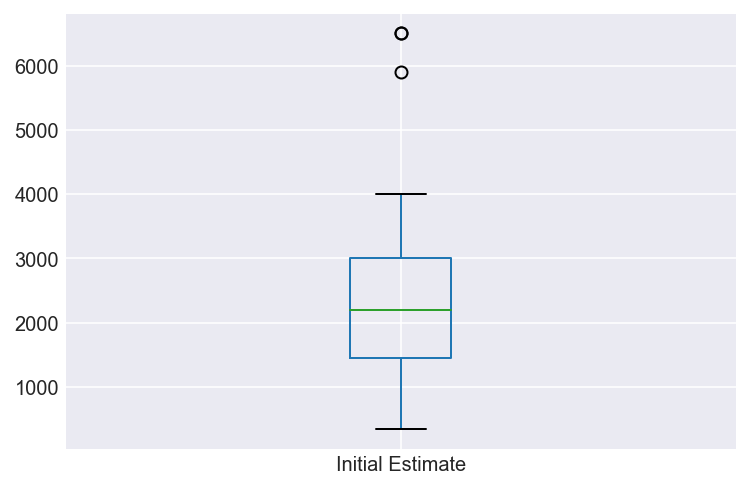

In [24]:
claims.boxplot(column=['Initial Estimate'])
None

### Median accident cost

In [25]:
claims.groupby('Device ID')['Initial Estimate'].mean().median()

2200.0

# Business Case:
---

### - The cost of advertising for and vetting a driver is \$25

### - The median cost of an accident is \$2200

### - The cost of rejecting a new driver when they are actually good (False Positive) is \$25

### - The cost vetting a driver as good and having them commit an accident is \$2175

### If we reject 40 good drivers for every 1 bad driver we reject, we are ahead by \$2175 - \$1000 = \$1175

---
## Take 2: Can we predict (classify) whether a driver will have an accident or not?

In [26]:
query_string = 'WITH accident_devices AS (SELECT DISTINCT `Device Id` FROM accidents WHERE `Device Id` NOT NULL \
                AND `index` NOT IN (46,47)), driver_goodness AS (SELECT DISTINCT username, user_device IN \
                  (SELECT * FROM accident_devices) AS bad_driver FROM uservehicles) \
                SELECT * FROM driver_goodness a JOIN cognitive b ON a.username = b.`From Merc Upload Splend ID`'

In [27]:
# Connect to the existing fleetriskdb
con = sqlite3.connect('../DB/fleetriskdb.sqlite')
# Confirm data is being returned from this query
bad_driver_df = pd.read_sql_query(query_string, con)
# Close connection to the database
con.close()

In [28]:
bad_driver_df.head()

username  bad_driver  index         Unique Code Vehicle Rego  \
0  splend101           0      0  dan354235056684594       911WDX   
1  splend102           0      1  dan354235056681665       DBL66Y   
2  splend103           0      2  dan354235056685757       1GX1TA   
3  splend104           0      3  dan354235056685708       DBD90H   
4  splend105           0      4  dan354235056672268       DBD90J   

   Cognisess ID From Merc Upload Splend ID From Merc Upload Danlaw ID  \
0         57734                  splend101         dan354235056684594   
1         35747                  splend102         dan354235056681665   
2         60468                  splend103         dan354235056685757   
3         57654                  splend104         dan354235056685708   
4         57888                  splend105         dan354235056672268   

  Claims Exist (Claims Data tab)  Divided Attention  Focus and Concentration  \
0                           None                  1                       53   
1                           None                 37                       45   
2                           None                  4                       78   
3                           None                 65                       74   
4                           None                 55                       18   

   Inhibition  Processing Speed  Response Accuracy  Short-term Memory  \
0          50                 9                 14                 70   
1          88                95                 90                 74   
2          44                69                 30                 80   
3          92                94                 42                 78   
4           3                62                 14                 44   

   Spatial Memory  Spatial Orientation  Visual Perception  Visual Search  \
0              55                   85                  2             67   
1              74                   67                 67             31   
2              33                   92                 11             33   
3              62                   67                 87             40   
4               1                    1                  1             33   

   Working Memory  Overall Emotion  Positive Emotions  Negative Emotions  \
0              59               32                 27                 25   
1              78               70                 81                 50   
2              99               61                 54                 62   
3              22               56                 72                 25   
4              16               38                 36                 50   

   Neutral Emotions  Facial Recognition  Vocal Recognition  Agreeableness  \
0               100                  40               20.0              5   
1               100                  70               70.0              5   
2               100                  90               30.0              5   
3               100                  50               60.0              6   
4                 0                  60               20.0              4   

   Conscientiousness  Emotional Stability  Extraversion  Openness  Resilience  \
0                  4                    5             6         4           2   
1                  5                    7             6         5           5   
2                  6                    7             8         9           8   
3                  5                    3             5         5           4   
4                  7                    5             4         4           3   

   Average of bd_score  Sum of total_risk_events  Sum of speed_events_total  \
0            51.489360                    3573.0                     1047.0   
1            60.274947                   12340.0                     5936.0   
2            61.748225                    5292.0                     2220.0   
3            63.901612                    5899.0        

In [29]:
bad_driver_df.groupby('bad_driver')['username'].count()

bad_driver
0    342
1     52
Name: username, dtype: int64

# Imbalanced class problem since only 13% of drivers had accidents

In [30]:
# Was the average bd score for drivers who had accidents different than for drivers not in accidents?
bad_driver_df.groupby('bad_driver')['Average of bd_score'].mean()

bad_driver
0    62.143154
1    59.832451
Name: Average of bd_score, dtype: float64

In [31]:
# Username and whether the driver is a good or bad
b1 = bad_driver_df.iloc[:,0:2]
# Cognitive, Empathic and Personality factors
b2 = bad_driver_df.iloc[:,9:32]
drivers = pd.concat([b1,b2], axis=1, join='inner')

# Having an accident is weakly correlated to cognitive skills, empathic accuracy or personality type.

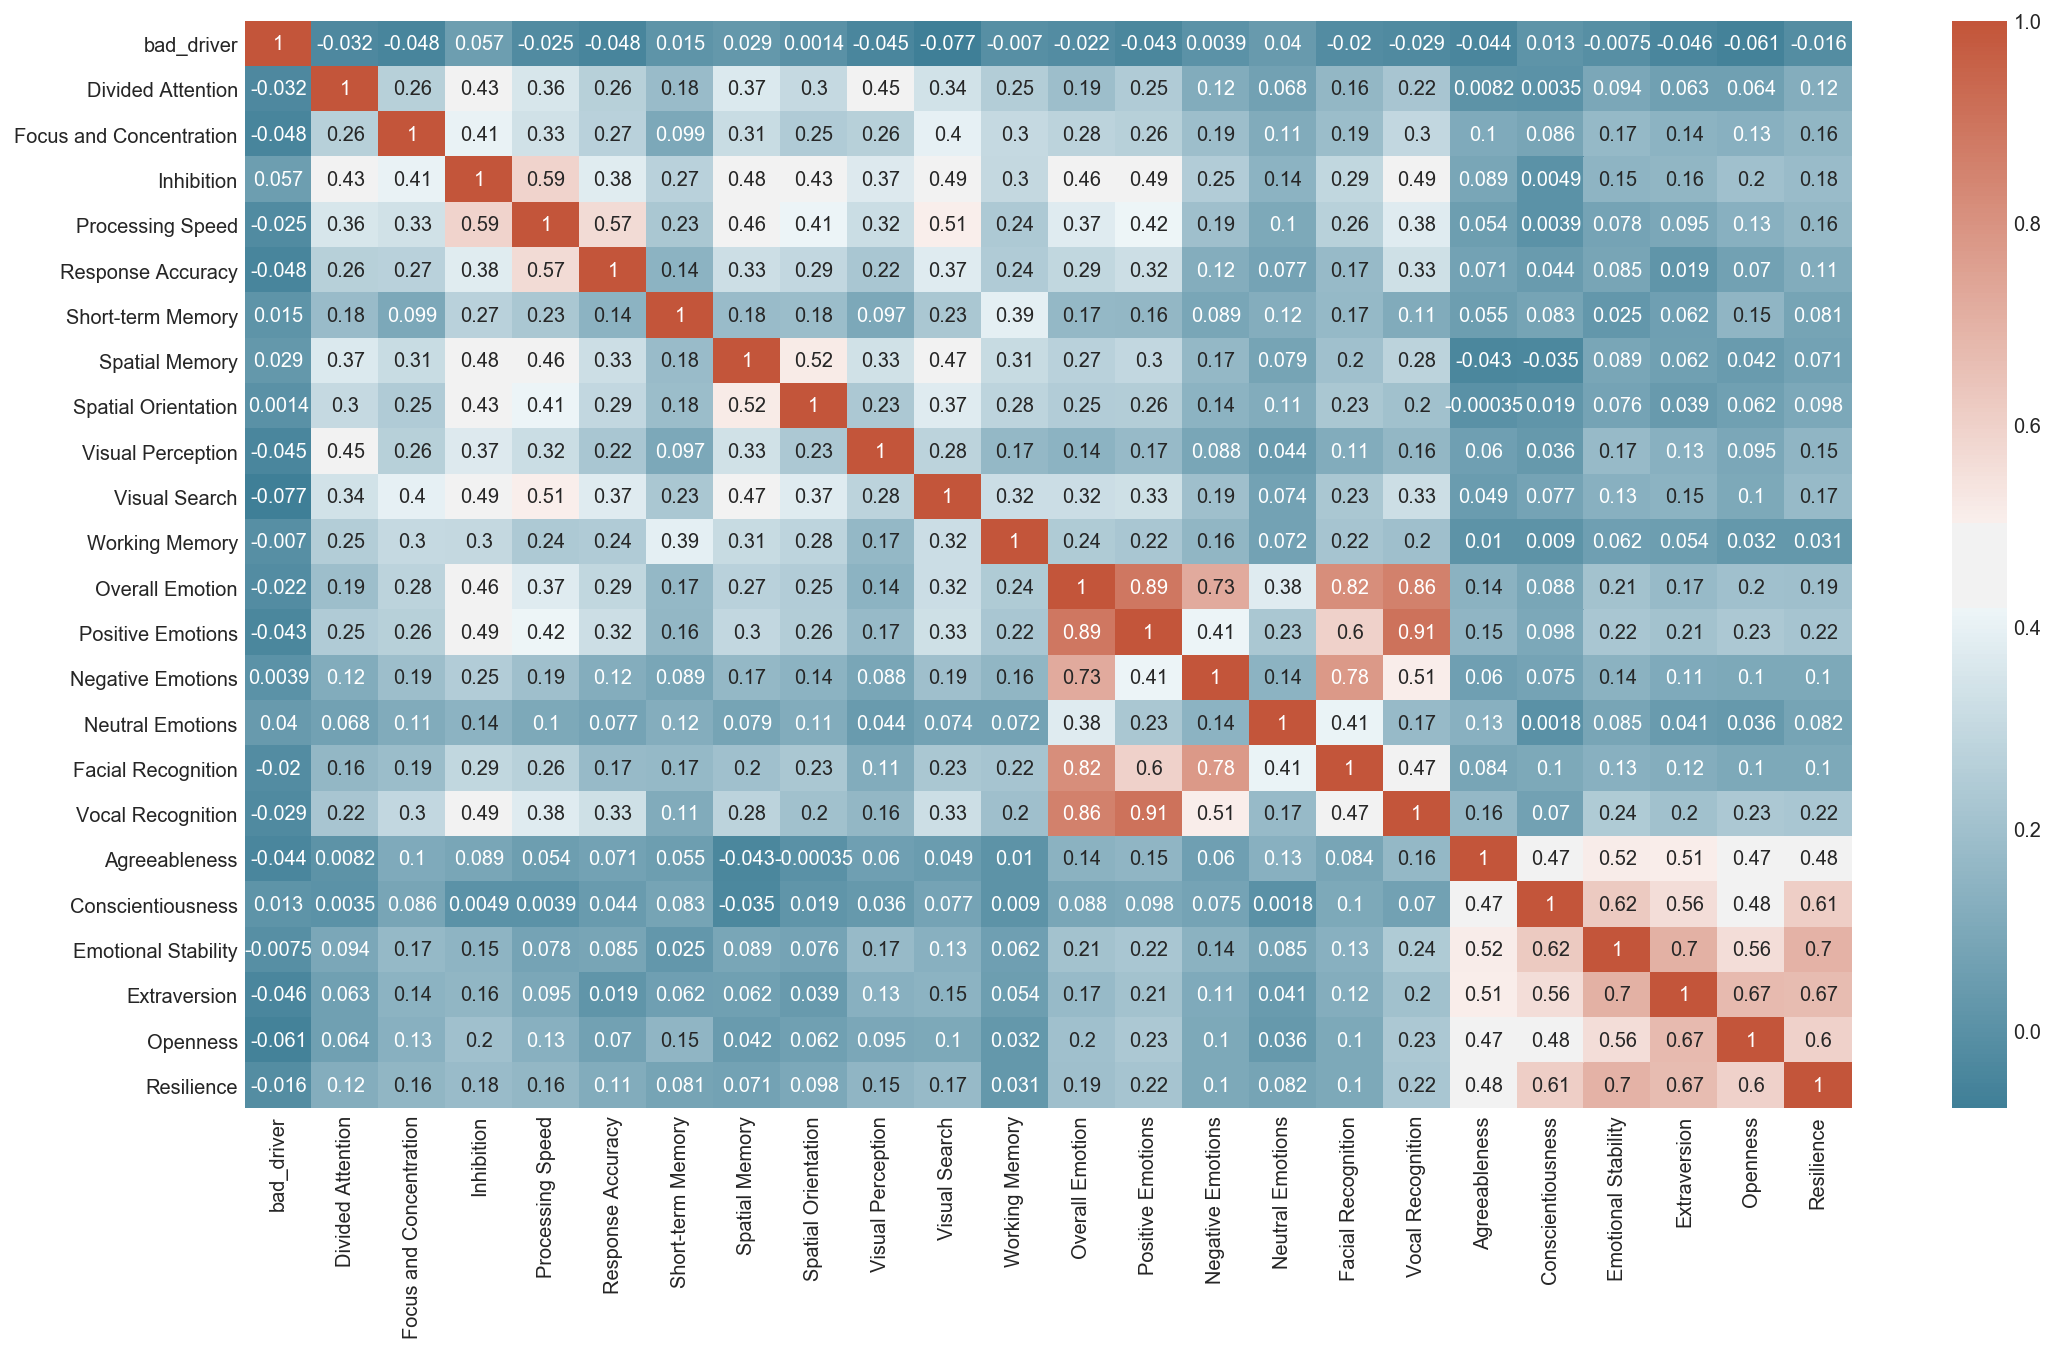

In [32]:
(fig, ax) = plt.subplots(figsize=(18,10))
sns.heatmap(drivers.corr(), annot=True, ax=ax, cmap=cmap)
plt.show()

# Linear models won't work well here....

In [33]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, r2_score

X = drivers.iloc[:,2:]
y = drivers['bad_driver']

# Setup a train-test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
# Create a container for our Logistic Regression Model
lr = LogisticRegression()

# Fit the model to our train and test data and come up with some predictions
y_pred = lr.fit(X_train, y_train).predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [34]:
# By predicting no one will have an accident, we get 82% accuracy...
lr.score(X_test, y_test)

0.82828282828282829

In [35]:
 # Just as good as a dummy...
roc_auc_score(y_test, y_pred)

0.5

In [36]:
# What are the 10 best predictive features?
best_feature_df = pd.DataFrame({
    'Features': X.columns,
    'Coefficients': lr.coef_[0]
})
best_feature_df.sort_values('Coefficients', ascending=0).head(10)

Coefficients                 Features
18      0.159924        Conscientiousness
19      0.104176      Emotional Stability
11      0.087885          Overall Emotion
16      0.033576        Vocal Recognition
15      0.032644       Facial Recognition
2       0.023813               Inhibition
5       0.011918        Short-term Memory
22      0.008891               Resilience
6       0.005828           Spatial Memory
1       0.003536  Focus and Concentration

In [37]:
from sklearn.model_selection import KFold, cross_val_score
# 5 fold cross validation
kfold = KFold(n_splits = 5, random_state=123)
model = LogisticRegression()

# define scoring metrics here
scoring = 'roc_auc'
scoring2 = 'r2'
#scoring3 = 'recall'

# Calculate results
roc_auc_results = cross_val_score(model, X, y, cv=5, scoring=scoring)
r2_results = cross_val_score(model, X, y, cv=5, scoring=scoring2)
accuracy_results = cross_val_score(model, X, y, cv=5)
#recall_results = cross_val_score(model, X, y, cv=5, scoring=scoring3)

# List of accuracy results, R^2 and classifier accuracy
print [roc_auc_results.mean(), r2_results.mean(), accuracy_results.mean()]#, recall_results.mean()]

[0.49695497171200503, -0.28778966131907341, 0.85275641025641025]


# Custom Scoring function:
---

# How much money we will save using this classification model?

# A car accident costs \$2200, while the cost of rejecting a good driver is \$25.

In [38]:
def dollar_score(y, y_pred):
    costs = 0.0
    zipped = zip(y, y_pred)
    for (y_, y_pred_) in zipped:
        # A Driver is Bad but we predict they are good
        if y_ == 1 and y_pred_ == 0:
            costs += 2200
        # A Driver is Good but we predict they are bad
        elif y_ == 0 and y_pred_ == 1:
            costs += 25
        else:
            pass
    return costs

from sklearn.metrics import make_scorer
dollar_scorer = make_scorer(dollar_score, greater_is_better=False)

In [77]:
def dollar_scorer_per_driver(y, y_pred):
    costs = 0.0
    zipped = zip(y, y_pred)
    for (y_, y_pred_) in zipped:
        # A Driver is Bad but we predict they are good
        if y_ == 1 and y_pred_ == 0:
            costs += 2200
        # A Driver is Good but we predict they are bad
        elif y_ == 0 and y_pred_ == 1:
            costs += 25
        else:
            pass
    # Cost per driver
    return costs/len(y)

from sklearn.metrics import make_scorer
dollar_scorer_per_driver = make_scorer(dollar_score_per_driver, greater_is_better=False)

# Dummy Classifier

In [40]:
X = drivers.iloc[:,2:]
y = drivers['bad_driver']
kfold = KFold(n_splits = 5, random_state=123)
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=123)
dummy_classifier = cross_val_score(clf, X, y, cv=kfold, scoring=dollar_scorer)
print dummy_classifier.mean()

-22880.0


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

# Define dataset
X = drivers.iloc[:,2:]
y = drivers['bad_driver']

# Hypertuning Parameters with 5 fold CV
from sklearn.model_selection import GridSearchCV

lr_gridsearch = GridSearchCV(LogisticRegression(), 
                             param_grid={'penalty' : ['l1','l2'],
                                        'C' : [0.1, 0.2, 0.3]},
                            cv=5, n_jobs=-1, verbose=1, scoring=dollar_scorer)
lr_gridsearch.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=1)

In [42]:
lr_gridsearch.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [43]:
lr_gridsearch.best_score_

-22893.401015228428

In [44]:
# 5 fold cross validation
kfold = KFold(n_splits = 5, random_state=123)
model = LogisticRegression(C=0.1, penalty='l1')
results = cross_val_score(model, X, y, cv=kfold, scoring=dollar_scorer)
print results.mean()
# Out of 394 drivers we end up losing $22,905

-22440.0


### This is our baseline. Can we do better using non-linear models?
---

# KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation

# Define dataset
X = drivers.iloc[:,2:]
y = drivers['bad_driver']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Hyperparameter Tuning with 5 Fold CV
kfold = KFold(n_splits = 5, random_state=123)
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), 
                             param_grid={'n_neighbors': [2,3,4,5,6,7,8,9], 
                                         'metric': ['minkowski', 'euclidean', 'manhattan'], 
                                         'weights': ['uniform', 'distance']},
                            cv=5, n_jobs=-1, verbose=1, scoring=dollar_scorer)
# Fit Model
knn_gridsearch.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=1)

In [46]:
knn_gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

In [47]:
knn_gridsearch.best_score_

-19117.51269035533

In [48]:
# 5 fold cross validation
kfold = KFold(n_splits = 5, random_state=123)
model = KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
results = cross_val_score(model, X, y, cv=kfold, scoring=dollar_scorer)
print results.mean()

-19555.0


# Support Vector Machine

In [49]:
from sklearn.svm import SVC

# Define dataset
X = drivers.iloc[:,2:]
y = drivers['bad_driver']

# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

Cs = [0.0001, 0.001, 0.01, 0.1, 1]
gammas = [0.0001, 0.001, 0.01, 0.1, 1]
params = {'C': Cs, 'gamma' : gammas, 'kernel':('linear', 'rbf')}
# Not sure why this line isn't working here...
#kfold = KFold(n_splits=5, random_state=123)

grid_search_svc = GridSearchCV(SVC(), param_grid=params, cv=5, scoring=dollar_scorer, verbose=1, n_jobs=-1)
grid_search_svc.fit(X, y)
grid_search_svc.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.9s finished


{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'linear'}

In [50]:
from sklearn.svm import SVC
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
# Support Vector Machine container
model = SVC(C=0.0001, gamma=0.0001, kernel='linear')
svc_results = cross_val_score(model, X, y, cv=kfold, scoring=dollar_scorer) 
print svc_results.mean()

-22880.0


# Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
# Create a container for our Logistic Regression Model
cart = DecisionTreeClassifier(max_depth=3)
# Fit the model to our train and test data and come up with some predictions
y_pred = cart.fit(X_train, y_train).predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [52]:
# Define dataset
X = drivers.iloc[:,2:]
y = drivers['bad_driver']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Hypertuning Parameters with 5 fold CV
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid = {'max_depth': [1,2,3,4,5], 
                                  'criterion': ['gini', 'entropy'],
                                 # Lets go for 1, 2, 3 min samples left
                                 'min_samples_leaf': [1,2,3],
                                  # Dont bother splitting unless you have < x elements
                                  'min_samples_split': [2,3,4,5,6]}, cv=5, scoring=dollar_scorer)
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=0)

In [53]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [54]:
grid.best_score_

-18605.45685279188

In [55]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
cart = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3, min_samples_split=3)
dt_results = cross_val_score(cart, X, y, cv=kfold, scoring=dollar_scorer)
print dt_results.mean()

-21180.0


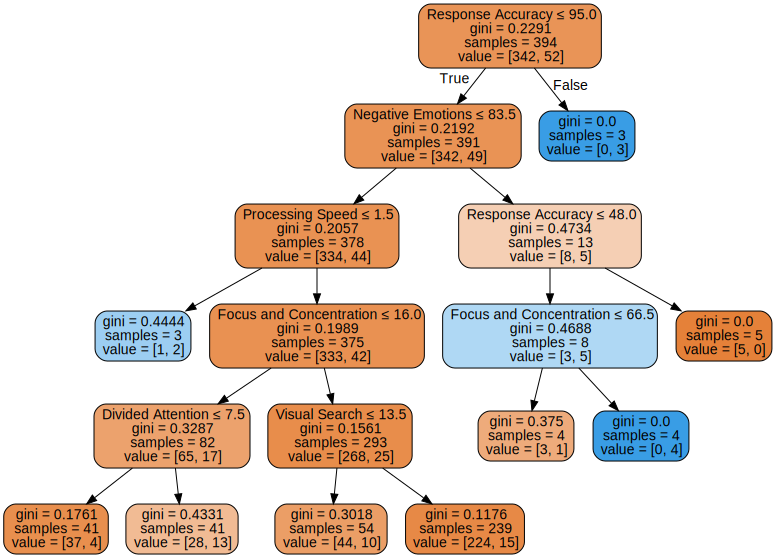

In [56]:
# Visualize this tree
import sklearn.tree
import graphviz
%matplotlib inline
X = drivers.iloc[:,2:]
y = drivers['bad_driver']
cart = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3, min_samples_split=3)
cart.fit(X,y)
driver_data = sklearn.tree.export_graphviz(cart, out_file=None, 
                                        feature_names=X.columns,
                                       filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(driver_data)
graph

## Random Forest Classifier
---

In [57]:
from sklearn.ensemble import RandomForestClassifier
# Define dataset
X = drivers.iloc[:,2:]
y = drivers['bad_driver']

# Train Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Hypertuning Parameters with 5 fold CV
forest_grid = GridSearchCV(RandomForestClassifier(), 
                      param_grid = {'max_depth': [1,2,3,4,5,6], 
                        'criterion': ['gini', 'entropy'],
                      'min_samples_leaf': [1,2,3],
                      'min_samples_split': [2,3,4,5,6]},cv=5,scoring=dollar_scorer)
forest_grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=0)

In [58]:
forest_grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [59]:
forest_grid.best_score_

-22009.89847715736

In [60]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
forest = RandomForestClassifier(criterion='entropy',max_depth=5, min_samples_leaf=1, min_samples_split=3)
rf_results = cross_val_score(forest, X, y, cv=kfold, scoring=dollar_scorer)
print rf_results.mean()

-22885.0


# Gradient Boosting
---

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Define dataset
X = drivers.iloc[:,2:]
y = drivers['bad_driver']

gb = GridSearchCV(GradientBoostingClassifier(),
                    param_grid = {'max_depth': [1,2,3,4,5,6], 
                                    'min_samples_leaf': [1,2,3],
                                  'min_samples_split': [2,3,4,5,6]},
                                cv=5, scoring=dollar_scorer)
gb.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=0)

In [62]:
gb.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [63]:
gb.best_score_

-20298.096446700507

In [64]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
gbc = GradientBoostingClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=3)
gbc_results = cross_val_score(gbc, X, y, cv=kfold, scoring=dollar_scorer)
print gbc_results.mean()

-21625.0


# XG Boost

In [65]:
from xgboost.sklearn import XGBClassifier

X = drivers.iloc[:,2:]
y = drivers['bad_driver']

#y = drivers['bad_driver']#.values
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
# fit model to training data
#xgb = XGBClassifier()
#xgb.fit(X_train, y_train)

In [66]:
X = drivers.iloc[:,2:]
y = drivers['bad_driver']
X.head()

Divided Attention  Focus and Concentration  Inhibition  Processing Speed  \
0                  1                       53          50                 9   
1                 37                       45          88                95   
2                  4                       78          44                69   
3                 65                       74          92                94   
4                 55                       18           3                62   

   Response Accuracy  Short-term Memory  Spatial Memory  Spatial Orientation  \
0                 14                 70              55                   85   
1                 90                 74              74                   67   
2                 30                 80              33                   92   
3                 42                 78              62                   67   
4                 14                 44               1                    1   

   Visual Perception  Visual Search  Working Memory  Overall Emotion  \
0                  2             67              59               32   
1                 67             31              78               70   
2                 11             33              99               61   
3                 87             40              22               56   
4                  1             33              16               38   

   Positive Emotions  Negative Emotions  Neutral Emotions  Facial Recognition  \
0                 27                 25               100                  40   
1                 81                 50               100                  70   
2                 54                 62               100                  90   
3                 72                 25               100                  50   
4                 36                 50                 0                  60   

   Vocal Recognition  Agreeableness  Conscientiousness  Emotional Stability  \
0               20.0              5                  4                    5   
1               70.0              5                  5                    7   
2               30.0              5                  6                    7   
3               60.0              6                  5                    3   
4               20.0              4                  7                    5   

   Extraversion  Openness  Resilience  
0             6         4           2  
1             6         5           5  
2             8         9           8  
3             5         5           4  
4             4         4           3

In [67]:
from xgboost.sklearn import XGBClassifier

X = np.array(drivers.iloc[:,2:])
y = drivers['bad_driver'].values

param = {
 'n_estimators':[50,100,150,200,300,400],
 'max_depth':[2,3,4,5,6,7,8,9],
 'min_child_weight':[2,3,4,5],
 'colsample_bytree':[0.2,0.6,0.8]#,
 #'colsample_bylevel':[0.2,0.6,0.8]
}

xgb_grid = GridSearchCV(XGBClassifier(), 
                        param_grid = param, 
                        scoring=dollar_scorer, 
                        cv=5, verbose = 1, 
                        n_jobs=-1)
xgb_grid.fit(X, y)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 2136 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200, 300, 400], 'colsample_bytree': [0.2, 0.6, 0.8], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_child_weight': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=1)

In [68]:
xgb_grid.best_score_

-21600.5076142132

In [69]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 200}

In [70]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
xgb = XGBClassifier(max_depth=4, min_child_weight=2, colsample_bytree=0.8, n_estimators=200)
xgb_results = cross_val_score(xgb, X, y, cv=kfold, scoring=dollar_scorer)
print xgb_results.mean()

-21605.0


# Neural Network
---
## Completely inappropriate due to small sample size

In [71]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

X = drivers.iloc[:,2:]
y = drivers['bad_driver']

# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a neural network function to pass it on to the Keras Classifier
def build_neural_network(hidden_units=10):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=23, kernel_initializer='random_normal',activation='relu'))
    model.add(Dense(1, input_dim=hidden_units, kernel_initializer='random_normal',activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

model = KerasClassifier(build_fn=build_neural_network, epochs=300, verbose=0)
results = cross_val_score(estimator=model, X=np.array(X), y=np.array(y), cv=5, scoring=dollar_scorer)
results.mean()

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


-21685.0

In [72]:
results.mean()

-21685.0

In [73]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

hidden_units=5
model = Sequential()
model.add(Dense(hidden_units, input_dim=23, kernel_initializer='random_normal',activation='sigmoid'))
model.add(Dense(1, input_dim=hidden_units, kernel_initializer='random_normal',activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')
model.fit(np.array(X),np.array(y))


#model = KerasClassifier(build_fn=build_neural_network, epochs=300, verbose=0)
#results = cross_val_score(estimator=model,X=np.array(X_train),y=np.array(y_train), cv=5, scoring=dollar_scorer)
#print results.mean()

Epoch 1/10
394/394 [==============================] - 0s - loss: 0.6265     
Epoch 2/10
394/394 [==============================] - 0s - loss: 0.5607     
Epoch 3/10
394/394 [==============================] - 0s - loss: 0.5270     
Epoch 4/10
394/394 [==============================] - 0s - loss: 0.5009     
Epoch 5/10
394/394 [==============================] - 0s - loss: 0.4792     
Epoch 6/10
394/394 [==============================] - 0s - loss: 0.4603     
Epoch 7/10
394/394 [==============================] - 0s - loss: 0.4458     
Epoch 8/10
394/394 [==============================] - 0s - loss: 0.4359     
Epoch 9/10
394/394 [==============================] - 0s - loss: 0.4267     
Epoch 10/10
394/394 [==============================] - 0s - loss: 0.4197     


In [74]:
for layer in model.layers:
    print layer.get_weights()

[array([[ 0.02253934, -0.02756982, -0.00458538,  0.04431945, -0.02304972],
       [ 0.02001227,  0.13234816, -0.02178224,  0.15579207, -0.03807596],
       [ 0.04071005, -0.02886015, -0.00438514,  0.04639258, -0.01429296],
       [ 0.02119904,  0.02063904,  0.02424589,  0.03373923, -0.081297  ],
       [ 0.11523955, -0.02246429,  0.03967881, -0.00438881,  0.04331236],
       [ 0.05897239,  0.05378323,  0.01336436,  0.02764529, -0.07782926],
       [ 0.00283401, -0.00637053, -0.00147559, -0.00326996,  0.04946254],
       [ 0.03551186, -0.02264054,  0.00048324,  0.06219736,  0.0558077 ],
       [ 0.00814462, -0.02886234, -0.08446966,  0.01572904,  0.01736287],
       [-0.03369674,  0.08137427,  0.03665087, -0.03830432, -0.03413631],
       [-0.0810625 , -0.02251567,  0.01752109,  0.05133294,  0.00955465],
       [-0.04012724,  0.03209611, -0.03213868, -0.12373517, -0.02312748],
       [ 0.0839815 ,  0.01823663,  0.00437636,  0.0122768 , -0.06872156],
       [-0.07670715,  0.02137274,  0.

## Summary 1: Model Performance so far

In [80]:
models = []
models.append(( 'Dummy' , DummyClassifier(strategy='most_frequent', random_state=123)))
models.append(( 'LR' , LogisticRegression(C=0.1, penalty='l1')))
models.append(( 'SVC' , SVC(C=0.001, gamma=0.001, kernel='linear')))
models.append(( 'KNN' , KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')))
models.append(( 'Tree' , DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=3, min_samples_split=3)))
models.append(( 'Forest' , RandomForestClassifier(criterion='entropy',max_depth=5, min_samples_leaf=1, min_samples_split=3)))
models.append(( 'GB' , GradientBoostingClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=3)))
models.append(( 'XGB' , XGBClassifier(max_depth=4, min_child_weight=2, colsample_bytree=0.8, n_estimators=200)))
#models.append(( 'NN' , KerasClassifier()))
# Evaluate each model in turn
results = []
names = []
scoring = dollar_scorer_per_driver

In [82]:
X = drivers.iloc[:,2:]
y = drivers['bad_driver']

for name, model in models:
    kfold = KFold(n_splits=5, random_state=123)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results.mean())
    names.append(name)
    msg = [name, cv_results.mean()]
    print msg                                                               

['Dummy', -290.19149626744564]
['LR', -284.6218760142811]
['SVC', -290.19149626744564]
['KNN', -248.11019149626745]
['Tree', -279.94157740993182]
['Forest', -284.6859785783837]
['GB', -274.23563777994156]
['XGB', -285.38542680947745]


In [83]:
cv_results

array([-362.65822785, -389.87341772, -278.79746835, -168.35443038,
       -227.24358974])

In [84]:
df = pd.DataFrame({'Model':names, 'Score':results})
df = df.tail(8)
df = df.sort_values('Score')
df = df.append({'Model':'Neural Network', 'Score':-17600}, ignore_index=True).set_index('Model')
df

Score
Model                       
Dummy            -290.191496
SVC              -290.191496
XGB              -285.385427
Forest           -284.685979
LR               -284.621876
Tree             -279.941577
GB               -274.235638
KNN              -248.110191
Neural Network -17600.000000

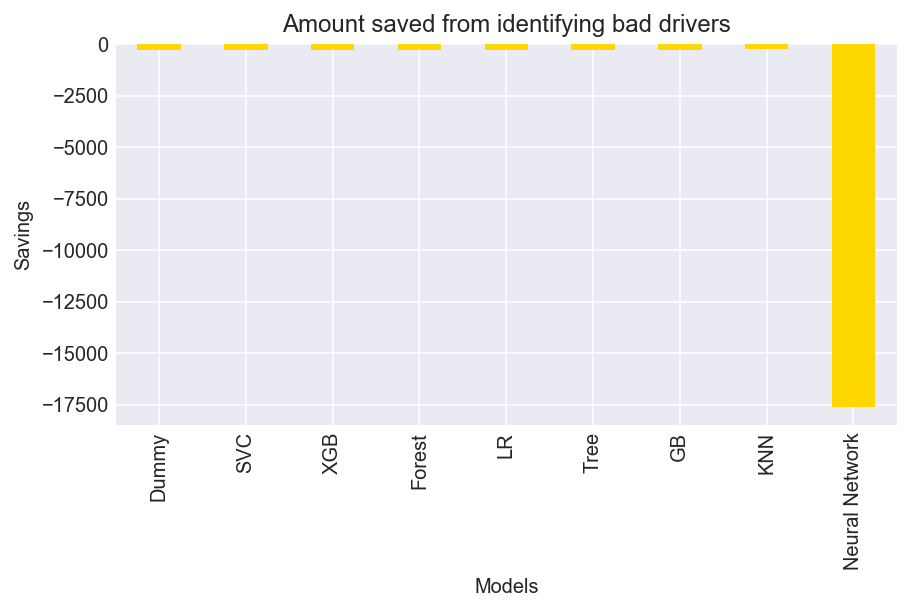

In [85]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,3.5))
ax = df.plot(kind='bar',color='gold',legend=False, ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Savings')
ax.set_title('Amount saved from identifying bad drivers')
None

### The tradeoff we make when going non-linear is increased complexity and overfitting. 
---

### The KNN Classifier seems promising. Are certain drivers similar to others?

# Take 3: What does driver behavior immediately preceeding accidents, reveal?

## Event Study of Accidents

In [86]:
# Entire History
new_query_string = '''WITH trip_events AS (SELECT REPLACE(tid, rtrim(tid, REPLACE(tid, '-', '' ) ), '')  AS device_id, 
                ts AS event_date, what, score, speed FROM events),
                accidents_trim AS (SELECT `Device ID` AS deviceid, `Incident Date` AS incident_date
                FROM accidents WHERE deviceid IS NOT NULL AND `index` NOT IN (46,47))
                SELECT * FROM trip_events JOIN accidents_trim ON trip_events.device_id = accidents_trim.deviceid
                ORDER BY device_id, event_date'''

In [87]:
# Connect to the existing fleetriskdb
con = sqlite3.connect('../DB/fleetriskdb.sqlite')
# Confirm data is being returned from this query
event_window_df = pd.read_sql_query(new_query_string, con)
# Verify that result of SQL query is stored in the dataframe
event_window_df.tail()

device_id           event_date     what  score  speed  \
1121673  dan359006054693688  2016-07-03 22:06:09    Start    NaN    NaN   
1121674  dan359006054693688  2016-07-03 22:12:32      End    NaN    NaN   
1121675  dan359006054693688  2016-07-05 22:32:34    Start    NaN    NaN   
1121676  dan359006054693688  2016-07-05 22:34:42  Braking   94.0   40.0   
1121677  dan359006054693688  2016-07-05 22:36:46      End    NaN    NaN   

                   deviceid        incident_date  
1121673  dan359006054693688  2016-04-27 00:00:00  
1121674  dan359006054693688  2016-04-27 00:00:00  
1121675  dan359006054693688  2016-04-27 00:00:00  
1121676  dan359006054693688  2016-04-27 00:00:00  
1121677  dan359006054693688  2016-04-27 00:00:00

In [88]:
# Close connection to the database
con.close()

In [89]:
accident_devices = event_window_df.copy().drop('deviceid', axis=1)
# Convert to DateTime
accident_devices['event_date'] = pd.to_datetime(accident_devices['event_date'])
accident_devices['incident_date'] = pd.to_datetime(accident_devices['incident_date'])
# Set Index
accident_devices = accident_devices.set_index('event_date')
# Resample Daily
accident_devices_daily = accident_devices.groupby(['device_id','incident_date']).apply(lambda x: x.resample('D').mean().ffill()).reset_index()
#accident_devices_daily.set_index('event_date', inplace=True)
accident_devices_daily.tail(10)

device_id incident_date event_date      score      speed
17818  dan359006054693688    2016-04-27 2016-06-26  42.076923  33.230769
17819  dan359006054693688    2016-04-27 2016-06-27  42.076923  33.230769
17820  dan359006054693688    2016-04-27 2016-06-28  42.076923  33.230769
17821  dan359006054693688    2016-04-27 2016-06-29  48.230769  39.230769
17822  dan359006054693688    2016-04-27 2016-06-30  51.714286  37.714286
17823  dan359006054693688    2016-04-27 2016-07-01  40.625000  31.000000
17824  dan359006054693688    2016-04-27 2016-07-02  47.000000  37.500000
17825  dan359006054693688    2016-04-27 2016-07-03  51.750000  43.875000
17826  dan359006054693688    2016-04-27 2016-07-04  51.750000  43.875000
17827  dan359006054693688    2016-04-27 2016-07-05  94.000000  40.000000

In [90]:
accident_devices_daily['datediff'] = (accident_devices_daily.event_date - accident_devices_daily.incident_date).dt.days
# 1 Week Window for all drivers around their accrident date
accident_window = accident_devices_daily.copy()
accident_window = accident_window[(accident_window.datediff >= -7)&(accident_window.datediff <= 7)]
accident_window.tail()

device_id incident_date event_date      score  speed  datediff
17761  dan359006054693688    2016-04-27 2016-04-30  46.833333   44.0         3
17762  dan359006054693688    2016-04-27 2016-05-01  46.833333   44.0         4
17763  dan359006054693688    2016-04-27 2016-05-02  46.833333   44.0         5
17764  dan359006054693688    2016-04-27 2016-05-03  46.833333   44.0         6
17765  dan359006054693688    2016-04-27 2016-05-04  46.833333   44.0         7

In [91]:
# How many drivers do we have accident data for?
accident_window.device_id.nunique()

79

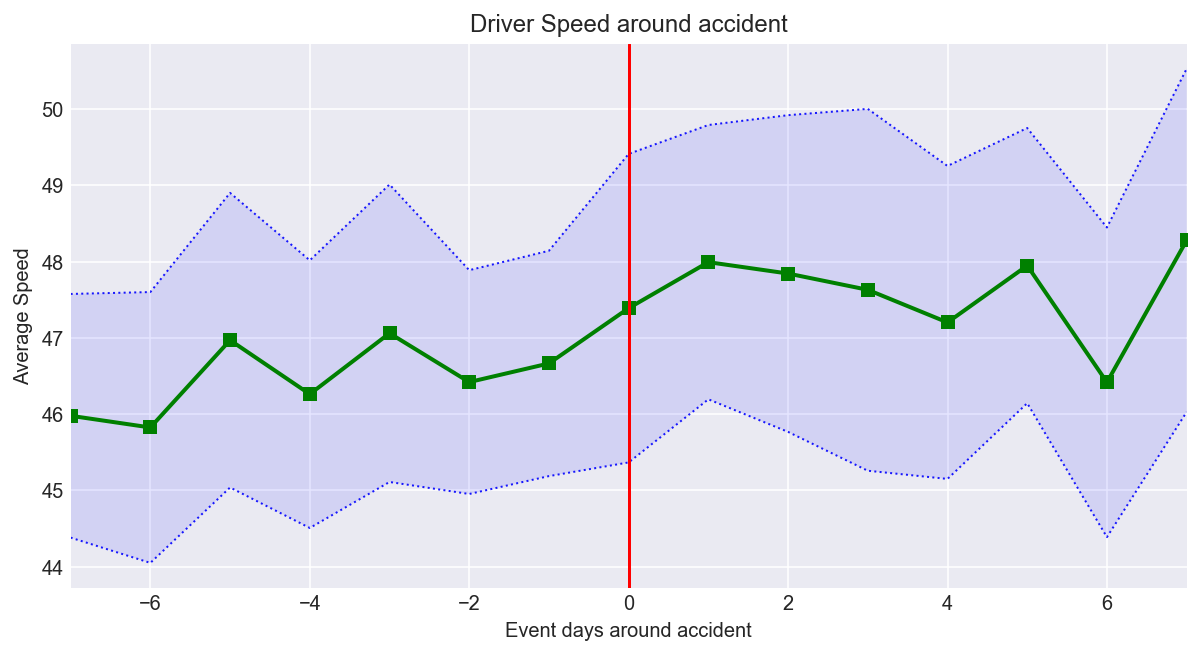

In [92]:
# Group by Date Diff to see how the average score changes across all drivers
fig, axes = plt.subplots(figsize=(10,5))

# Compute the mean, multiply by 100 to have in %
mean = accident_window.groupby('datediff')['speed'].mean()
# Compute the standard error around the mean
se = (accident_window.groupby('datediff')['speed'].std()
      / np.sqrt(accident_window.groupby('datediff')['speed'].count()))

# We'll use 95\% confidence intervals, so +/- 1.96 * se
mean_p = mean + 1.96 * se
mean_m = mean - 1.96 * se

mean.plot(ax=axes, linestyle='-', linewidth=2, marker='s',
          color='green', alpha=1.0)
mean_m.plot(ax=axes, linestyle=':', linewidth=1, marker=None,
          color='blue', alpha=0.9)
mean_p.plot(ax=axes, linestyle=':', linewidth=1, marker=None,
          color='blue', alpha=0.9)
axes.fill_between(mean_m.index, mean_m, mean_p, facecolor='blue', alpha=0.1)

#ax = accident_window.groupby('datediff')['speed'].mean().plot(ax=ax)
axes.axvline(x=0, color='red')
axes.set_title('Driver Speed around accident')
axes.set_xlabel('Event days around accident')
axes.set_ylabel('Average Speed')

None

In [93]:
# Compute the mean, multiply by 100 to have in %
mean = accident_window.groupby('datediff')['speed'].mean() * 100
# Compute the standard error around the mean
se = (accident_window.groupby('datediff')['speed'].std()
      / np.sqrt(accident_window.groupby('datediff')['speed'].count())) * 100
# We'll use 95\% confidence intervals, so +/- 1.96 * se
mean_p = mean + 1.96 * se
mean_m = mean - 1.96 * se

## Take 4: Can we cluster drivers on features to identify good and bad drivers?

In [94]:
query_string = 'WITH accident_devices AS (SELECT DISTINCT `Device Id` FROM accidents WHERE `Device Id` NOT NULL \
                AND `index` NOT IN (46,47)), driver_goodness AS (SELECT DISTINCT username, user_device IN \
                  (SELECT * FROM accident_devices) AS bad_driver FROM uservehicles) \
                SELECT * FROM driver_goodness a JOIN cognitive b ON a.username = b.`From Merc Upload Splend ID`'

In [95]:
# Connect to the existing fleetriskdb
con = sqlite3.connect('../DB/fleetriskdb.sqlite')
# Confirm data is being returned from this query
bad_driver_df = pd.read_sql_query(query_string, con)
# Close connection to the database
con.close()

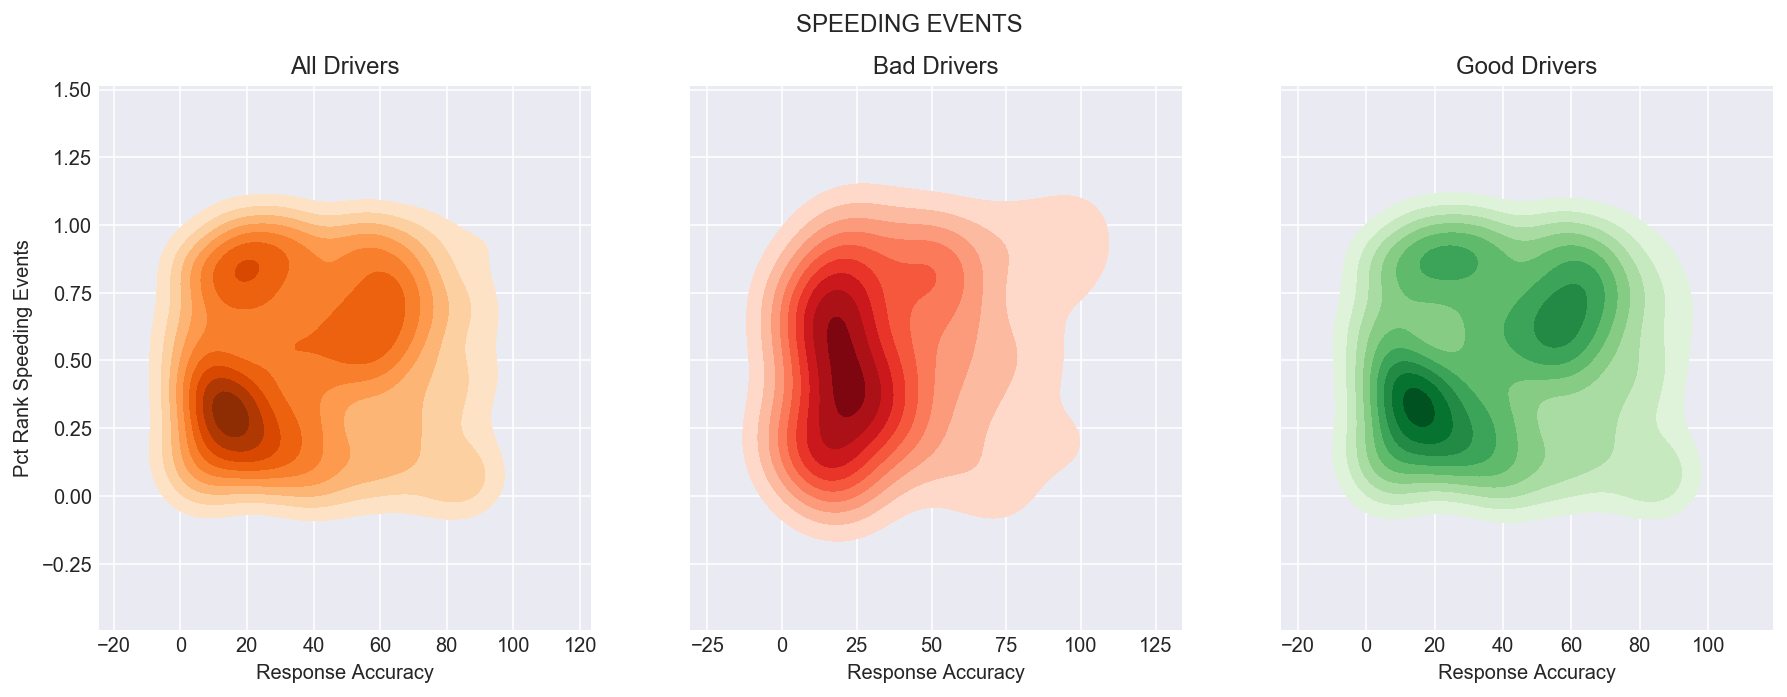

In [96]:
# Correlation between speeding events and reaction time for all 394 drivers
speeding_matrix = bad_driver_df[['bad_driver','Processing Speed', 'Response Accuracy', 'Sum of speed_events_total',
            'Sum of speed_events_excessive', 'Sum of speed_events_caution','Sum of speed_events_moderate']].dropna()
bad_drivers = speeding_matrix.loc[speeding_matrix['bad_driver'] == 1].dropna()
good_drivers = speeding_matrix.loc[speeding_matrix['bad_driver'] == 0].dropna()

(fig, ax) = plt.subplots(1,3, figsize=(15, 5), sharey=True)

fig.suptitle('SPEEDING EVENTS', x=0.5, y=0.98, fontsize=12)

ax[0] = sns.kdeplot(speeding_matrix['Response Accuracy'], speeding_matrix['Sum of speed_events_total'].rank(pct=True), 
            cmap="Oranges", shade=True, shade_lowest=False, ax=ax[0])
ax[1] = sns.kdeplot(bad_drivers['Response Accuracy'], bad_drivers['Sum of speed_events_total'].rank(pct=True), 
            cmap="Reds", shade=True, shade_lowest=False, ax=ax[1])
ax[2] = sns.kdeplot(good_drivers['Response Accuracy'], good_drivers['Sum of speed_events_total'].rank(pct=True), 
            cmap="Greens", shade=True, shade_lowest=False, ax=ax[2])
# Set Titles
ax[0].set_title('All Drivers')
ax[0].set(ylabel='Pct Rank Speeding Events')
ax[1].set_title('Bad Drivers')
ax[1].set(ylabel='')
ax[2].set_title('Good Drivers')
ax[2].set(ylabel='')
None

/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


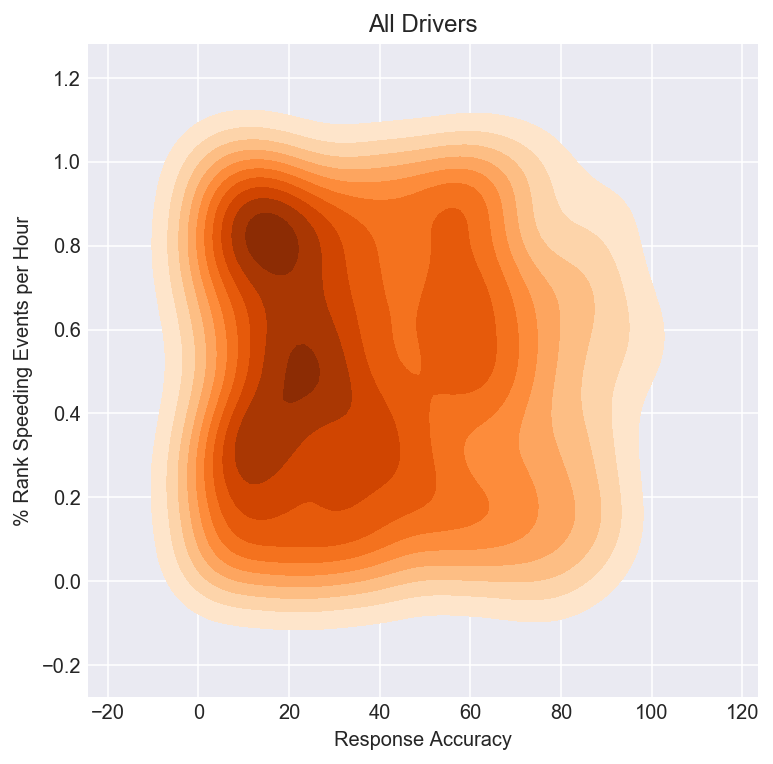

In [97]:
# Correlation between speeding events and reaction time for all 394 drivers
speeding_matrix = bad_driver_df[['bad_driver','Sum of driving_time','Processing Speed', 'Response Accuracy', 'Sum of speed_events_total',
            'Sum of speed_events_excessive', 'Sum of speed_events_caution','Sum of speed_events_moderate', 'Sum of trips']].dropna()

speeding_matrix2 = speeding_matrix[['bad_driver','Response Accuracy', 'Sum of speed_events_total','Sum of trips','Sum of driving_time']]
speeding_matrix2['Sum of driving_time'] = speeding_matrix2['Sum of speed_events_total']/speeding_matrix2['Sum of driving_time']

bad_drivers = speeding_matrix2.loc[speeding_matrix2['bad_driver'] == 1].dropna()
good_drivers = speeding_matrix2.loc[speeding_matrix2['bad_driver'] == 0].dropna()

(fig, ax) = plt.subplots(figsize=(6,6),sharey=True)

#fig.suptitle('SPEEDING EVENTS', x=0.5, y=0.98, fontsize=12)

ax = sns.kdeplot(speeding_matrix2['Response Accuracy'], 
                 (speeding_matrix2['Sum of driving_time']).rank(pct=True)
                 , 
            cmap="Oranges", shade=True, shade_lowest=False, ax=ax)
# Set Titles
ax.set_title('All Drivers')
ax.set(ylabel='% Rank Speeding Events per Hour')
None

## K-Means Clustering on Response Accuracy and Total Speeding Events
---

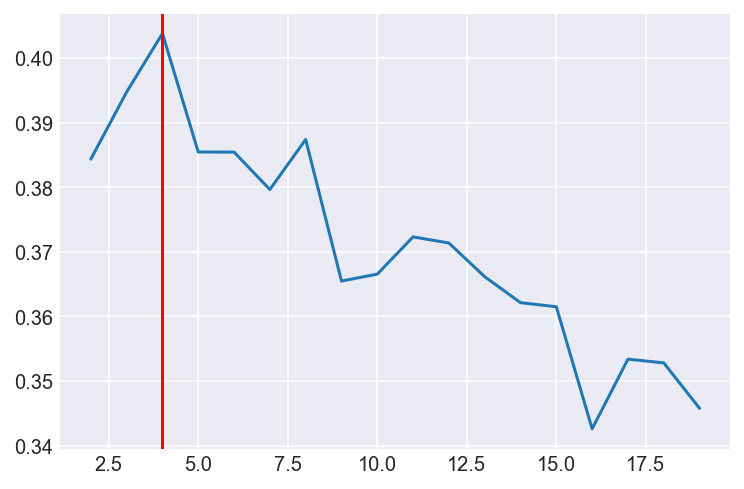

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_df = speeding_matrix2[['Response Accuracy','Sum of driving_time']].fillna(0)
# Convert Sum of Speeding Events into a Percentile Rank
cluster_df['Sum of driving_time'] = cluster_df['Sum of driving_time'].rank(pct=True)*100

scores = []
# Use the Silhouette score to determine the optimal number of clusters
for i in range(2,20,1):
    km = KMeans(n_clusters=i)
    clusters = km.fit_predict(cluster_df)
    score = silhouette_score(cluster_df, clusters)
    scores.append(score)

plt.plot(range(2,20), scores)
plt.axvline(x=4, c='red')
None

In [99]:
speeding_matrix2.describe()

bad_driver  Response Accuracy  Sum of speed_events_total  Sum of trips  \
count  377.000000         377.000000                 377.000000    377.000000   
mean     0.135279          38.864721                2229.432361    849.493369   
std      0.342475          25.145328                1872.408185    629.455397   
min      0.000000           0.000000                   0.000000      1.000000   
25%      0.000000          18.000000                 788.000000    306.000000   
50%      0.000000          36.000000                1730.000000    729.000000   
75%      0.000000          58.000000                3248.000000   1290.000000   
max      1.000000          99.000000                8560.000000   2987.000000   

       Sum of driving_time  
count           377.000000  
mean              0.001129  
std               0.000671  
min               0.000000  
25%               0.000672  
50%               0.000968  
75%               0.001462  
max               0.005427

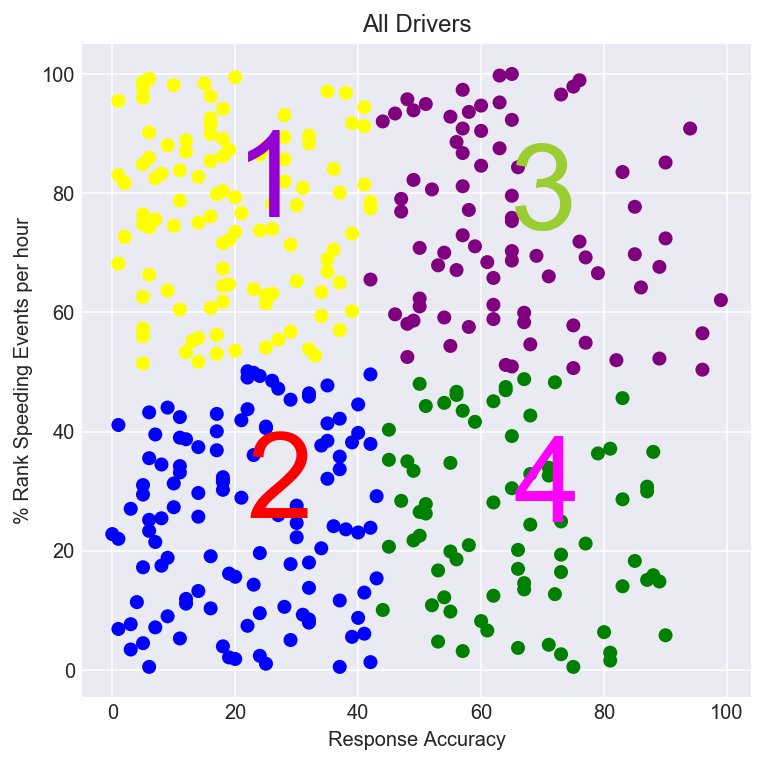

In [103]:
# Move on to 4 Clusters
nc = 4
km4 = KMeans(n_clusters=nc)
# Where Sum of Speed Events are NaN replace with Zero
cluster_df = speeding_matrix2[['Response Accuracy','Sum of driving_time']].fillna(0)
# To make sure speed events and response accuracy are on the same (percentile) scale
cluster_df['Sum of driving_time'] = cluster_df['Sum of driving_time'].rank(pct=True)*100
km_four_clusters = km4.fit_predict(cluster_df)


speeding_cluster_matrix['cluster'] = km_four_clusters+1
clusters = list(speeding_cluster_matrix.groupby('cluster')['bad_driver'].mean().sort_values(ascending=False).index)
speeding_cluster_matrix['cluster'] = speeding_cluster_matrix.cluster.map(lambda x : clusters.index(x)+1)

# This is slightly better since it now identifies the 3 clusters of interest plus a fourth:
# Drivers with low response accuracy who do not speed.

color_list = ['yellow','blue','purple','green']

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(cluster_df['Response Accuracy'], cluster_df['Sum of driving_time'], 
           c=[color_list[i-1] for i in speeding_cluster_matrix['cluster']], cmap=plt.cm.magma)
ax.set_title('All Drivers')
ax.set_xlabel('Response Accuracy')
ax.set_ylabel('% Rank Speeding Events per hour')


cluster_color = ['darkviolet','red', 'yellowgreen','magenta']

# Annotate Diagram
for i in range(nc):
    x = km4.cluster_centers_[i,0]
    y = km4.cluster_centers_[i,1]
    ax.annotate(clusters.index(i+1)+1, ((x,y)), fontsize=60, color=cluster_color[clusters.index(i+1)])

None

In [102]:
speeding_cluster_matrix = speeding_matrix2.copy()
speeding_cluster_matrix['cluster'] = km_four_clusters+1
clusters = list(speeding_cluster_matrix.groupby('cluster')['bad_driver'].mean().sort_values(ascending=False).index)
clusters.index(0+1)+1

1

In [104]:
#speeding_cluster_matrix = speeding_matrix.copy()
#speeding_cluster_matrix['cluster'] = km_four_clusters+1
speeding_cluster_matrix.groupby('cluster')['bad_driver'].mean()

cluster
1    0.166667
2    0.139130
3    0.125000
4    0.094595
Name: bad_driver, dtype: float64

# Map number of accidents by cluster

KeyError: 'Sum of speed_events_total'

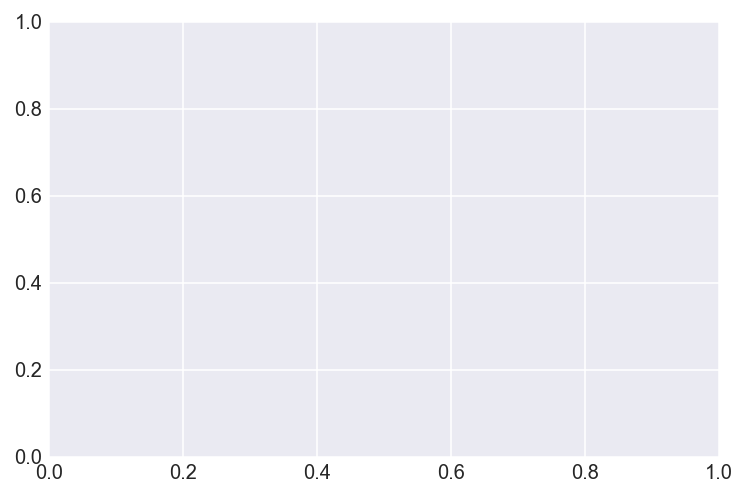

In [105]:
cluster_df_bad_drivers = cluster_df[speeding_matrix.bad_driver == 1]
cluster_df_good_drivers = cluster_df[speeding_matrix.bad_driver == 0]

fig,ax = plt.subplots()
# Bad Drivers are marked with a '+'
ax.scatter(cluster_df_bad_drivers['Response Accuracy'], cluster_df_bad_drivers['Sum of speed_events_total'], 
            c=km_four_clusters[speeding_matrix.bad_driver == 1], cmap=plt.cm.Paired, marker='+')

# Good Drivers are marked with a 'o'
ax.scatter(cluster_df_good_drivers['Response Accuracy'], cluster_df_good_drivers['Sum of speed_events_total'], 
            c=km_four_clusters[speeding_matrix.bad_driver == 0], cmap=plt.cm.Paired, marker='o', s=1)

for i in range(4):
    x = km4.cluster_centers_[i,0]
    y = km4.cluster_centers_[i,1]
    ax.annotate(i+1, ((x,y)), fontsize=45, color='orange')

None

In [106]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

cluster_df = speeding_matrix2[['bad_driver','Response Accuracy','Speed events per trip']].fillna(0)
cluster_df['Speed events per trip'] = cluster_df['Speed events per trip'].rank(pct=True)*100

trace1 = go.Scatter3d(
    x=cluster_df['Response Accuracy'],
    y=cluster_df['Speed events per trip'],
    z=cluster_df['bad_driver'],
    mode='markers',
    marker=dict(
        size=6,
        color=km_four_clusters, # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.7
    )
)

data = [trace1]
layout = go.Layout(
        scene=dict(
                    xaxis = dict(titlefont=dict(family='Times, New Roman',size=16,color='darkgrey'),
                        title='Response', nticks=5),
                    yaxis = dict(titlefont=dict(family='Times, New Roman',size=16,color='darkgrey'),
                        title='Speeding', nticks=5),
                    zaxis = dict(titlefont=dict(family='Times, New Roman',size=16,color='darkgrey'),
                        title='Accidents',nticks=2)),    
    margin=dict(
        l=5,r=5,
        b=5, t=5
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

KeyError: "['Speed events per trip'] not in index"

## Average number of accidents in each cluster
---

In [ ]:
.15/.06

 - **By slowing down, the number of accidents in low response accuracy drivers decreases by 1/2**
 - **By slowing down, the number of accidents by high response accuracy drivers decreases by 1/3**
 ---

In [ ]:
# Set up feature matrix and dependent variable
bad_drivers_beta = bad_driver_df.copy()
# Filter down to rows of interest
bad_drivers_beta.drop(['index','Cognisess ID','Unique Code','From Merc Upload Splend ID',
                        'Vehicle Rego','Claims Exist (Claims Data tab)'],
                      axis=1,inplace=True)
# Drop NaNs
bad_drivers_beta.dropna(inplace=True)
# Add Driver Cluster Numbers
bad_drivers_beta['cluster'] = km_four_clusters+1
bad_drivers_beta.drop('Average of bd_score', axis=1, inplace=True)
bad_drivers_beta.head()

In [ ]:
## How many people in each cluster have accidents?

In [ ]:
bad_drivers_beta_cluster1 = bad_drivers_beta[bad_drivers_beta.cluster == 1]
bad_drivers_beta_cluster2 = bad_drivers_beta[bad_drivers_beta.cluster == 2]
bad_drivers_beta_cluster3 = bad_drivers_beta[bad_drivers_beta.cluster == 3]
bad_drivers_beta_cluster4 = bad_drivers_beta[bad_drivers_beta.cluster == 4]

bad_drivers_beta_cluster1.tail()

In [ ]:
# Number of hours driven by Drivers in Cluster 1
bad_drivers_beta_cluster1['Sum of driving_time'].sum()

In [ ]:
bad_drivers_beta_cluster1.groupby('bad_driver')['bad_driver'].count()
# 21 people in cluster 1 have accidents while #75 people do not.

In [ ]:
# Number of accidents per hours driven
21./327650433

In [ ]:
bad_drivers_beta_cluster1.groupby('bad_driver')['Sum of km_driven'].sum()

In [ ]:
# Accidents per million km
import math
print 'Cluster 1'
print 'Number of accidents: ', math.ceil(21/(2510649.7120000003/1000000))
print 'Number of non-accidents: ', math.ceil(75/(2510649.7120000003/1000000))

In [ ]:
# For every 1 million km driven, 9 drivers in Cluster 1 had accidents
import scipy
from scipy.stats import beta
accident_data = beta(9+1, 30+1)
xs = np.arange(0,1,0.01)
probability_of_that_value = pd.Series(data=[accident_data.pdf(x) for x in xs], index = xs)

plt.plot(probability_of_that_value)
plt.axvline(accident_data.ppf(0.05), c='green', linestyle='dashed')
plt.axvline(accident_data.ppf(0.95), c='green', linestyle='dashed')

nudge = 0.01

plt.annotate(xy=(accident_data.ppf(0.05)+nudge, 0), s='5% chance')
plt.annotate(xy=(accident_data.ppf(0.95)+nudge, 3), s='95% chance')
plt.axvline(0.218750, c='red', linestyle='dashed')
None

In [ ]:
bad_drivers_beta_cluster2.groupby('bad_driver')['bad_driver'].count()
# 4 people in cluster 1 have accidents

In [ ]:
bad_drivers_beta_cluster2.groupby('bad_driver')['Sum of km_driven'].sum().sum()

In [ ]:
print 'Cluster 2'
print 'Number of accidents: ', math.ceil(4/(476461.81199999986/1000000))
print 'Number of non-accidents: ', math.ceil(59/(476461.81199999986/1000000))

In [ ]:
# For every 1 million km driven, 9 drivers in Cluster 2 had accidents
import scipy
from scipy.stats import beta
accident_data = beta(9+1, 124+1)
xs = np.arange(0,1,0.01)
probability_of_that_value = pd.Series(data=[accident_data.pdf(x) for x in xs], index = xs)

plt.plot(probability_of_that_value)
plt.axvline(accident_data.ppf(0.05), c='green', linestyle='dashed')
plt.axvline(accident_data.ppf(0.95), c='green', linestyle='dashed')

nudge = 0.01

plt.annotate(xy=(accident_data.ppf(0.05)+nudge, 0), s='5% chance')
plt.annotate(xy=(accident_data.ppf(0.95)+nudge, 3), s='95% chance')
plt.axvline(0.148936, c='red', linestyle='dashed')

None

In [ ]:
bad_drivers_beta_cluster3.groupby('bad_driver')['bad_driver'].count()
# 14 people in cluster 3 have accidents

In [ ]:
bad_drivers_beta_cluster3.groupby('bad_driver')['Sum of km_driven'].sum().sum()

In [ ]:
print 'Cluster 3'
print 'Number of accidents: ', math.ceil(14/(2209285.9899999993/1000000))
print 'Number of non-accidents: ', math.ceil(80/(2209285.9899999993/1000000))

In [ ]:
# For every 1 million km driven, 7 drivers in Cluster 3 had accidents
import scipy
from scipy.stats import beta
accident_data = beta(7+1, 37+1)
xs = np.arange(0,1,0.01)
probability_of_that_value = pd.Series(data=[accident_data.pdf(x) for x in xs], index = xs)

plt.plot(probability_of_that_value)
plt.axvline(accident_data.ppf(0.05), c='green', linestyle='dashed')
plt.axvline(accident_data.ppf(0.95), c='green', linestyle='dashed')

nudge = 0.01

plt.annotate(xy=(accident_data.ppf(0.05)+nudge, 0), s='5% chance')
plt.annotate(xy=(accident_data.ppf(0.95)+nudge, 3), s='95% chance')
plt.axvline(0.096774, c='red', linestyle='dashed')

None

In [ ]:
bad_drivers_beta_cluster4.groupby('bad_driver')['bad_driver'].count()
# 12 people in cluster 4 have accidents

In [ ]:
bad_drivers_beta_cluster4.groupby('bad_driver')['Sum of km_driven'].sum().sum()

In [ ]:
print 'Cluster 3'
print 'Number of accidents: ', math.ceil(12/(1004868.1919999999/1000000))
print 'Number of non-accidents: ', math.ceil(112/(1004868.1919999999/1000000))

In [ ]:
# For every 1 million km driven, 12 drivers in Cluster 4 had accidents
import scipy
from scipy.stats import beta
accident_data = beta(12+1, 112+1)
xs = np.arange(0,1,0.01)
probability_of_that_value = pd.Series(data=[accident_data.pdf(x) for x in xs], index = xs)

plt.plot(probability_of_that_value)
plt.axvline(accident_data.ppf(0.05), c='green', linestyle='dashed')
plt.axvline(accident_data.ppf(0.95), c='green', linestyle='dashed')

nudge = 0.01

plt.annotate(xy=(accident_data.ppf(0.05)+nudge, 0), s='5% chance')
plt.annotate(xy=(accident_data.ppf(0.95)+nudge, 3), s='95% chance')
plt.axvline(0.063492, c='red', linestyle='dashed')

None

## Using Cluster Number as a feature in the Dummy Classifier

In [107]:
# Set up feature matrix and dependent variable
bad_drivers_matrix = bad_driver_df.copy()
# Filter down to rows of interest
bad_drivers_matrix = bad_drivers_matrix.loc[:,'username':'Average of bd_score']
bad_drivers_matrix.drop(['index','Cognisess ID','From Merc Upload Splend ID',
                        'From Merc Upload Danlaw ID','Claims Exist (Claims Data tab)'],axis=1,inplace=True)
# Drop NaNs
bad_drivers_matrix.dropna(inplace=True)
# Add Driver Cluster Numbers
bad_drivers_matrix['response_cluster'] = km_four_clusters+1
bad_drivers_matrix.drop('Average of bd_score', axis=1, inplace=True)
bad_drivers_matrix.head()

username  bad_driver         Unique Code Vehicle Rego  Divided Attention  \
0  splend101           0  dan354235056684594       911WDX                  1   
1  splend102           0  dan354235056681665       DBL66Y                 37   
2  splend103           0  dan354235056685757       1GX1TA                  4   
3  splend104           0  dan354235056685708       DBD90H                 65   
4  splend105           0  dan354235056672268       DBD90J                 55   

   Focus and Concentration  Inhibition  Processing Speed  Response Accuracy  \
0                       53          50                 9                 14   
1                       45          88                95                 90   
2                       78          44                69                 30   
3                       74          92                94                 42   
4                       18           3                62                 14   

   Short-term Memory  Spatial Memory  Spatial Orientation  Visual Perception  \
0                 70              55                   85                  2   
1                 74              74                   67                 67   
2                 80              33                   92                 11   
3                 78              62                   67                 87   
4                 44               1                    1                  1   

   Visual Search  Working Memory  Overall Emotion  Positive Emotions  \
0             67              59               32                 27   
1             31              78               70                 81   
2             33              99               61                 54   
3             40              22               56                 72   
4             33              16               38                 36   

   Negative Emotions  Neutral Emotions  Facial Recognition  Vocal Recognition  \
0                 25               100                  40               20.0   
1                 50               100                  70               70.0   
2                 62               100                  90               30.0   
3                 25               100                  50               60.0   
4                 50                 0                  60               20.0   

   Agreeableness  Conscientiousness  Emotional Stability  Extraversion  \
0              5                  4                    5             6   
1              5                  5                    7             6   
2              5                  6                    7             8   
3              6                  5                    3             5   
4              4                  7                    5             4   

   Openness  Resilience  response_cluster  
0         4           2                 1  
1         5           5                 3  
2         9           8                 2  
3         5           4                 1  
4         4           3                 2

In [109]:
from sklearn.dummy import DummyClassifier
X = bad_drivers_matrix.iloc[:,4:]
y = bad_drivers_matrix['bad_driver']
kfold = KFold(n_splits = 5, random_state=123)
clf2 = DummyClassifier(strategy='most_frequent', random_state=123)
dummy_classifier2 = cross_val_score(clf2, X, y, cv=kfold, scoring=dollar_scorer_per_driver)
print dummy_classifier2.mean()

-297.038596491


We've started doing better on the Dummy Classifier already...

## Use Cluster Number as feature in Logistic Classification Model
---

Create a matrix of drivers which includes the driver clusters

In [110]:
from sklearn.model_selection import GridSearchCV
X = bad_drivers_matrix.iloc[:,4:]
y = bad_drivers_matrix['bad_driver']
# Hypertuning Parameters with 5 fold CV
lr_gridsearch = GridSearchCV(LogisticRegression(), 
                             param_grid={'penalty' : ['l1','l2'],
                                        'C' : [0.004, 0.005, 0.1, 0.2]},
                            cv=5, n_jobs=-1, verbose=1, scoring=dollar_scorer_per_driver)
lr_gridsearch.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.004, 0.005, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score_per_driver, greater_is_better=False),
       verbose=1)

In [111]:
lr_gridsearch.best_params_

{'C': 0.004, 'penalty': 'l2'}

In [112]:
lr_gridsearch.best_score_

-291.84350132625997

In [113]:
# 5 fold cross validation
kfold = KFold(n_splits = 5, random_state=123)
lr2 = LogisticRegression(C=0.004, penalty='l2')

lr_results2 = cross_val_score(lr2, X, y, cv=5, scoring=dollar_scorer)
print lr_results2.mean()

-22005.0


## Using Cluster Number as a feature in Support Vector Classifier

In [114]:
from sklearn.svm import SVC

# Define dataset
X = bad_drivers_matrix.iloc[:,4:]
y = bad_drivers_matrix['bad_driver']

Cs = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1, 1]
params = {'C': Cs, 'gamma' : gammas, 'kernel':('linear', 'rbf')}
# Not sure why this line isn't working here...
#kfold = KFold(n_splits=5, random_state=123)

grid_search_svc = GridSearchCV(SVC(), param_grid=params, cv=5, scoring=dollar_scorer_per_driver, verbose=1, n_jobs=-1)
grid_search_svc.fit(X, y)
grid_search_svc.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    5.9s finished


{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}

In [115]:
from sklearn.svm import SVC
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
# Support Vector Machine container
model = SVC(C=0.001, gamma=0.001, kernel='linear')
svc_results = cross_val_score(model, X, y, cv=kfold, scoring=dollar_scorer_per_driver) 
print svc_results.mean()

-297.038596491


## Using Cluster Number as a feature in Decision Tree Classifier

In [116]:
from sklearn.tree import DecisionTreeClassifier
# Hypertuning Parameters with 5 fold CV
X = bad_drivers_matrix.iloc[:,4:]
y = bad_drivers_matrix['bad_driver']
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid = {'max_depth': [1,2,3,4,5], 
                                  'criterion': ['gini', 'entropy'],
                                 # Lets go for 1, 2, 3 min samples left
                                 'min_samples_leaf': [1,2,3],
                                  # Dont bother splitting unless you have < x elements
                                  'min_samples_split': [2,3,4,5,6]}, cv=5, scoring=dollar_scorer_per_driver)
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score_per_driver, greater_is_better=False),
       verbose=0)

In [117]:
grid.best_score_

-274.80106100795757

In [118]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [119]:
# 5 Fold Cross Validation with best parameters
kfold = KFold(n_splits=5, random_state=123)
cart = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=1, min_samples_split=5)
dt_results = cross_val_score(cart, X, y, cv=kfold, scoring=dollar_scorer_per_driver)
print dt_results.mean()

-262.812280702


In [120]:
X.head()

Divided Attention  Focus and Concentration  Inhibition  Processing Speed  \
0                  1                       53          50                 9   
1                 37                       45          88                95   
2                  4                       78          44                69   
3                 65                       74          92                94   
4                 55                       18           3                62   

   Response Accuracy  Short-term Memory  Spatial Memory  Spatial Orientation  \
0                 14                 70              55                   85   
1                 90                 74              74                   67   
2                 30                 80              33                   92   
3                 42                 78              62                   67   
4                 14                 44               1                    1   

   Visual Perception  Visual Search  Working Memory  Overall Emotion  \
0                  2             67              59               32   
1                 67             31              78               70   
2                 11             33              99               61   
3                 87             40              22               56   
4                  1             33              16               38   

   Positive Emotions  Negative Emotions  Neutral Emotions  Facial Recognition  \
0                 27                 25               100                  40   
1                 81                 50               100                  70   
2                 54                 62               100                  90   
3                 72                 25               100                  50   
4                 36                 50                 0                  60   

   Vocal Recognition  Agreeableness  Conscientiousness  Emotional Stability  \
0               20.0              5                  4                    5   
1               70.0              5                  5                    7   
2               30.0              5                  6                    7   
3               60.0              6                  5                    3   
4               20.0              4                  7                    5   

   Extraversion  Openness  Resilience  response_cluster  
0             6         4           2                 1  
1             6         5           5                 3  
2             8         9           8                 2  
3             5         5           4                 1  
4             4         4           3                 2

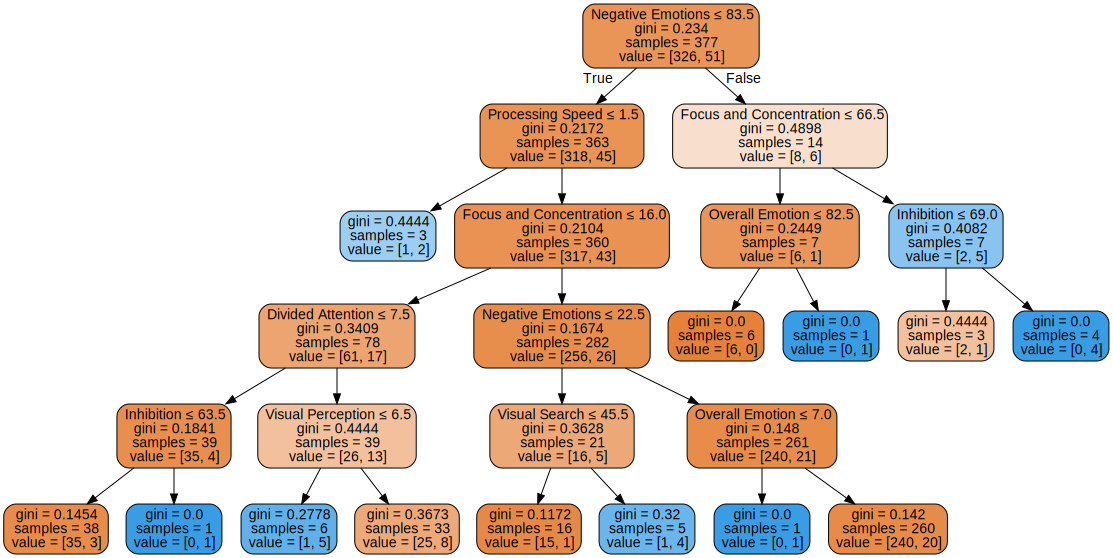

In [121]:
# Visualize this tree
import sklearn.tree
import graphviz
%matplotlib inline
X = bad_drivers_matrix.iloc[:,4:].drop('Response Accuracy', axis=1)
y = bad_drivers_matrix['bad_driver']
cart = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=1, min_samples_split=5)
cart.fit(X,y)
driver_data = sklearn.tree.export_graphviz(cart, out_file=None, 
                                        feature_names=X.columns,
                                       filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(driver_data)
graph

# Using Cluster Number as a feature in Random Forest Classifier
---

In [122]:
from sklearn.ensemble import RandomForestClassifier
X = bad_drivers_matrix.iloc[:,4:]
y = bad_drivers_matrix['bad_driver']

# Hypertuning parameters with 5 fold CV
forest_grid = GridSearchCV(RandomForestClassifier(), 
                      param_grid = {'max_depth': [1,2,3,4,5,6], 
                        'criterion': ['gini', 'entropy'],
                      'min_samples_leaf': [1,2,3,4,5,6],
                      'min_samples_split': [2,3,4,5,6]},cv=5,scoring=dollar_scorer)
forest_grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=0)

In [123]:
forest_grid.best_score_

-21574.005305039787

In [124]:
forest_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [125]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
rf2 = RandomForestClassifier(criterion='gini',max_depth=4, min_samples_leaf=1, min_samples_split=6)
rf2_results2 = cross_val_score(rf2, X, y, cv=kfold, scoring=dollar_scorer)
print rf2_results2.mean()

-21565.0


# Using Cluster Number as a feature in Gradient Boosting
---

In [126]:
from sklearn.ensemble import GradientBoostingClassifier


gb = GridSearchCV(GradientBoostingClassifier(),
                    param_grid = {'max_depth': [1,2,3,4,5,6], 
                                    'min_samples_leaf': [1,2,3],
                                  'min_samples_split': [2,3,4,5,6]},
                                cv=5, scoring=dollar_scorer)
gb.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=0)

In [127]:
gb.best_score_

-19853.315649867374

In [128]:
gb.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [129]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
cart = GradientBoostingClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=3)
gb_results2 = cross_val_score(gb, X, y, cv=kfold, scoring=dollar_scorer)
print gb_results2.mean()

-21165.0


## Using Cluster Number as a Feature in XGBoost Classifier
---

In [130]:
X = np.array(bad_drivers_matrix.iloc[:,4:])
y = bad_drivers_matrix['bad_driver'].values

param = {
 'n_estimators':[50,100,150,200,300,400],
 'max_depth':[2,3,4,5,6,7,8,9],
 'min_child_weight':[2,3,4,5],
 'colsample_bytree':[0.2,0.6,0.8]
}

xgb_grid = GridSearchCV(XGBClassifier(), 
                        param_grid = param, 
                        scoring=dollar_scorer, 
                        cv=5, verbose = 1, 
                        n_jobs=-1)
xgb_grid.fit(X, y)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   57.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200, 300, 400], 'colsample_bytree': [0.2, 0.6, 0.8], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_child_weight': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=1)

In [131]:
xgb_grid.best_score_

-21171.153846153848

In [132]:
xgb_grid.best_params_

{'colsample_bytree': 0.6,
 'max_depth': 8,
 'min_child_weight': 4,
 'n_estimators': 400}

In [133]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
xgb2 = XGBClassifier(colsample_bytree=0.8, max_depth=5, min_child_weight=2, n_estimators=400)
xgb_results2 = cross_val_score(xgb2, X, y, cv=kfold, scoring=dollar_scorer)
print xgb_results2.mean()

-21605.0


## Using Cluster Number as a feature in KNN Classifier

In [134]:
# Define dataset
X = bad_drivers_matrix.iloc[:,4:]
y = bad_drivers_matrix['bad_driver']

# Hyperparameter Tuning with 5 Fold CV
kfold = KFold(n_splits = 5, random_state=123)
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), 
                             param_grid={'n_neighbors': [2,3,4,5,6,7,8,9], 
                                         'metric': ['minkowski', 'euclidean', 'manhattan'], 
                                         'weights': ['uniform', 'distance']},
                            cv=5, n_jobs=-1, verbose=1, scoring=dollar_scorer_per_driver)
# Fit Model
knn_gridsearch.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score_per_driver, greater_is_better=False),
       verbose=1)

In [135]:
knn_gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

In [136]:
knn_gridsearch.best_score_

-235.80901856763927

In [137]:
# 5 fold cross validation
kfold = KFold(n_splits = 5, random_state=123)
model = KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
results = cross_val_score(model, X, y, cv=kfold, scoring=dollar_scorer_per_driver)
print results.mean()

-241.423684211


# Using Cluster Number as a feature in a Neural Network
---

In [138]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

X = np.array(bad_drivers_matrix.iloc[:,4:])
y = bad_drivers_matrix['bad_driver'].values

# Create a neural network function to pass it on to the Keras Classifier
def build_neural_network(hidden_units=5):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=24, kernel_initializer='random_normal', activation='relu'))
    model.add(Dense(1, input_dim=hidden_units, kernel_initializer='random_normal',activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
model = KerasClassifier(build_fn=build_neural_network, epochs=500, verbose=0)

# 5 Fold Cross Validation
results = cross_val_score(estimator=model,X=np.array(X),y=np.array(y), cv=5, scoring=dollar_scorer)
print results.mean()

-22515.0


In [139]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

X = np.array(bad_drivers_matrix.iloc[:,4:])
y = bad_drivers_matrix['bad_driver'].values

# Create a neural network function to pass it on to the Keras Classifier
def build_neural_network(hidden_units=10):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=24, kernel_initializer='random_normal',activation='relu'))
    model.add(Dense(1, input_dim=hidden_units, kernel_initializer='random_normal',activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
model = KerasClassifier(build_fn=build_neural_network, epochs=300, verbose=0)

# 5 Fold Cross Validation
results = cross_val_score(estimator=model,X=np.array(X_train),y=np.array(y_train), cv=5, scoring=dollar_scorer_per_driver)
print results.mean()

-296.356516291


In [140]:
X.shape

(377, 24)

In [141]:
X_train.shape

(282, 24)

## Summary 2: Model Performance with Clustering
---

In [142]:
X = bad_drivers_matrix.iloc[:,4:]
y = bad_drivers_matrix['bad_driver']
X.head()

Divided Attention  Focus and Concentration  Inhibition  Processing Speed  \
0                  1                       53          50                 9   
1                 37                       45          88                95   
2                  4                       78          44                69   
3                 65                       74          92                94   
4                 55                       18           3                62   

   Response Accuracy  Short-term Memory  Spatial Memory  Spatial Orientation  \
0                 14                 70              55                   85   
1                 90                 74              74                   67   
2                 30                 80              33                   92   
3                 42                 78              62                   67   
4                 14                 44               1                    1   

   Visual Perception  Visual Search  Working Memory  Overall Emotion  \
0                  2             67              59               32   
1                 67             31              78               70   
2                 11             33              99               61   
3                 87             40              22               56   
4                  1             33              16               38   

   Positive Emotions  Negative Emotions  Neutral Emotions  Facial Recognition  \
0                 27                 25               100                  40   
1                 81                 50               100                  70   
2                 54                 62               100                  90   
3                 72                 25               100                  50   
4                 36                 50                 0                  60   

   Vocal Recognition  Agreeableness  Conscientiousness  Emotional Stability  \
0               20.0              5                  4                    5   
1               70.0              5                  5                    7   
2               30.0              5                  6                    7   
3               60.0              6                  5                    3   
4               20.0              4                  7                    5   

   Extraversion  Openness  Resilience  response_cluster  
0             6         4           2                 1  
1             6         5           5                 3  
2             8         9           8                 2  
3             5         5           4                 1  
4             4         4           3                 2

In [143]:
models = []
models.append(( 'Dummy 2' , DummyClassifier(strategy='most_frequent', random_state=123)))
models.append(( 'LR 2' , LogisticRegression(C=0.004, penalty='l2')))
models.append(( 'SVC 2' , SVC(C=0.001, gamma=0.001, kernel='linear')))
models.append(( 'KNN 2' , KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')))
models.append(( 'Tree 2' , DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=1, min_samples_split=5)))
models.append(( 'Forest 2' , RandomForestClassifier(criterion='gini',max_depth=4, min_samples_leaf=1, min_samples_split=6)))
models.append(( 'GB 2' , GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=6)))
models.append(( 'XGB 2' , XGBClassifier(colsample_bytree=0.8, max_depth=5, min_child_weight=2, n_estimators=400)))
# Evaluate each model in turn
results = []
names = []
scoring = dollar_scorer_per_driver

In [144]:
for name, model in models:
    kfold = KFold(n_splits=5, random_state=123)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results.mean())
    names.append(name)
    msg = [name, cv_results.mean()]
    print msg                        

['Dummy 2', -297.03859649122808]
['LR 2', -291.1719298245614]
['SVC 2', -297.03859649122808]
['KNN 2', -241.42368421052635]
['Tree 2', -262.74561403508773]
['Forest 2', -297.10526315789474]
['GB 2', -291.84649122807019]
['XGB 2', -285.98157894736846]


In [145]:
df2 = pd.DataFrame({'Model':names, 'Score':results})
df2 = df2.tail(8)
df2 = df2.sort_values('Score')
df2 = df2.append({'Model':'Neural Network 2', 'Score':-16720}, ignore_index=True).set_index('Model')
df2

Score
Model                         
Forest 2           -297.105263
Dummy 2            -297.038596
SVC 2              -297.038596
GB 2               -291.846491
LR 2               -291.171930
XGB 2              -285.981579
Tree 2             -262.745614
KNN 2              -241.423684
Neural Network 2 -16720.000000

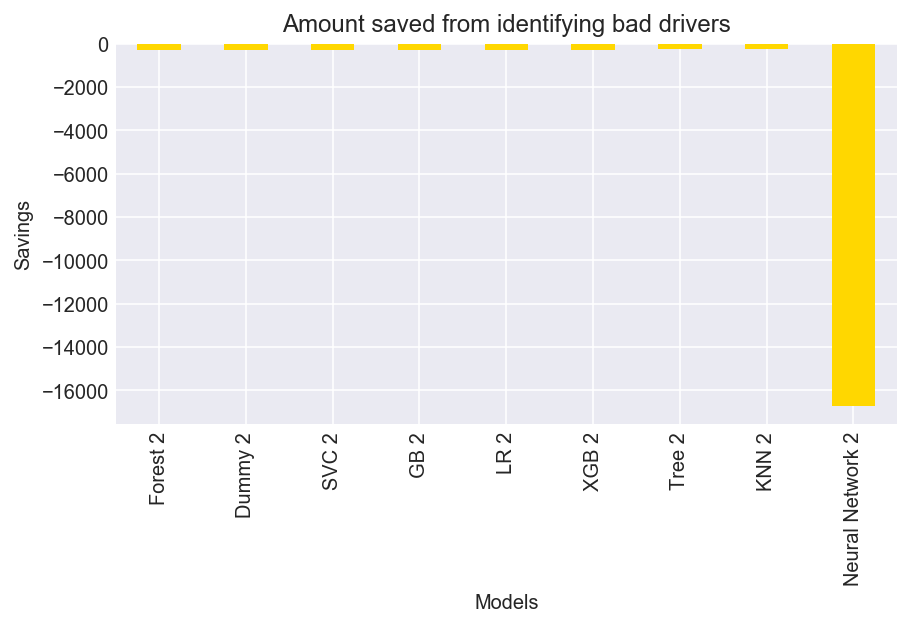

In [146]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,3.5))
ax = df2.plot(kind='bar',color='gold',legend=False, ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Savings')
ax.set_title('Amount saved from identifying bad drivers')
None

---
## By clustering on driver response accuracy and speeding events, we've reduced dollar cost for every single model.

# Appendix
---

## Better Driver Score versus Cognitive + Emotional + Personality

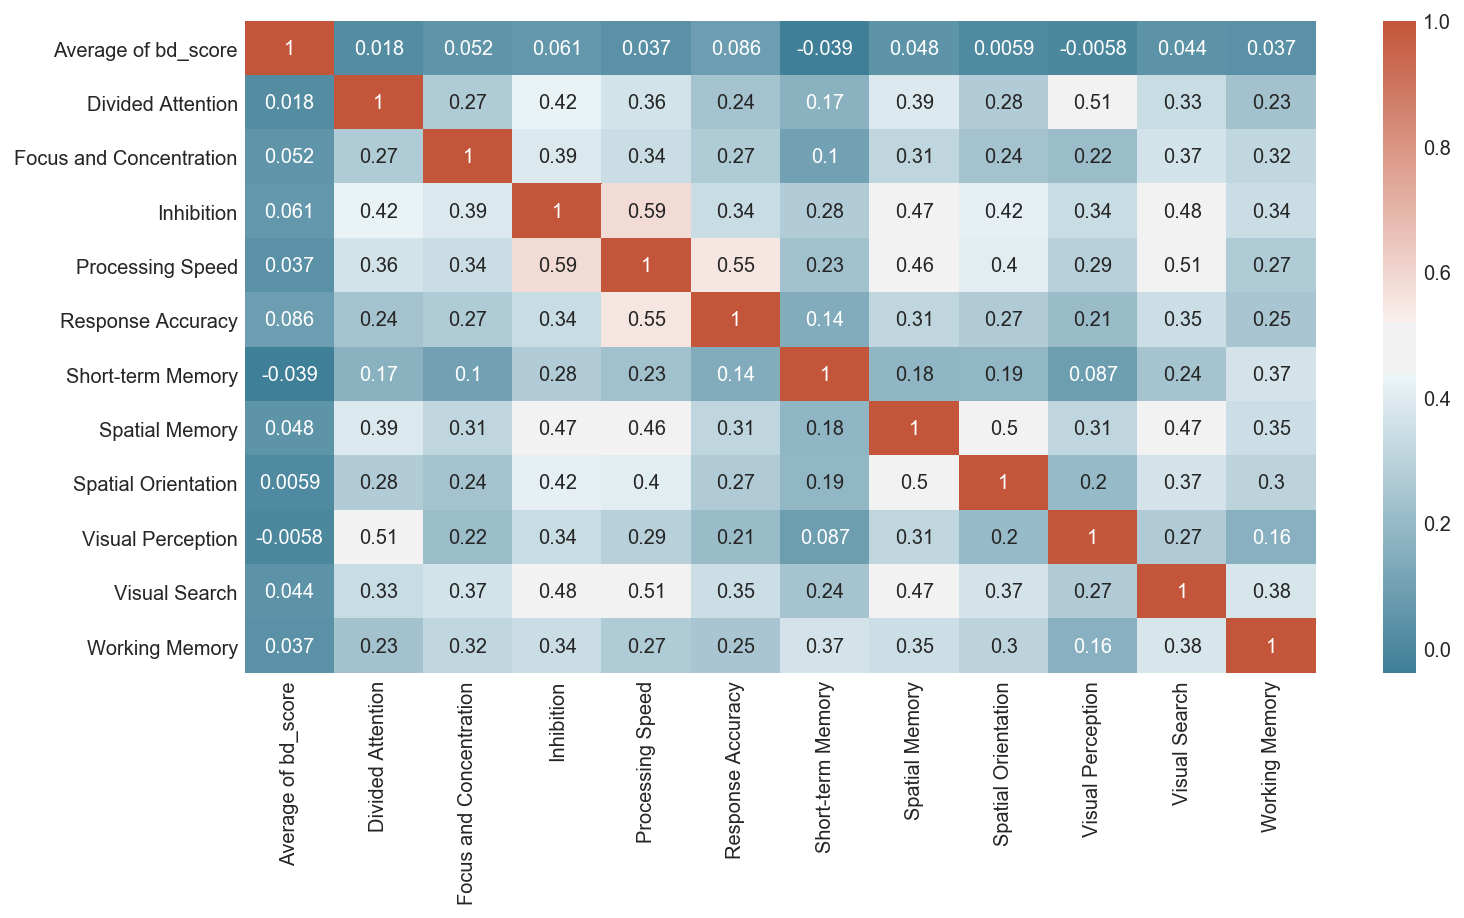

In [147]:
# Is there a correlation between Better Driver score and Cognitive Scores?
cognitive_matrix = Driving[['Average of bd_score','Divided Attention','Focus and Concentration',
                                'Inhibition','Processing Speed','Response Accuracy','Short-term Memory',
                                'Spatial Memory','Spatial Orientation','Visual Perception','Visual Search',
                                'Working Memory']]
(fig, ax) = plt.subplots(figsize=(12,6))
cmap = sns.diverging_palette(225, 20, sep=20, as_cmap=True)
sns.heatmap(cognitive_matrix.corr('spearman'), cmap=cmap, annot=True, ax=ax)
None

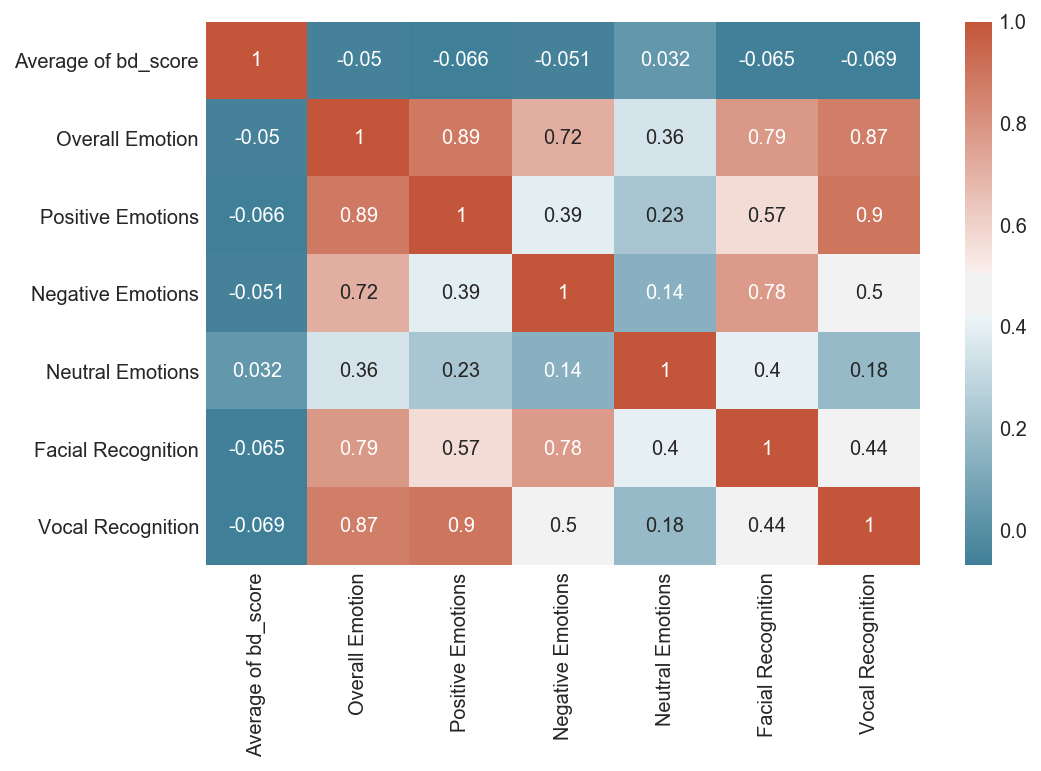

In [148]:
# Is there any correlation between average better driver score and empathic accuracy
emotional_matrix = Driving[['Average of bd_score','Overall Emotion','Positive Emotions','Negative Emotions',
                           'Neutral Emotions','Facial Recognition', 'Vocal Recognition']]
(fig, ax) = plt.subplots(figsize=(8,5))
sns.heatmap(emotional_matrix.corr('spearman'), cmap=cmap, annot=True, ax=ax)
None

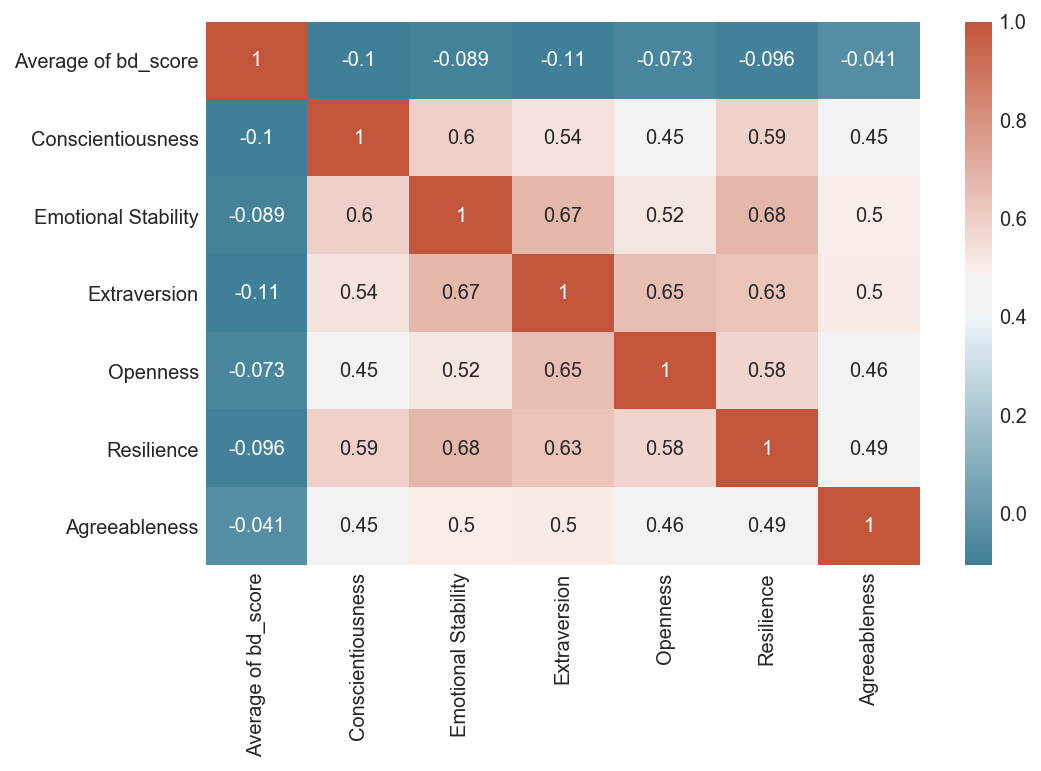

In [149]:
# Finally let's look at the relationship between Better Driver Score and Personality Traits
personality_matrix = Driving[['Average of bd_score','Conscientiousness','Emotional Stability',
                              'Extraversion','Openness', 'Resilience', 'Agreeableness']]
(fig, ax) = plt.subplots(figsize=(8,5))
sns.heatmap(personality_matrix.corr('spearman'), cmap=cmap, annot=True, ax=ax)
plt.show()

### Total Risk Events versus Cognitive + Emotional + Personality
---
### Cognitive Skills

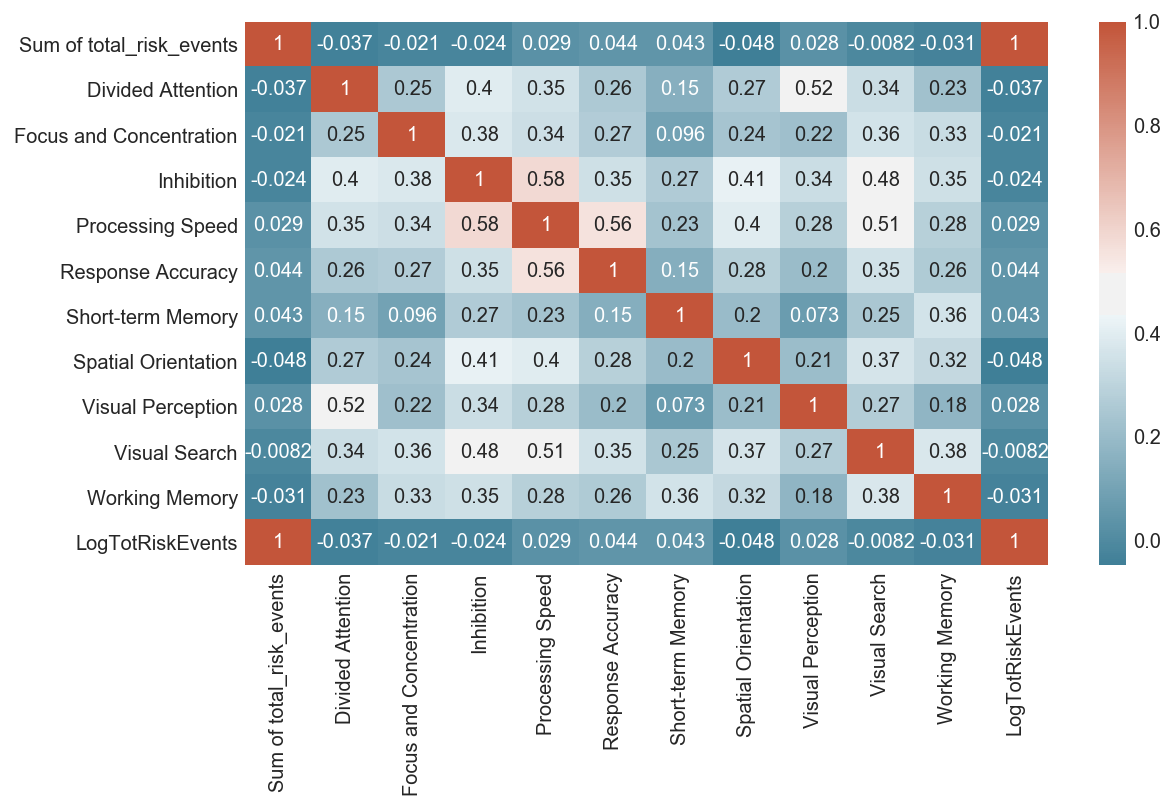

In [150]:
#Driving2.drop(['Sum of total_risk_events'], axis=1, inplace=True)
(fig, ax) = plt.subplots(figsize=(9,5))
sns.heatmap(Driving2.corr('spearman'), cmap=cmap, annot=True, ax=ax)
None

### Empathic Accuracy

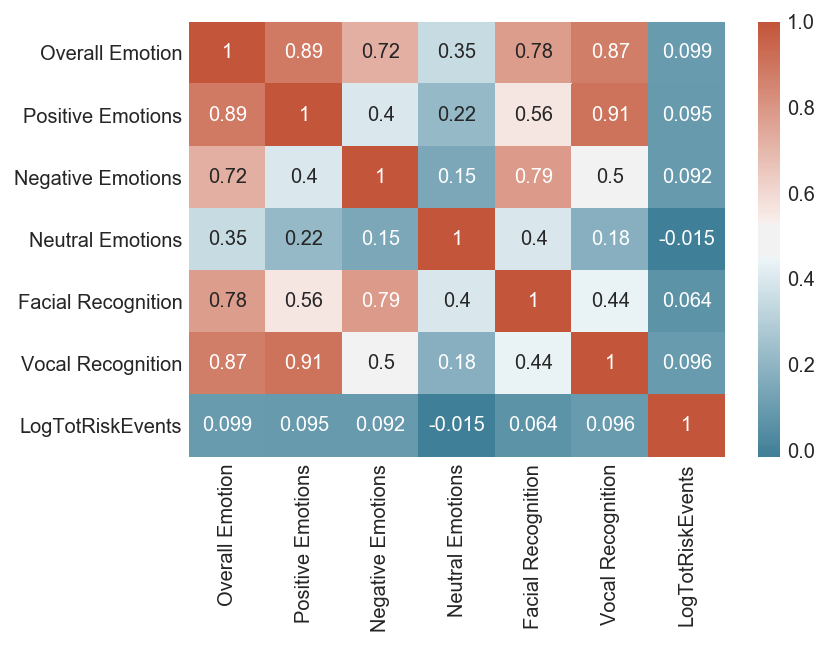

In [151]:
Driving3 = Driving[['Sum of total_risk_events','Overall Emotion','Positive Emotions','Negative Emotions',
                           'Neutral Emotions','Facial Recognition', 'Vocal Recognition']].dropna(axis=0)
# Drop rows where total risk events = 0
Driving3 = Driving3[Driving3['Sum of total_risk_events'] != 0]
Driving3['LogTotRiskEvents'] = np.log(Driving3['Sum of total_risk_events'])
Driving3.drop(['Sum of total_risk_events'], axis=1, inplace=True)
(fig, ax) = plt.subplots(figsize=(6,4))
sns.heatmap(Driving3.corr('spearman'), cmap=cmap, annot=True, ax=ax)
plt.show()

### Personality Types

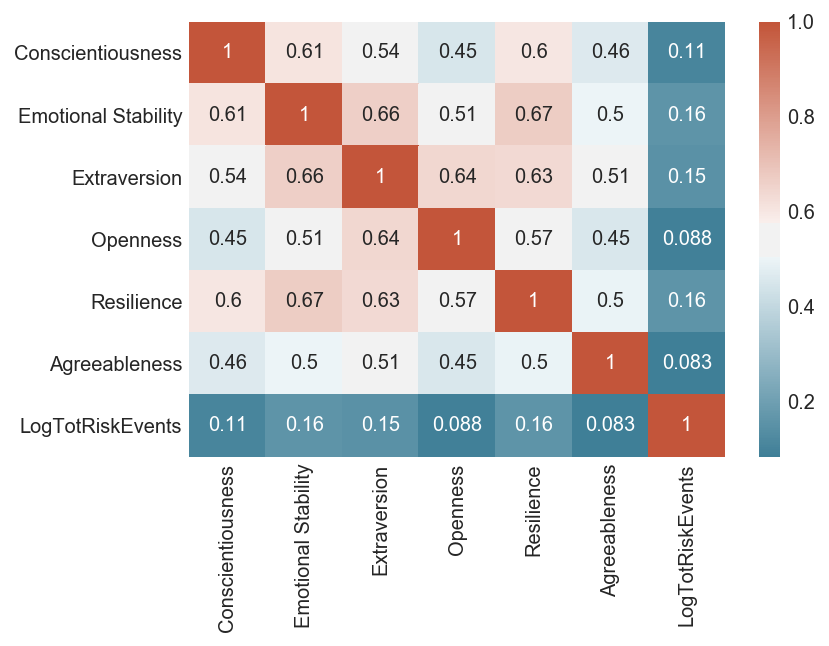

In [152]:
Driving4 = Driving[['Sum of total_risk_events','Conscientiousness','Emotional Stability',
                              'Extraversion','Openness', 'Resilience', 'Agreeableness']].dropna(axis=0)
# Drop rows where total risk events = 0
Driving4 = Driving4[Driving4['Sum of total_risk_events'] != 0]
Driving4['LogTotRiskEvents'] = np.log(Driving4['Sum of total_risk_events'])
Driving4.drop(['Sum of total_risk_events'], axis=1, inplace=True)
(fig, ax) = plt.subplots(figsize=(6,4))
sns.heatmap(Driving4.corr('spearman'), cmap=cmap, annot=True, ax=ax)
plt.show()

## K-Means Clustering on Response Accuracy, Processing Speed and Speeding Events
---

In [153]:
cluster_df2 = speeding_matrix[['Response Accuracy','Processing Speed','Sum of speed_events_total']].fillna(0)
cluster_df2['Sum of speed_events_total'] = cluster_df2['Sum of speed_events_total'].rank(pct=True)*100
cluster_df2.tail()

Response Accuracy  Processing Speed  Sum of speed_events_total
388                 18                10                  64.456233
390                 32                14                   6.366048
391                 25                 5                  28.116711
392                 35                70                  27.320955
393                 52                10                   9.283820

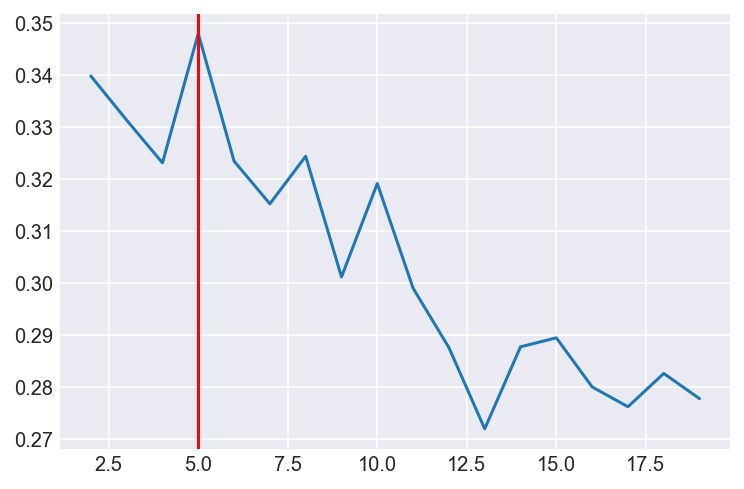

In [154]:
# Use the Silhouette score to determine the optimal number of clusters
scores = []
for i in range(2,20,1):
    km = KMeans(n_clusters=i)
    clusters = km.fit_predict(cluster_df2)
    score = silhouette_score(cluster_df2, clusters)
    scores.append(score)

plt.plot(range(2,20), scores)
plt.axvline(x=5, c='red')
None

In [155]:
# 5 Clusters
n = 5
km5 = KMeans(n_clusters=n)
km_five_clusters = km5.fit_predict(cluster_df2)

In [156]:
kmclusters5 = km5.fit_predict(cluster_df2)
kmclusters5

array([2, 3, 4, 3, 4, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2,
       1, 3, 3, 1, 1, 1, 0, 3, 3, 1, 1, 3, 1, 1, 3, 4, 1, 1, 1, 3, 3, 1, 3,
       4, 3, 0, 1, 4, 3, 3, 2, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 4, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 2, 1, 1, 0, 1, 2,
       4, 3, 3, 4, 4, 1, 1, 3, 4, 3, 0, 4, 0, 3, 1, 1, 1, 1, 1, 4, 2, 4, 1,
       1, 4, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 0, 2, 0, 0, 0, 4, 1, 1,
       3, 4, 4, 3, 4, 4, 2, 1, 2, 4, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 4, 1, 2,
       3, 1, 1, 3, 2, 3, 2, 4, 1, 4, 1, 4, 4, 3, 1, 4, 2, 1, 1, 3, 2, 4, 2,
       3, 4, 3, 3, 1, 3, 1, 2, 0, 2, 3, 2, 1, 2, 1, 3, 1, 2, 2, 3, 4, 0, 3,
       0, 2, 3, 0, 2, 0, 3, 0, 3, 0, 0, 0, 3, 1, 3, 4, 0, 2, 2, 1, 4, 2, 4,
       3, 2, 3, 2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 4, 2, 2, 2,
       0, 0, 0, 2, 0, 4, 0, 2, 4, 4, 0, 0, 0, 0, 1, 2, 2, 4, 0, 0, 3, 2, 0,
       4, 3, 2, 4, 4, 2, 0, 2, 0, 1, 4, 4, 2, 0, 1, 1, 0, 0, 2, 2, 0, 3, 2,
       2, 0,

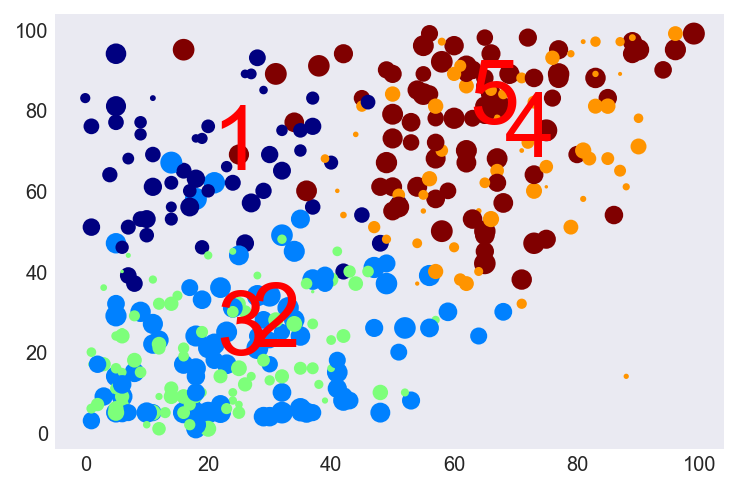

In [157]:
sns.set_style('dark')
# 5 Clusters
n = 5
km5 = KMeans(n_clusters=n)
km_five_clusters = km5.fit_predict(cluster_df2)

fig, ax = plt.subplots()
ax.scatter(cluster_df2['Response Accuracy'], cluster_df2['Processing Speed'], cluster_df2['Sum of speed_events_total'],
           c=km_five_clusters, cmap=plt.cm.jet)
#ax.set_xlabel('Response Accuracy')
#ax.set_ylabel('Sum of Speeding Events Percentile Ranked')

#ax.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1], c='black', s=400)

for i in range(n):
    x = km5.cluster_centers_[i,0]
    y = km5.cluster_centers_[i,1]
    ax.annotate(i+1, ((x,y)), fontsize=45, color='red')

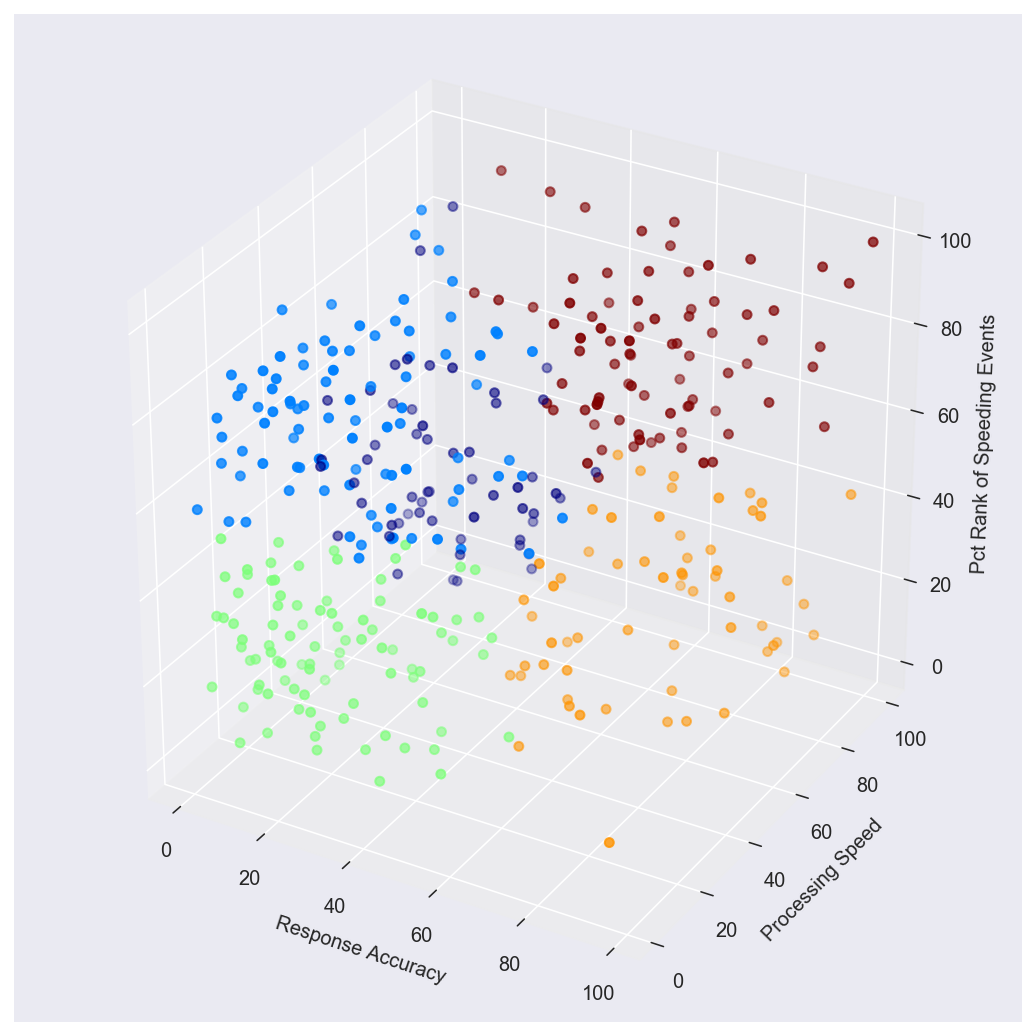

In [158]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_df2['Response Accuracy'], cluster_df2['Processing Speed'], cluster_df2['Sum of speed_events_total'],
           c=km_five_clusters, cmap=plt.cm.jet)

ax.set_xlabel('Response Accuracy')
ax.set_ylabel('Processing Speed')
ax.set_zlabel('Pct Rank of Speeding Events')

#ax.azim = 200
#ax.elev = -45

None

In [159]:
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=cluster_df2['Response Accuracy'],
    y=cluster_df2['Processing Speed'],
    z=cluster_df2['Sum of speed_events_total'],
    #z=cluster_df2['Bad'],
    mode='markers',
    marker=dict(
        size=6,
        color=km_five_clusters, # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.7
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [160]:
bad_drivers_matrix2 = bad_driver_df.copy()
# Filter down to rows of interest
bad_drivers_matrix2 = bad_drivers_matrix2.loc[:,'username':'Average of bd_score']
bad_drivers_matrix2.drop(['index','Cognisess ID','From Merc Upload Splend ID',
                        'From Merc Upload Danlaw ID','Claims Exist (Claims Data tab)'],axis=1,inplace=True)
# Drop NaNs
bad_drivers_matrix2.dropna(inplace=True)
# Add Driver Cluster Numbers
bad_drivers_matrix2['cluster'] = km_five_clusters+1
bad_drivers_matrix2.drop('Average of bd_score', axis=1, inplace=True)
bad_drivers_matrix2.head()

username  bad_driver         Unique Code Vehicle Rego  Divided Attention  \
0  splend101           0  dan354235056684594       911WDX                  1   
1  splend102           0  dan354235056681665       DBL66Y                 37   
2  splend103           0  dan354235056685757       1GX1TA                  4   
3  splend104           0  dan354235056685708       DBD90H                 65   
4  splend105           0  dan354235056672268       DBD90J                 55   

   Focus and Concentration  Inhibition  Processing Speed  Response Accuracy  \
0                       53          50                 9                 14   
1                       45          88                95                 90   
2                       78          44                69                 30   
3                       74          92                94                 42   
4                       18           3                62                 14   

   Short-term Memory  Spatial Memory  Spatial Orientation  Visual Perception  \
0                 70              55                   85                  2   
1                 74              74                   67                 67   
2                 80              33                   92                 11   
3                 78              62                   67                 87   
4                 44               1                    1                  1   

   Visual Search  Working Memory  Overall Emotion  Positive Emotions  \
0             67              59               32                 27   
1             31              78               70                 81   
2             33              99               61                 54   
3             40              22               56                 72   
4             33              16               38                 36   

   Negative Emotions  Neutral Emotions  Facial Recognition  Vocal Recognition  \
0                 25               100                  40               20.0   
1                 50               100                  70               70.0   
2                 62               100                  90               30.0   
3                 25               100                  50               60.0   
4                 50                 0                  60               20.0   

   Agreeableness  Conscientiousness  Emotional Stability  Extraversion  \
0              5                  4                    5             6   
1              5                  5                    7             6   
2              5                  6                    7             8   
3              6                  5                    3             5   
4              4                  7                    5             4   

   Openness  Resilience  cluster  
0         4           2        3  
1         5           5        5  
2         9           8        1  
3         5           4        5  
4         4           3        1

In [161]:
# Set up feature matrix and dependent variable
X2 = bad_drivers_matrix2.iloc[:,4:]
y2 = bad_drivers_matrix2['bad_driver']

# Setup a train-test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=123)

# Create a container for our Logistic Regression Model
lr = LogisticRegression()

# Fit the model to our train and test data and come up with some predictions
incident_pred = lr.fit(X_train, y_train).predict(X_test)
roc_auc_score(y_test, incident_pred)

0.49390243902439024

## Logistic Classification with Response Accuracy and Processing Speed Cluster as a feature

In [162]:
# Hypertuning Parameters with 5 fold CV
lr_gridsearch = GridSearchCV(LogisticRegression(), 
                             param_grid={'penalty' : ['l1','l2'],
                                        'C' : [0.1, 0.2, 0.25, 0.5, 1, 10]},
                            cv=5, n_jobs=-1, verbose=1, scoring=dollar_scorer)
lr_gridsearch.fit(X2, y2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.2, 0.25, 0.5, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=1)

In [163]:
lr_gridsearch.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [164]:
# 5 fold cross validation
kfold = KFold(n_splits = 5, random_state=123)
model = LogisticRegression(C=0.2, penalty='l2')
results2 = cross_val_score(model, X2, y2, cv=kfold, scoring=dollar_scorer)
print results2.mean()
# Out of 377 drivers we end up losing $22,460

-22465.0


## SVC with Response Accuracy and Processing Speed Cluster as a feature

In [165]:
from sklearn.svm import SVC

# Set up feature matrix and dependent variable
X2 = bad_drivers_matrix2.iloc[:,4:]
y2 = bad_drivers_matrix2['bad_driver']

Cs = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1, 1]
params = {'C': Cs, 'gamma' : gammas, 'kernel':('linear', 'rbf')}
# Not sure why this line isn't working here...
#kfold = KFold(n_splits=5, random_state=123)

grid_search_svc = GridSearchCV(SVC(), param_grid=params, cv=5, scoring=dollar_scorer, verbose=1, n_jobs=-1)
grid_search_svc.fit(X2, y2)
grid_search_svc.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.8s finished


{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}

In [166]:
# 5 fold cross validation
kfold = KFold(n_splits = 5, random_state=123)
model = SVC(C=0.001, gamma = 0.001, kernel='linear')
svc_results3 = cross_val_score(model, X2, y2, cv=kfold, scoring=dollar_scorer)
print svc_results3.mean()
# Out of 377 drivers we end up losing $22,460

-22440.0


## Decision Tree with Response Accuracy and Processing Speed Cluster as a feature

In [167]:
from sklearn.tree import DecisionTreeClassifier
# Hypertuning Parameters with 5 fold CV
X2 = bad_drivers_matrix2.iloc[:,4:]
y2 = bad_drivers_matrix2['bad_driver']
grid_tree = GridSearchCV(DecisionTreeClassifier(),
                    param_grid = {'max_depth': [1,2,3,4,5], 
                                  'criterion': ['gini', 'entropy'],
                                 # Lets go for 1, 2, 3 min samples left
                                 'min_samples_leaf': [1,2,3],
                                  # Dont bother splitting unless you have < x elements
                                  'min_samples_split': [2,3,4,5,6]}, cv=5, scoring=dollar_scorer)
grid_tree.fit(X2, y2)
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [168]:
# 5 Fold Cross Validation with best parameters
kfold = KFold(n_splits=5, random_state=123)
dt = DecisionTreeClassifier(criterion='gini',max_depth=4, min_samples_leaf=1, min_samples_split=6)
dt_results = cross_val_score(dt, X2, y2, cv=kfold, scoring=dollar_scorer)
print dt_results.mean()

-20330.0


## Random Forest with Response Accuracy and Processing Speed Cluster as a feature

In [169]:
X2 = bad_drivers_matrix2.iloc[:,4:]
y2 = bad_drivers_matrix2['bad_driver']

# Hypertuning parameters with 5 fold CV
forest_grid = GridSearchCV(RandomForestClassifier(), 
                      param_grid = {'max_depth': [1,2,3,4,5,6], 
                        'criterion': ['gini', 'entropy'],
                      'min_samples_leaf': [1,2,3,4,5,6],
                      'min_samples_split': [2,3,4,5,6]},cv=5,scoring=dollar_scorer)
forest_grid.fit(X2, y2)
forest_grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [170]:
# 5 Fold Cross Validation with best parameters
kfold = KFold(n_splits=5, random_state=123)
dt = RandomForestClassifier(criterion='gini',max_depth=6, min_samples_leaf=2, min_samples_split=4)
dt_results = cross_val_score(dt, X2, y2, cv=kfold, scoring=dollar_scorer)
print dt_results.mean()

-22005.0


## Gradient Boost with Response Accuracy and Processing Speed Cluster as a feature

In [171]:
X2 = bad_drivers_matrix2.iloc[:,4:]
y2 = bad_drivers_matrix2['bad_driver']

gb = GridSearchCV(GradientBoostingClassifier(),
                    param_grid = {'max_depth': [1,2,3,4,5,6], 
                                    'min_samples_leaf': [1,2,3],
                                  'min_samples_split': [2,3,4,5,6]},
                                cv=5, scoring=dollar_scorer)
gb.fit(X2, y2)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=0)

In [172]:
gb.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [173]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
cart = GradientBoostingClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=4)
gb_results3 = cross_val_score(gb, X2, y2, cv=kfold, scoring=dollar_scorer)
print gb_results3.mean()

-19845.0


## XGB with Response Accuracy and Processing Speed Cluster as a feature

In [174]:
X2 = bad_drivers_matrix2.iloc[:,4:]
y2 = bad_drivers_matrix2['bad_driver']

param = {
 'n_estimators':[50,100,150,200,300,400],
 'max_depth':[2,3,4,5,6,7,8,9],
 'min_child_weight':[2,3,4,5],
 'colsample_bytree':[0.2,0.6,0.8]
}

xgb_grid = GridSearchCV(XGBClassifier(), 
                        param_grid = param, 
                        scoring=dollar_scorer, 
                        cv=5, verbose = 1, 
                        n_jobs=-1)
xgb_grid.fit(X2, y2)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200, 300, 400], 'colsample_bytree': [0.2, 0.6, 0.8], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_child_weight': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(dollar_score, greater_is_better=False),
       verbose=1)

In [175]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 300}

In [176]:
# 5 Fold Cross Validation
kfold = KFold(n_splits=5, random_state=123)
xgb2 = XGBClassifier(colsample_bytree=0.8, max_depth=9, min_child_weight=2, n_estimators=400)
xgb_results2 = cross_val_score(xgb2, X2, y2, cv=kfold, scoring=dollar_scorer)
print xgb_results2.mean()

-21180.0


## KNN with Response Accuracy and Processing Speed Cluster as a feature

In [177]:
# Define dataset
X2 = bad_drivers_matrix2.iloc[:,4:]
y2 = bad_drivers_matrix2['bad_driver']

# Hyperparameter Tuning with 5 Fold CV
kfold = KFold(n_splits = 5, random_state=123)
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), 
                             param_grid={'n_neighbors': [2,3,4,5,6,7,8,9], 
                                         'metric': ['minkowski', 'euclidean', 'manhattan'], 
                                         'weights': ['uniform', 'distance']},
                            cv=5, n_jobs=-1, verbose=1, scoring=dollar_scorer)
# Fit Model
knn_gridsearch.fit(X2, y2)
knn_gridsearch.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.4s finished


{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

In [178]:
# 5 fold cross validation
kfold = KFold(n_splits = 5, random_state=123)
model = KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
results = cross_val_score(model, X2, y2, cv=kfold, scoring=dollar_scorer)
print results.mean()

-18235.0


## Neural Network with Response Accuracy and Processing Speed Cluster as a feature

In [179]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

# Define dataset
X2 = bad_drivers_matrix2.iloc[:,4:]
y2 = bad_drivers_matrix2['bad_driver']

# Create a neural network function to pass it on to the Keras Classifier
def build_neural_network(hidden_units=10):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=24, kernel_initializer='random_normal',activation='sigmoid'))
    model.add(Dense(1, input_dim=hidden_units, kernel_initializer='random_normal',activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=123)
model = KerasClassifier(build_fn=build_neural_network, epochs=300, verbose=0)

# 5 Fold Cross Validation
results = cross_val_score(estimator=model,X=np.array(X_train),y=np.array(y_train), cv=5, scoring=dollar_scorer)
print results.mean()

-16720.0


In [180]:
models = []
models.append(( 'Dummy 3' , DummyClassifier(strategy='most_frequent', random_state=123)))
models.append(( 'LR 3' , LogisticRegression(C=0.2, penalty='l2')))
models.append(( 'SVC 3' , SVC(C=0.001, gamma = 0.001, kernel='linear')))
models.append(( 'KNN 3' , KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')))
models.append(( 'Tree 3' , DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=2, min_samples_split=2)))
models.append(( 'Forest 3' , RandomForestClassifier(criterion='gini',max_depth=6, min_samples_leaf=2, min_samples_split=4)))
models.append(( 'GB 3' , GradientBoostingClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=4)))
models.append(( 'XGB 3' , XGBClassifier(colsample_bytree=0.8, max_depth=9, min_child_weight=2, n_estimators=400)))
# Evaluate each model in turn
results = []
names = []
scoring = dollar_scorer

In [181]:
for name, model in models:
    kfold = KFold(n_splits=5, random_state=123)
    cv_results = cross_val_score(model, X2, y2, cv=kfold, scoring=scoring)
    results.append(cv_results.mean())
    names.append(name)
    msg = [name, cv_results.mean()]
    print msg

['Dummy 3', -22440.0]
['LR 3', -22465.0]
['SVC 3', -22440.0]
['KNN 3', -18235.0]
['Tree 3', -19920.0]
['Forest 3', -22440.0]
['GB 3', -20710.0]
['XGB 3', -21180.0]


In [182]:
df3 = pd.DataFrame({'Model':names, 'Score':results})
df3 = df3.tail(8)
df3 = df3.sort_values('Score')
df3 = df3.append({'Model':'Neural Network 3', 'Score':-16720}, ignore_index=True).set_index('Model')
df3

Score
Model                    
LR 3             -22465.0
Dummy 3          -22440.0
SVC 3            -22440.0
Forest 3         -22440.0
XGB 3            -21180.0
GB 3             -20710.0
Tree 3           -19920.0
KNN 3            -18235.0
Neural Network 3 -16720.0

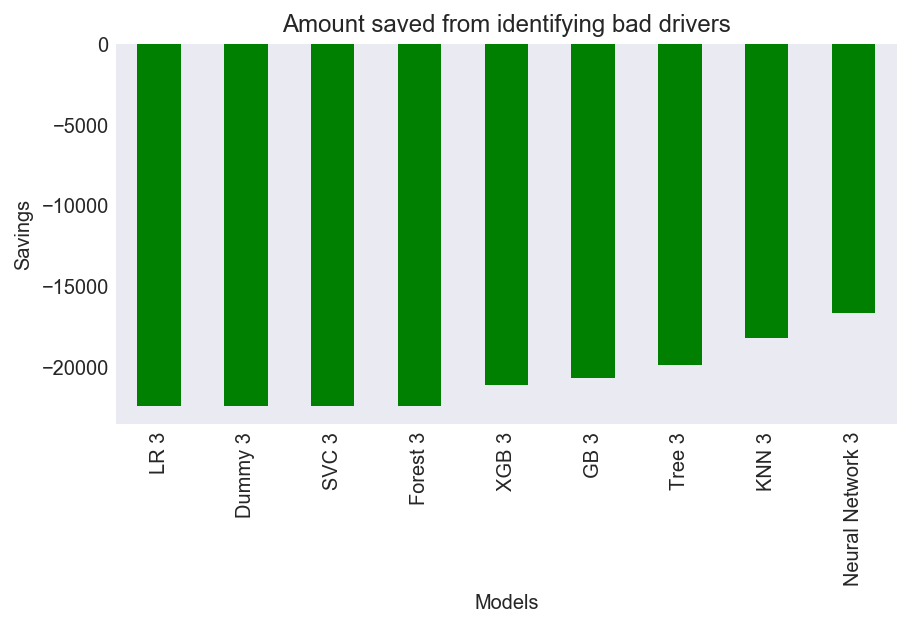

In [183]:
fig, ax = plt.subplots(figsize=(7,3.5))
ax = df3.plot(kind='bar',color='green',legend=False, ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Savings')
ax.set_title('Amount saved from identifying bad drivers')
None

## Not a substantial difference when clustering on two features.
---

# Principal Components Analysis

In [184]:
Drive_PCA = Driving.iloc[:,6:30].dropna()
Drive_PCA.head()

Divided Attention  Focus and Concentration  Inhibition  Processing Speed  \
0                  1                       53          50                 9   
1                 37                       45          88                95   
2                  4                       78          44                69   
3                 65                       74          92                94   
4                 55                       18           3                62   

   Response Accuracy  Short-term Memory  Spatial Memory  Spatial Orientation  \
0                 14                 70              55                   85   
1                 90                 74              74                   67   
2                 30                 80              33                   92   
3                 42                 78              62                   67   
4                 14                 44               1                    1   

   Visual Perception  Visual Search  Working Memory  Overall Emotion  \
0                  2             67              59               32   
1                 67             31              78               70   
2                 11             33              99               61   
3                 87             40              22               56   
4                  1             33              16               38   

   Positive Emotions  Negative Emotions  Neutral Emotions  Facial Recognition  \
0                 27                 25               100                  40   
1                 81                 50               100                  70   
2                 54                 62               100                  90   
3                 72                 25               100                  50   
4                 36                 50                 0                  60   

   Vocal Recognition  Agreeableness  Conscientiousness  Emotional Stability  \
0               20.0              5                  4                    5   
1               70.0              5                  5                    7   
2               30.0              5                  6                    7   
3               60.0              6                  5                    3   
4               20.0              4                  7                    5   

   Extraversion  Openness  Resilience  Average of bd_score  
0             6         4           2            51.489360  
1             6         5           5            60.274947  
2             8         9           8            61.748225  
3             5         5           4            63.901612  
4             4         4           3            51.711655

In [185]:
driveX = Drive_PCA.drop('Average of bd_score', axis=1)
driveY = Drive_PCA['Average of bd_score']

In [186]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca_matrix = pca.fit_transform(driveX)

In [187]:
pca_matrix

array([[-0.14838475,  0.1293061 , -1.7586347 , ..., -1.25985392,
        -2.14418485, -0.88129513],
       [ 1.7487215 , -0.02558618,  0.17245481, ..., -0.9999722 ,
        -1.04912251, -0.02681032],
       [ 0.7699845 , -0.59290589, -0.74519534, ..., -0.02799337,
         0.65293707,  0.50724369],
       ..., 
       [-0.54328788, -0.67137239, -0.09516051, ...,  0.65760149,
        -0.31504655, -0.39367911],
       [ 0.40754495,  0.79226102, -1.75645544, ..., -0.33717888,
         0.04052483,  1.15795928],
       [-0.95561636,  0.43273697, -1.98211718, ...,  0.06538293,
         1.19129354,  2.38763128]])

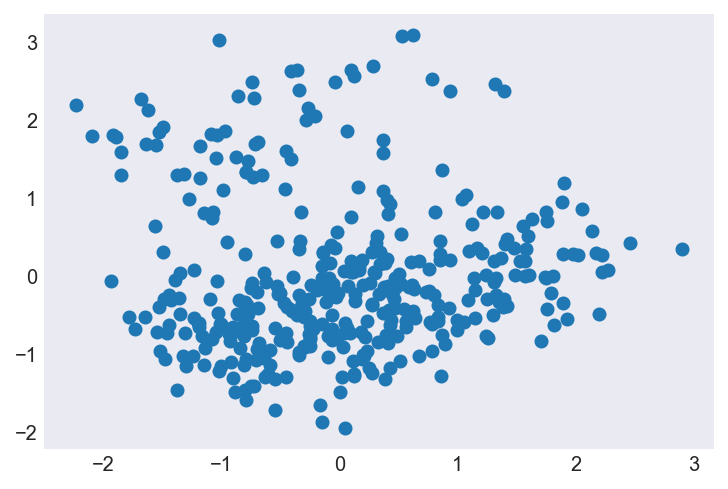

In [188]:
plt.scatter(pca_matrix[:,0], pca_matrix[:,1],)
plt.show()

In [189]:
pca.components_

array([[  2.02565568e-01,   2.39210550e-01,   3.34108379e-01,
          3.63976378e-01,   2.41121307e-01,   1.70626496e-01,
          2.96279021e-01,   2.67223942e-01,   2.12101446e-01,
          3.02302483e-01,   2.33259405e-01,   2.02043948e-01,
          2.33457531e-01,   1.40908606e-01,   1.63832431e-01,
          1.68924027e-01,   2.22937801e-01,   3.38347243e-03,
          1.71992755e-03,   6.28253542e-03,   4.89377506e-03,
          5.37452776e-03,   6.92601133e-03],
       [  1.34747969e-01,   6.42837382e-02,   6.43564835e-02,
          1.41414881e-01,   9.71778997e-02,   2.35999532e-02,
          1.94642079e-01,   1.11958907e-01,   1.83535215e-01,
          1.47463492e-01,   9.20875308e-02,  -2.56167232e-01,
         -1.92823965e-01,  -1.93882328e-01,  -7.59850695e-01,
         -2.84205483e-01,  -1.74971896e-01,  -7.86234004e-03,
         -1.37824739e-03,  -3.65443198e-03,  -1.46849970e-03,
         -1.42799553e-03,  -1.92280661e-03],
       [ -1.16544271e-01,   1.44021819e-03

In [190]:
pca.components_.shape

(23, 23)

In [191]:
np.min(pca_matrix[:,0])

-2.2366734194560536

In [192]:
np.max(pca_matrix[:,0])

2.9045460070555267

In [193]:
# Take the first 3 components
pref_pca = PCA(n_components=5)
pref_pca.fit(driveX)
pref_pca.components_

array([[  2.02565568e-01,   2.39210550e-01,   3.34108379e-01,
          3.63976378e-01,   2.41121307e-01,   1.70626496e-01,
          2.96279021e-01,   2.67223942e-01,   2.12101446e-01,
          3.02302483e-01,   2.33259405e-01,   2.02043948e-01,
          2.33457531e-01,   1.40908606e-01,   1.63832431e-01,
          1.68924027e-01,   2.22937801e-01,   3.38347243e-03,
          1.71992755e-03,   6.28253542e-03,   4.89377506e-03,
          5.37452776e-03,   6.92601133e-03],
       [  1.34747969e-01,   6.42837382e-02,   6.43564835e-02,
          1.41414881e-01,   9.71778997e-02,   2.35999532e-02,
          1.94642079e-01,   1.11958907e-01,   1.83535215e-01,
          1.47463492e-01,   9.20875308e-02,  -2.56167232e-01,
         -1.92823965e-01,  -1.93882328e-01,  -7.59850695e-01,
         -2.84205483e-01,  -1.74971896e-01,  -7.86234004e-03,
         -1.37824739e-03,  -3.65443198e-03,  -1.46849970e-03,
         -1.42799553e-03,  -1.92280661e-03],
       [ -1.16544271e-01,   1.44021819e-03

In [194]:
# Transform into principal components space
like_pca = pref_pca.transform(driveX)

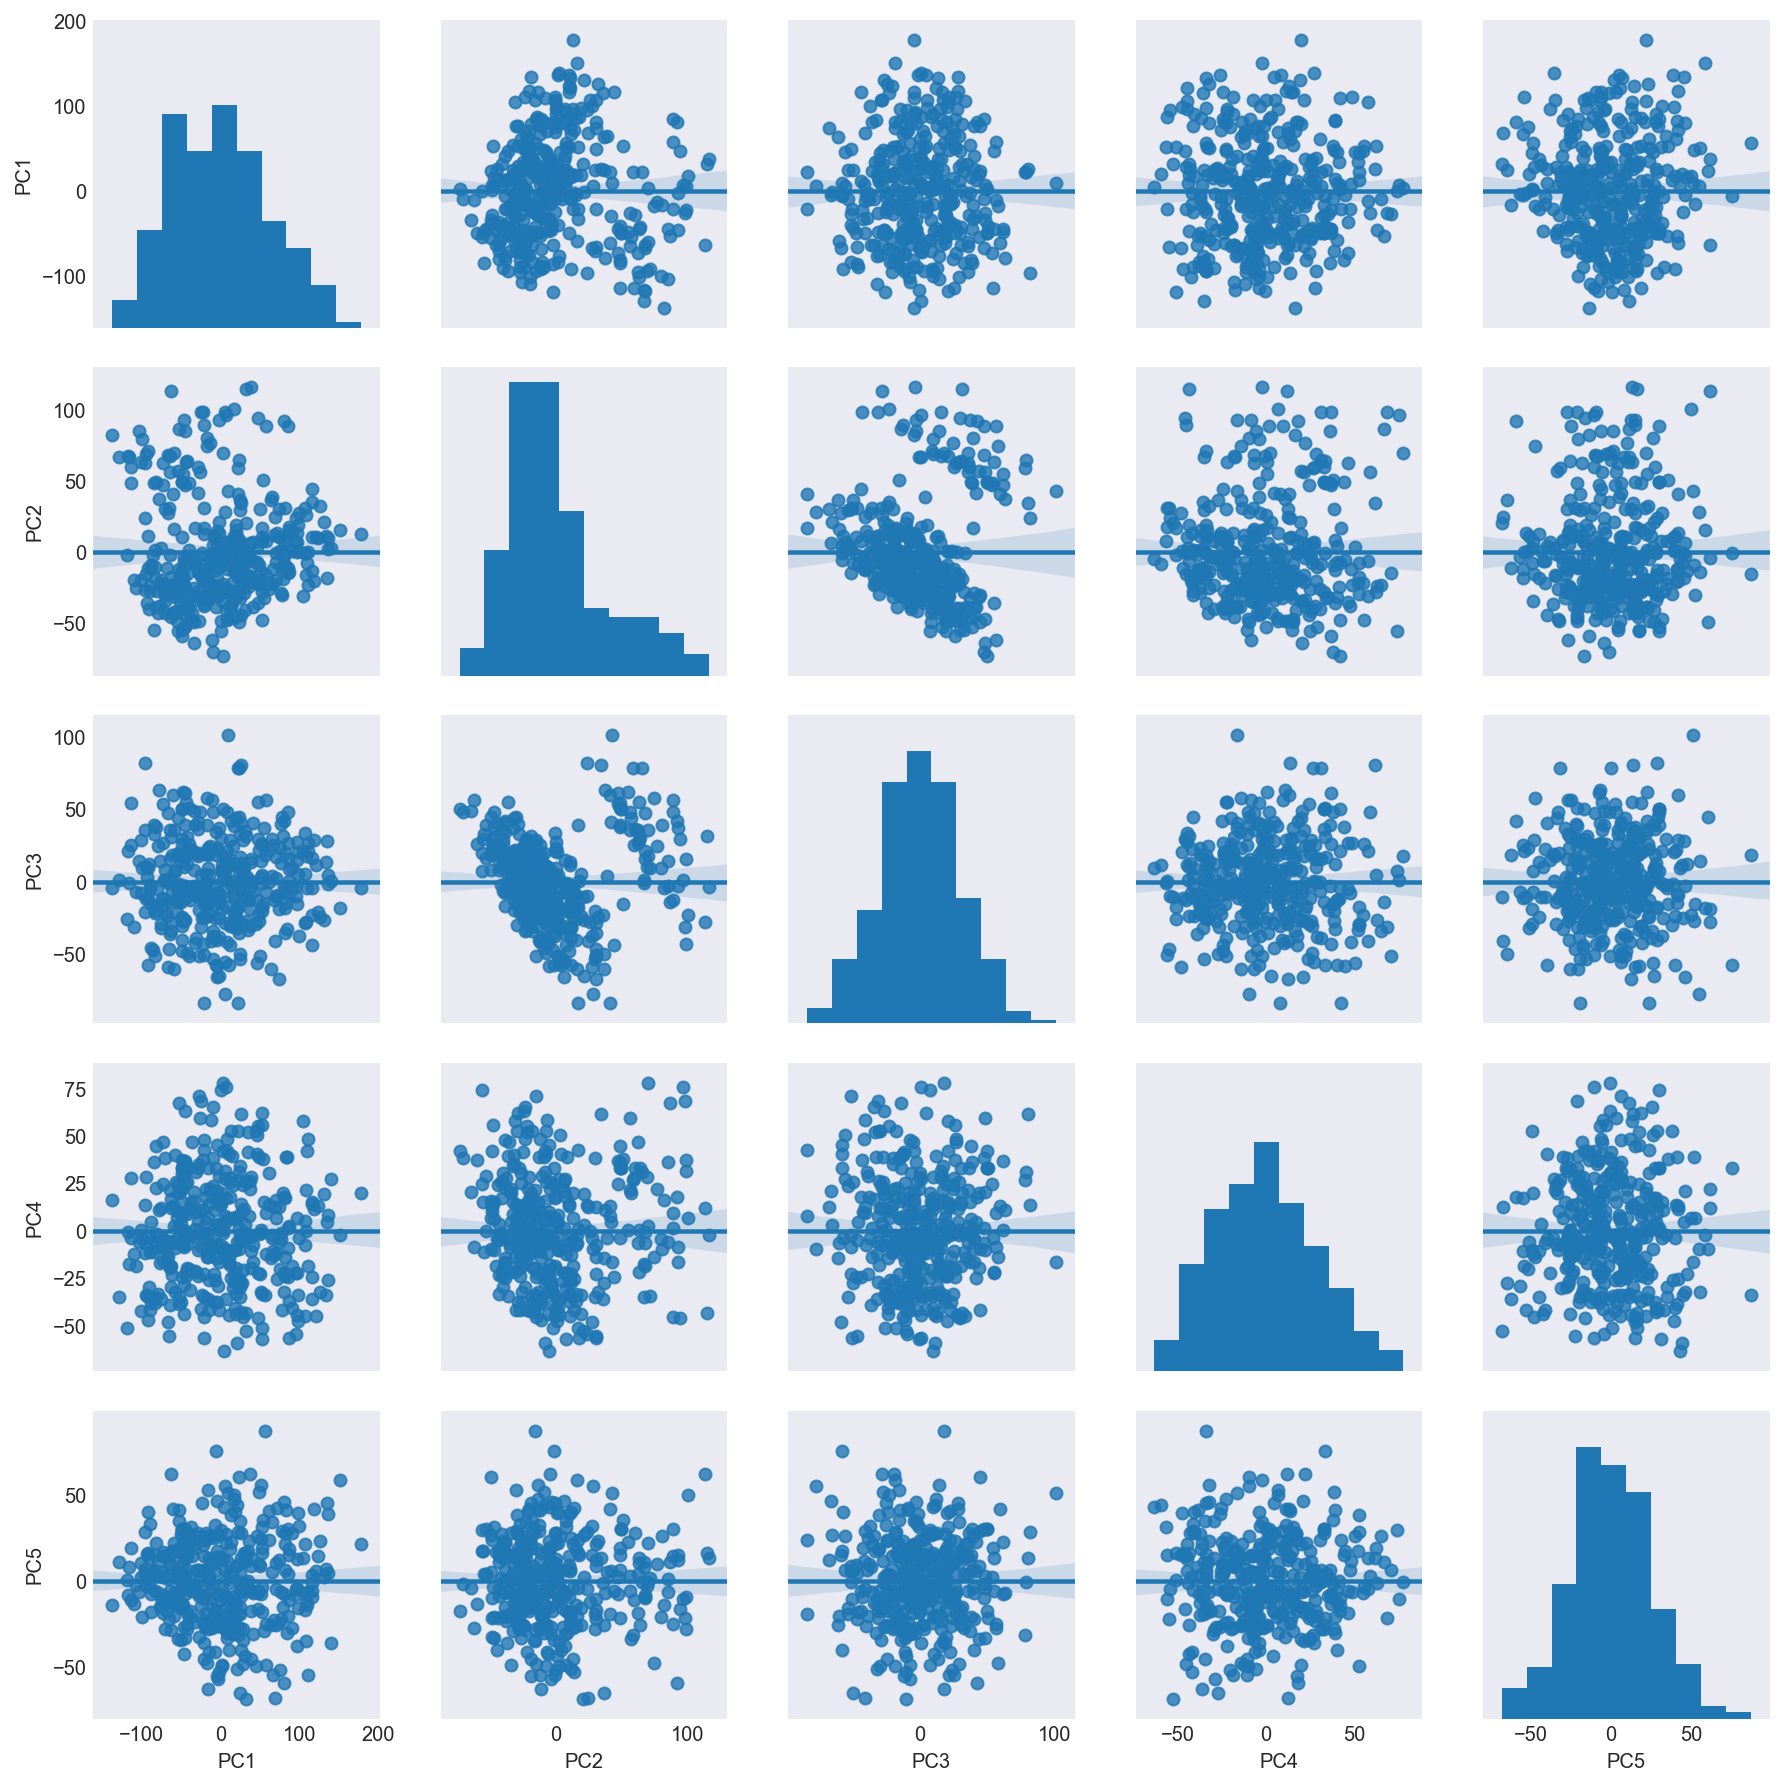

In [195]:
sns.pairplot(pd.DataFrame(like_pca, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg')
plt.show()

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# This is our target variable
target = driveY.values
X = like_pca
y = target
# use appropriate model here
ols = LinearRegression()
cross_val_score(ols, X, y, cv=5, n_jobs=-1, scoring='r2').mean()

-0.22382897131702273